In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd

%matplotlib inline

from pymc.Matplot import plot
import numpy as np
import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
import pydot

In [ ]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.Metropolis() # instantiate sampler
    trace = pm.sample(2000, step, njobs=2) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

In [4]:
trace

<MultiTrace: 1 chains, 2000 iterations, 2 variables>

## Hamiltonian

In [6]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.HamiltonianMC() # instantiate sampler
    trace = pm.sample(20000, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 20000 of 20000 complete in 50.3 sec

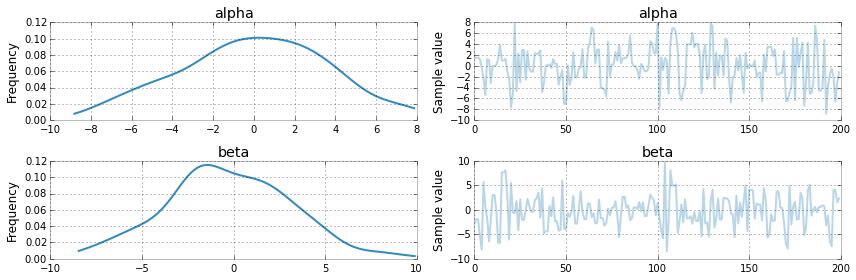

In [16]:
%matplotlib inline


pm.traceplot(trace);


###Points distribution

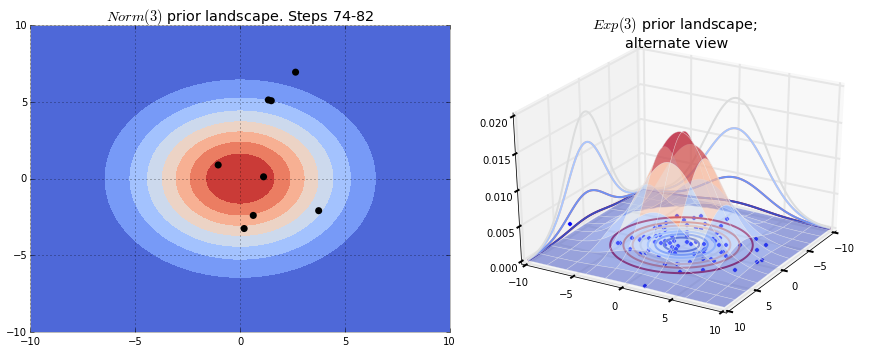

In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])

ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")

    
    
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax2.view_init(azim=390)
ax2.set_xlim([-10, 10])
ax2.set_ylim([-10, 10])
ax2.set_zlim([0, 0.02])

for i in range(80):
    ax2.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax2.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax2.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax2.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)

### Searching algorithm


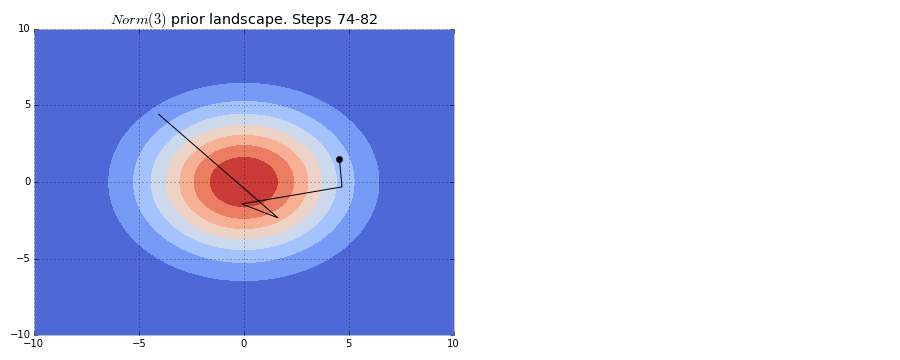
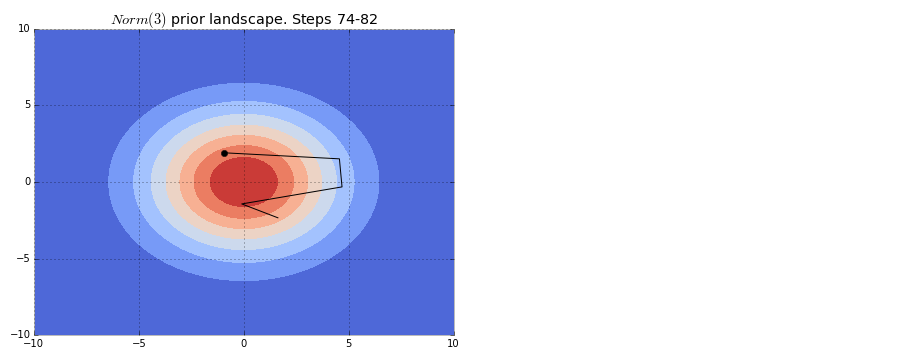
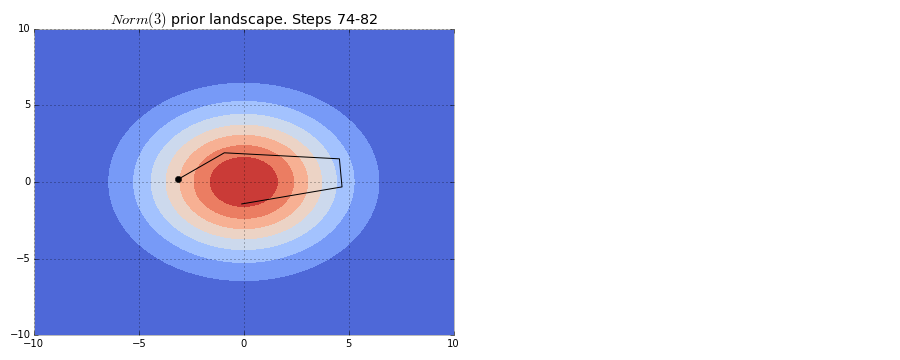
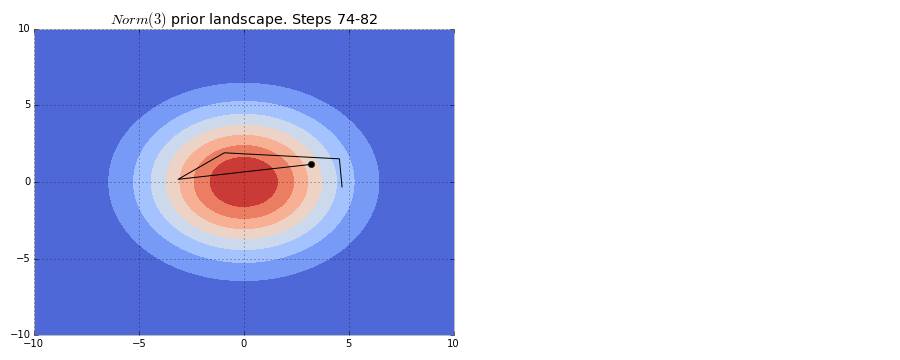
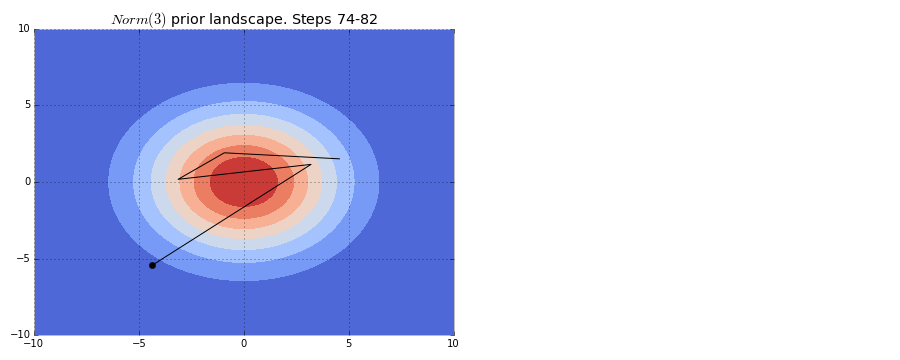
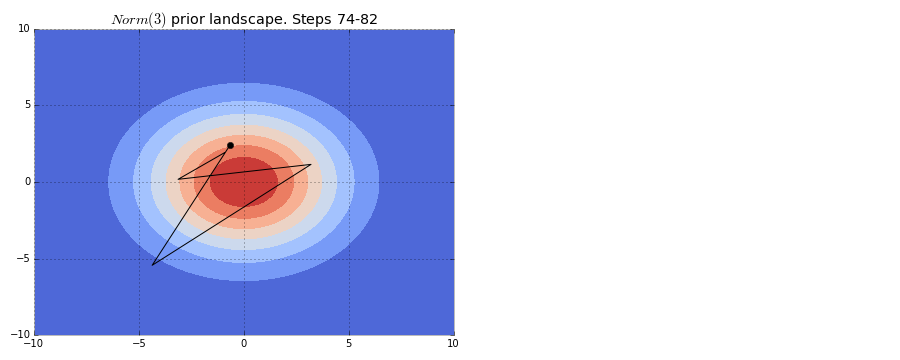
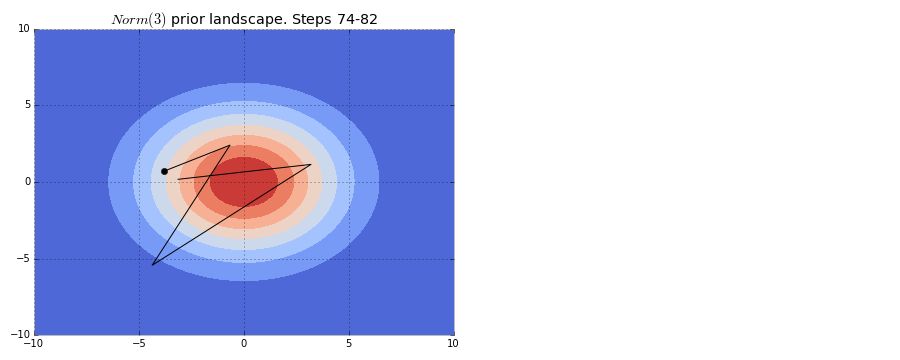
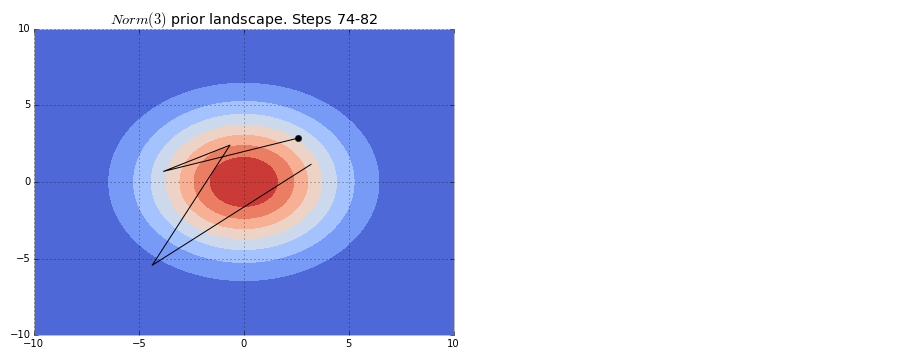
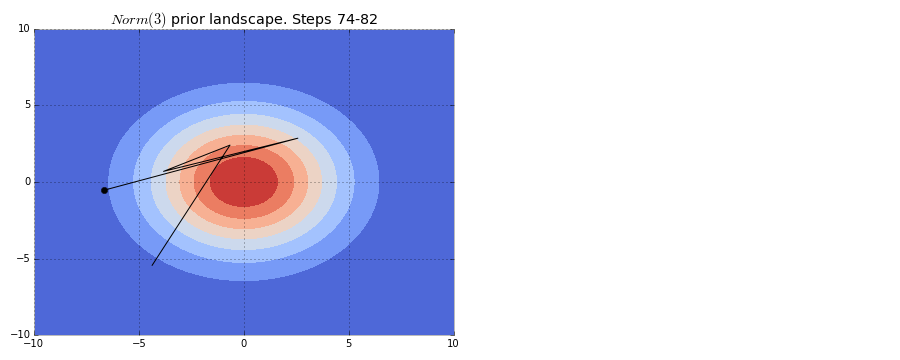
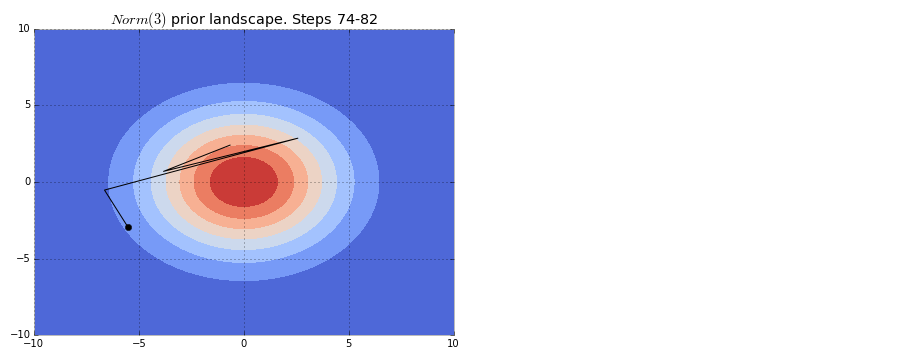
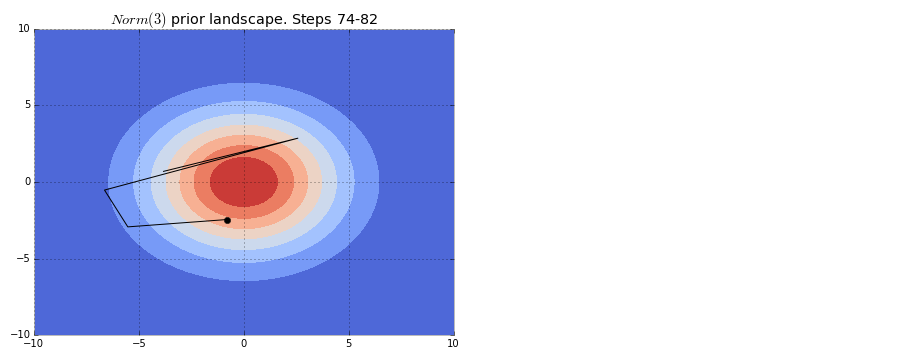
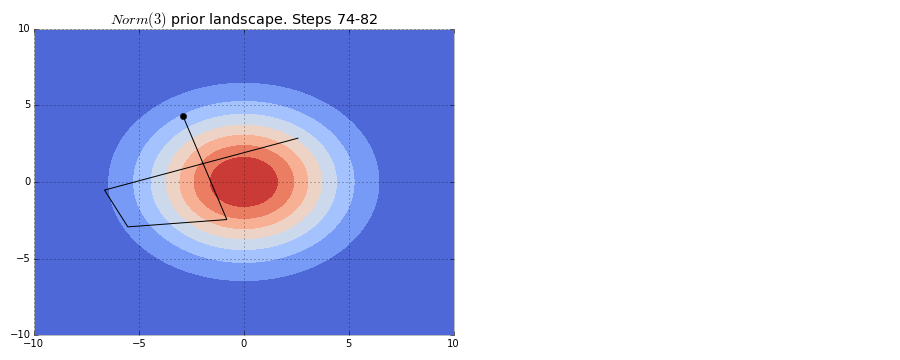
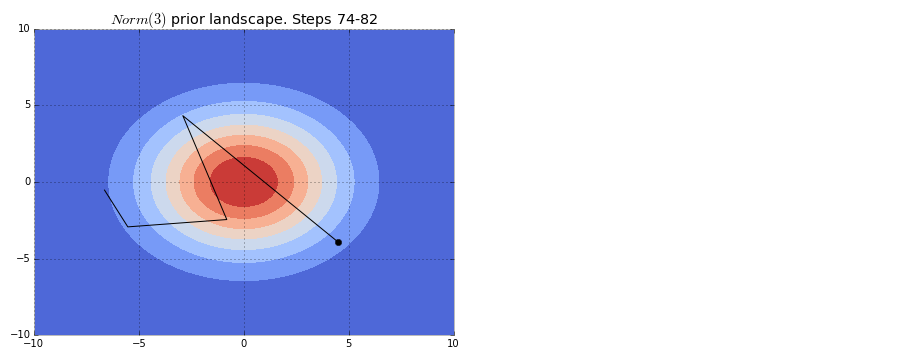
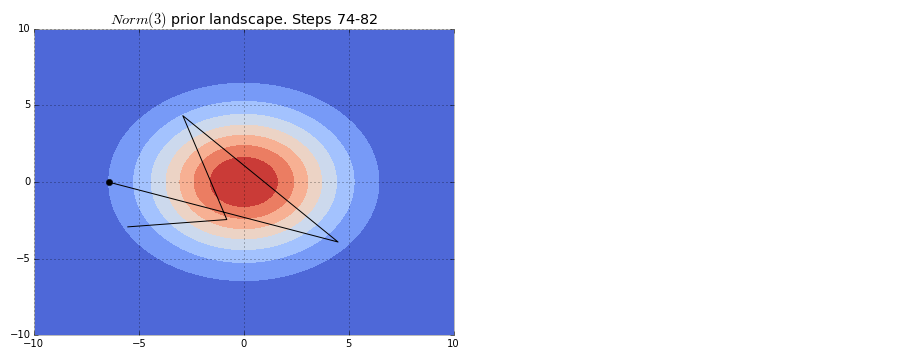
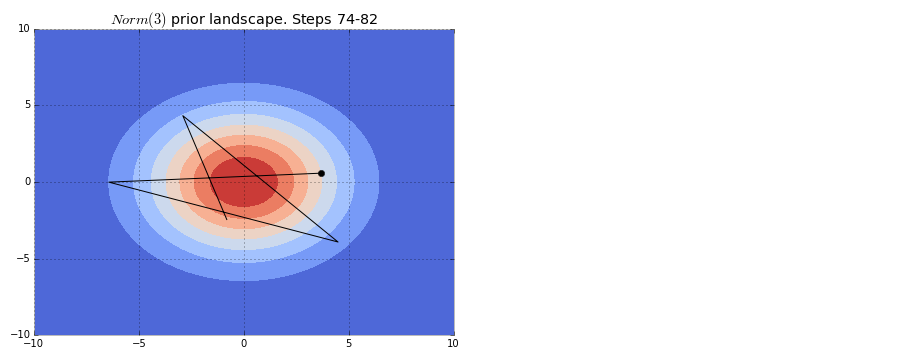
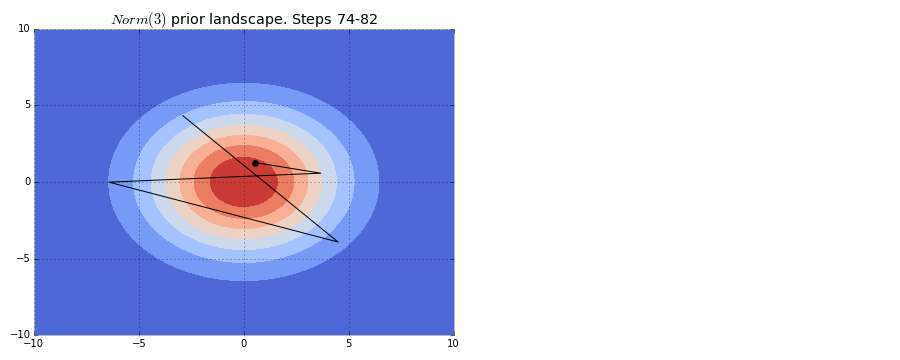
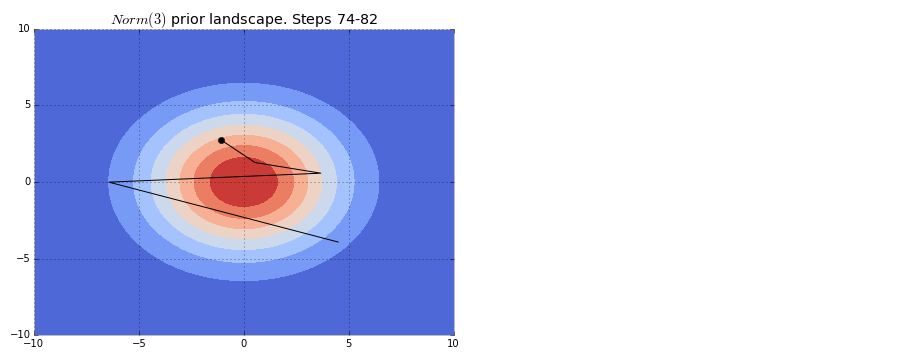
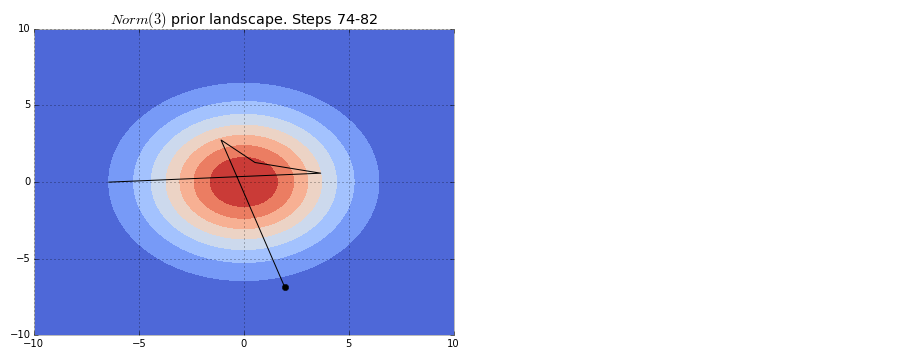
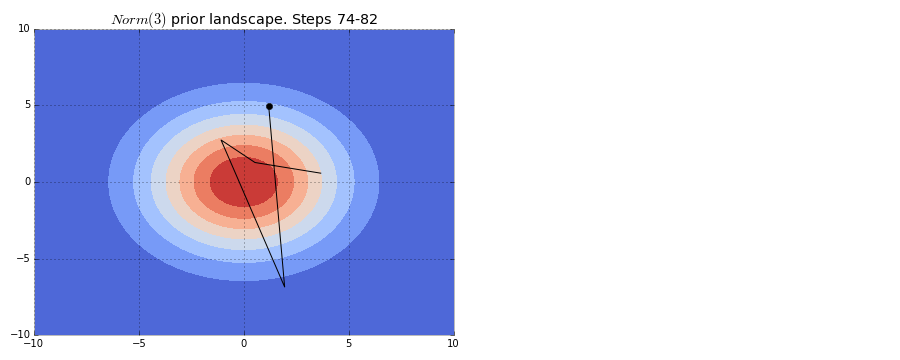
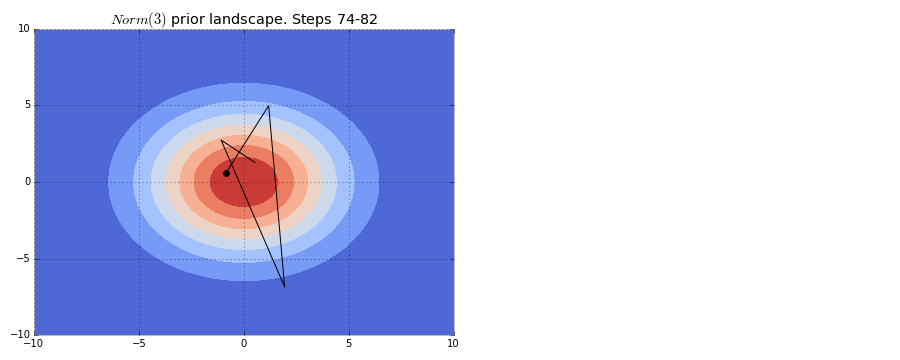
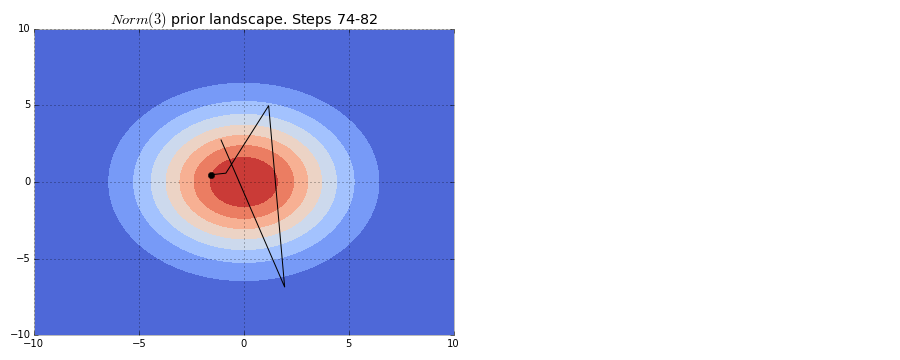
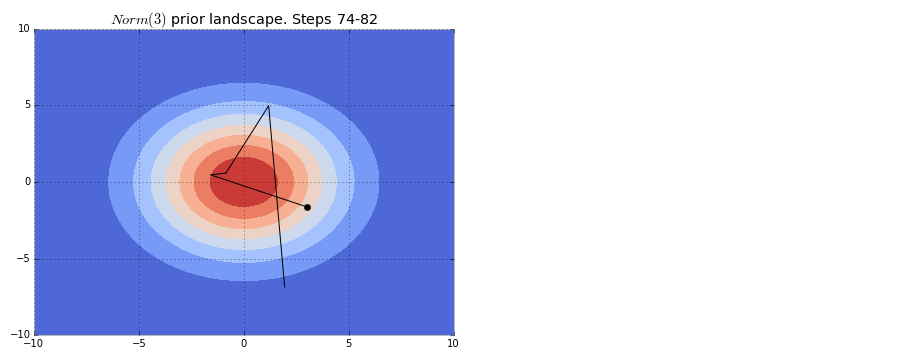
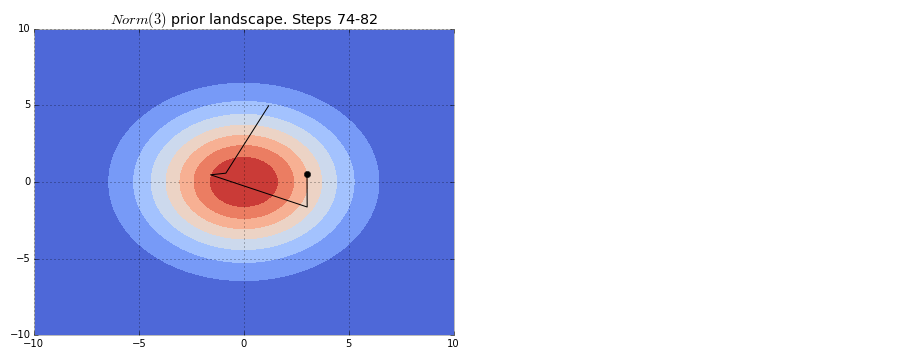
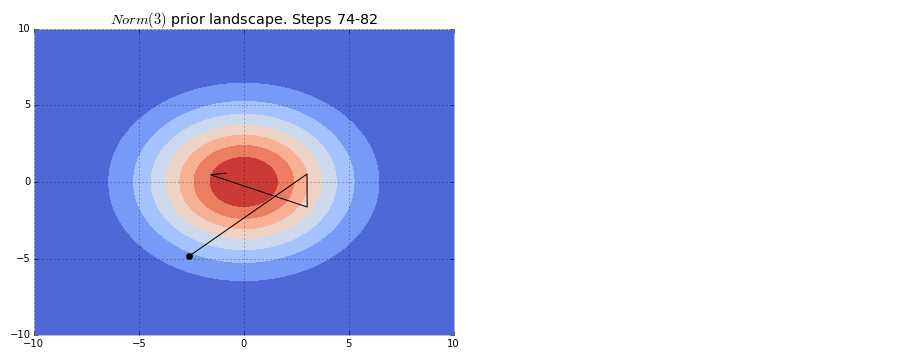
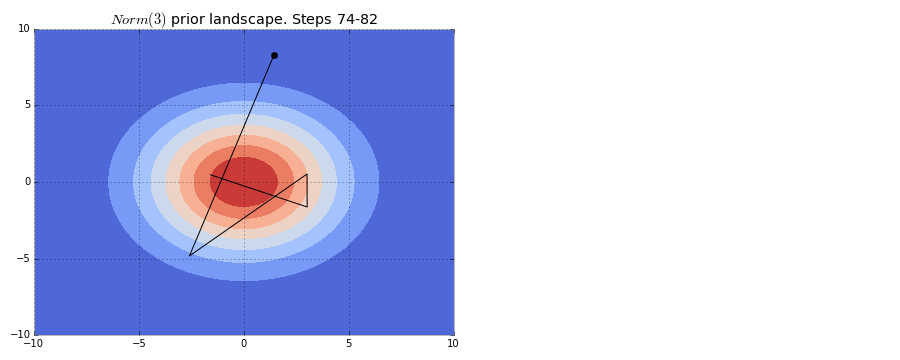
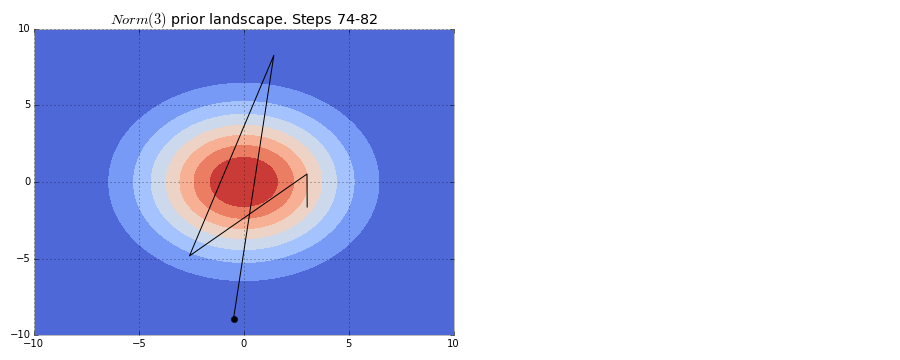
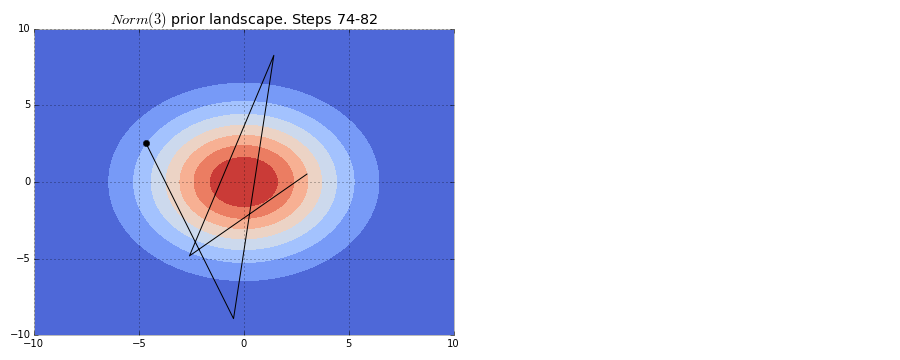
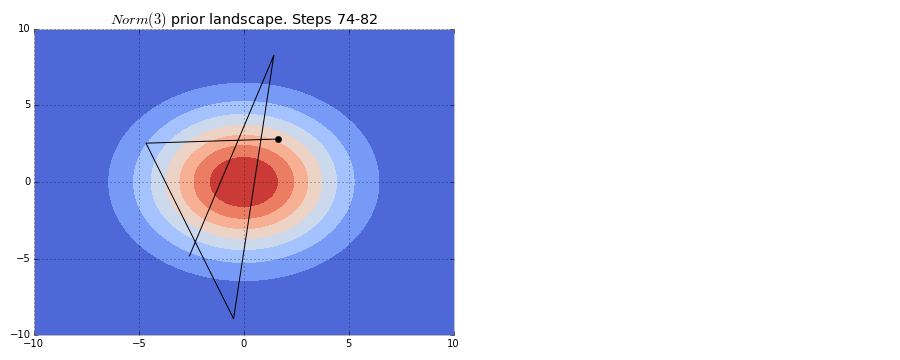
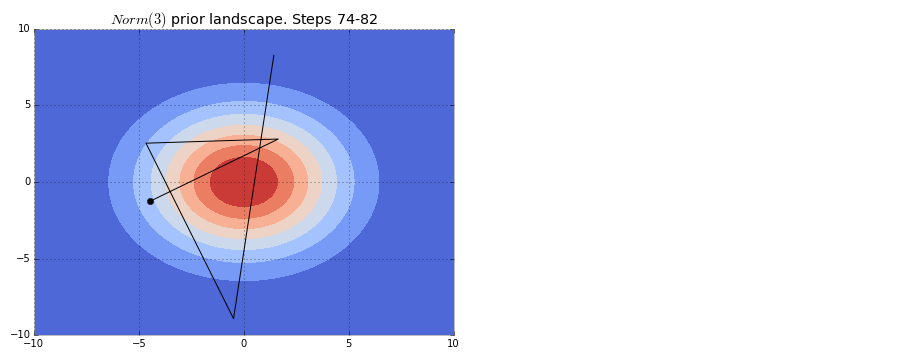
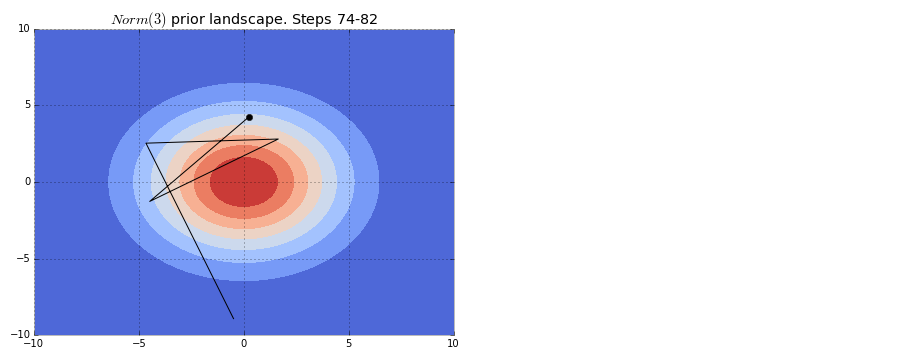
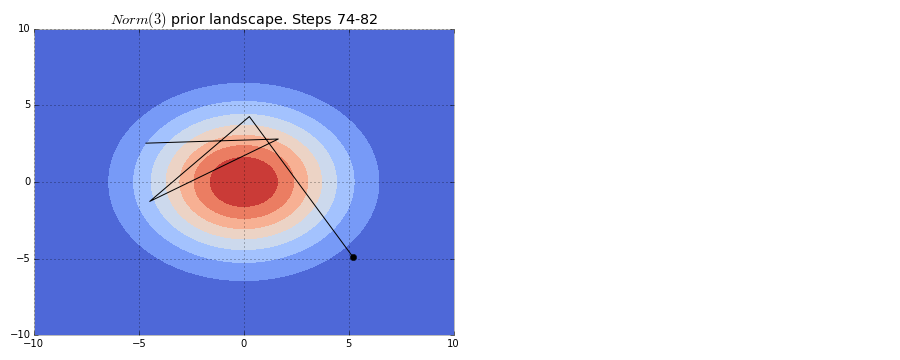
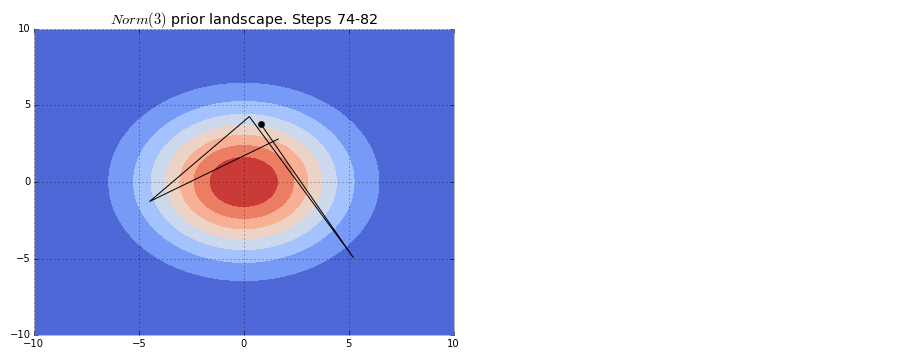
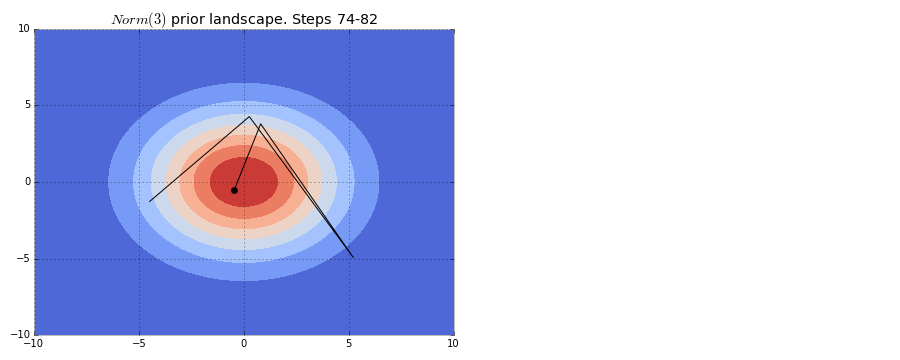
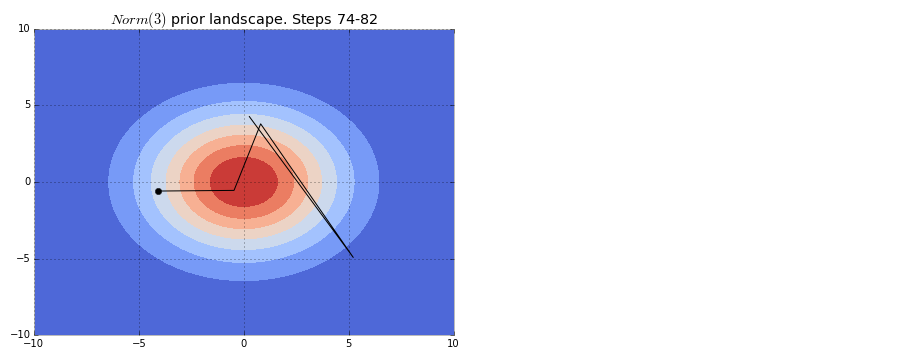
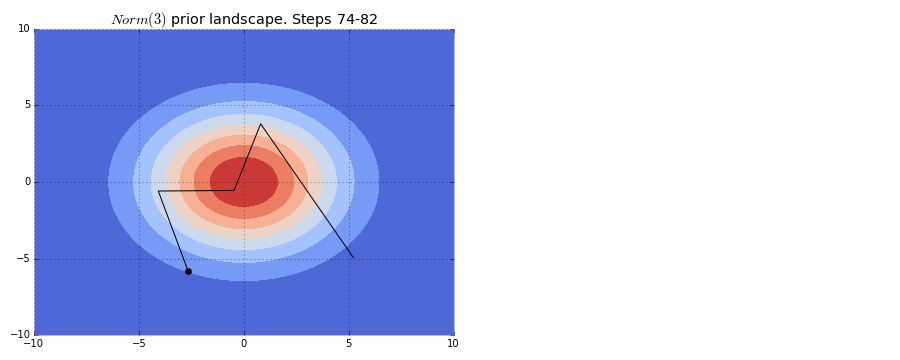
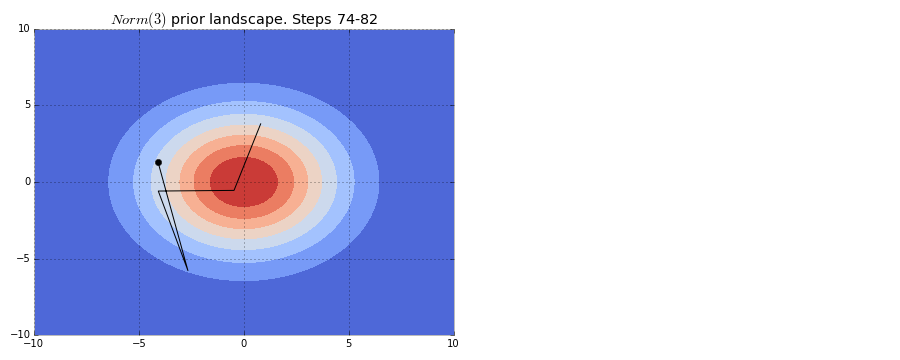
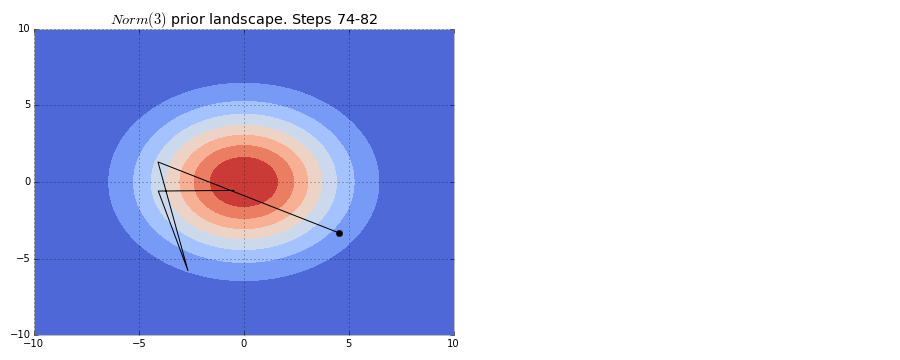
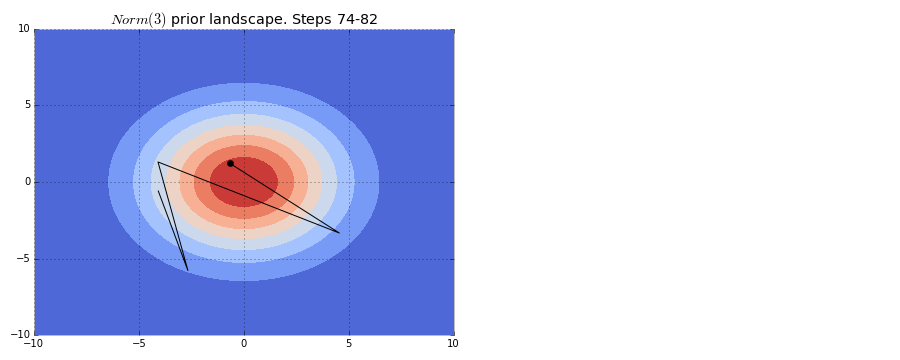
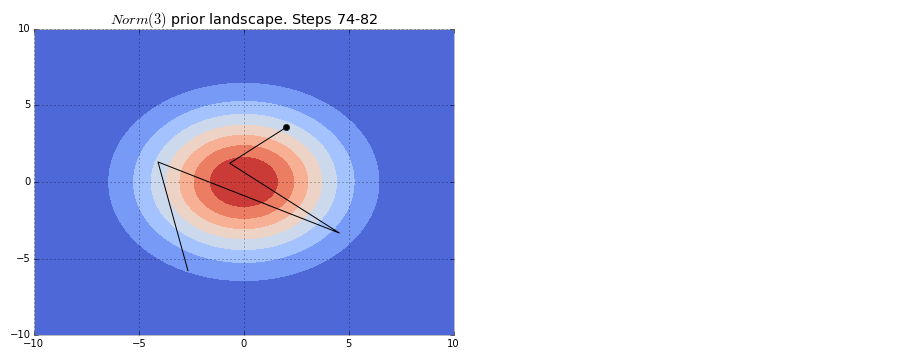
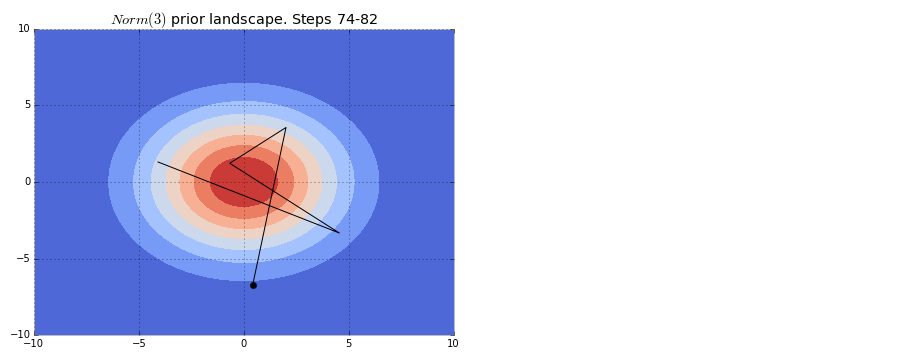
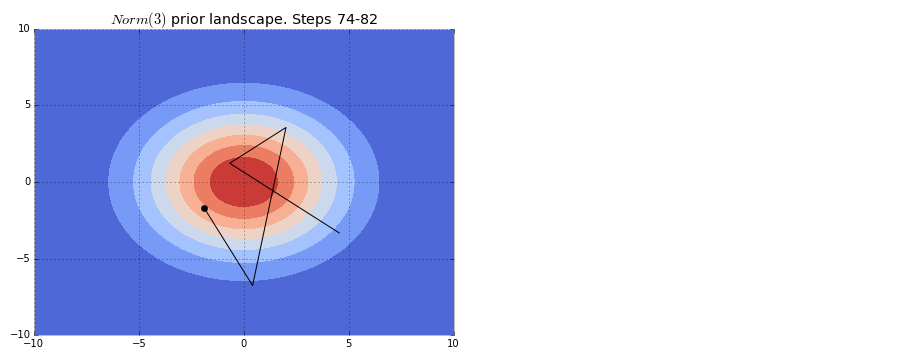
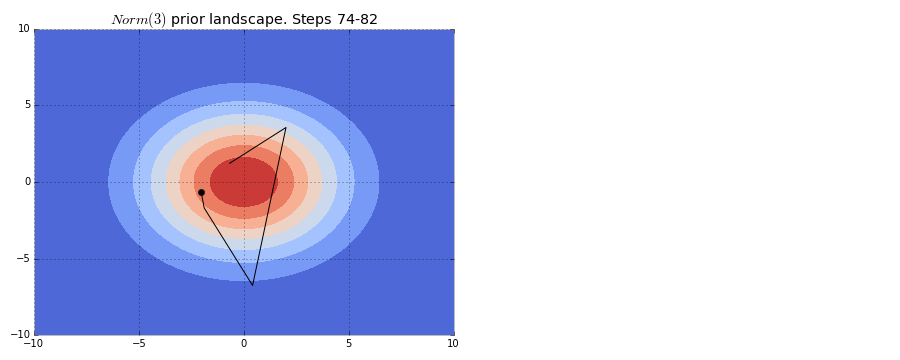
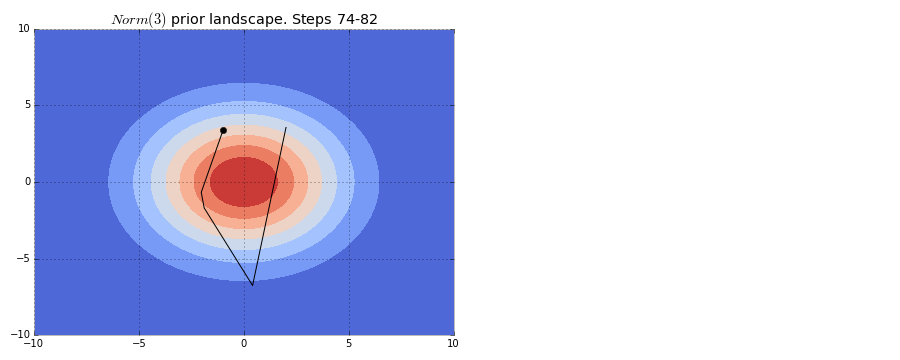
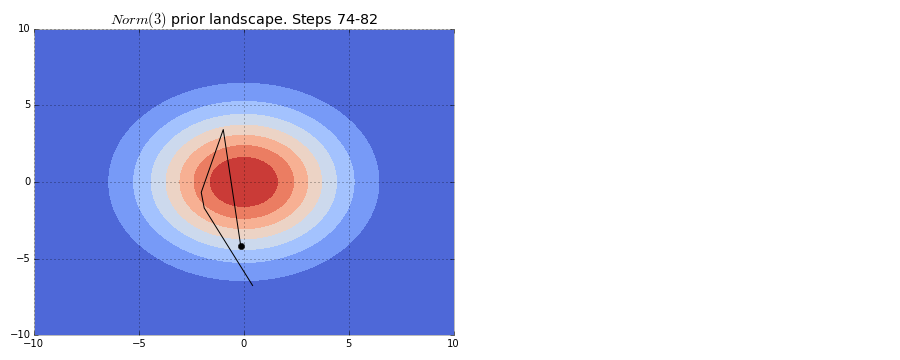
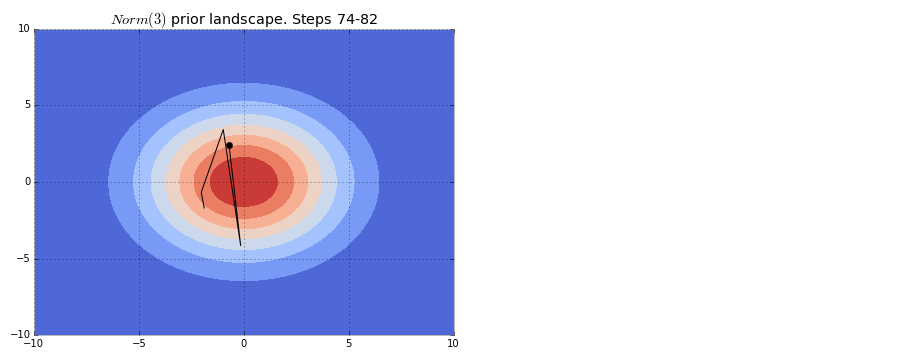
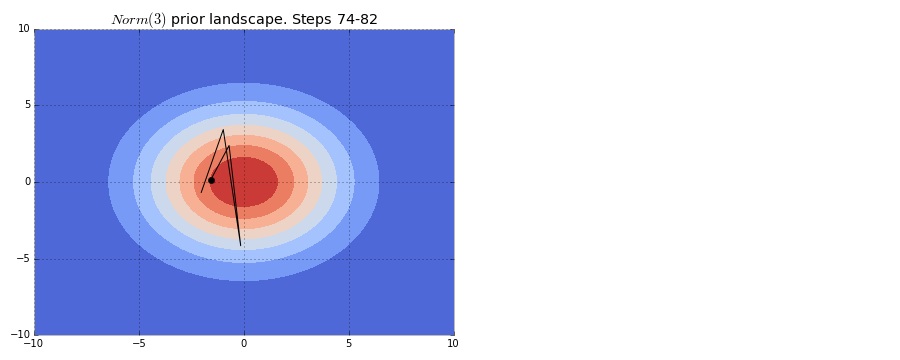
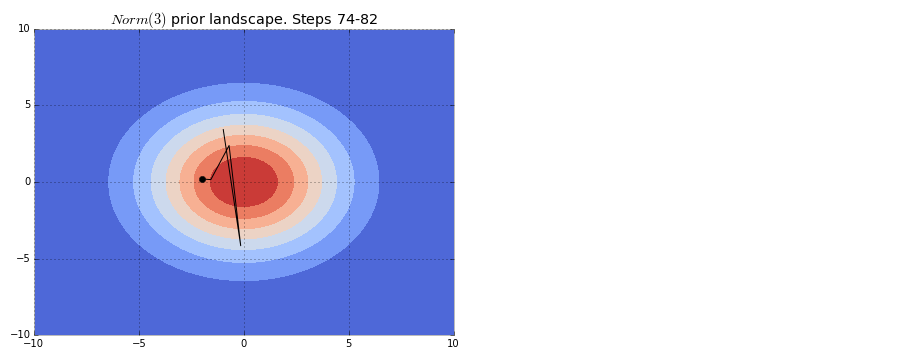
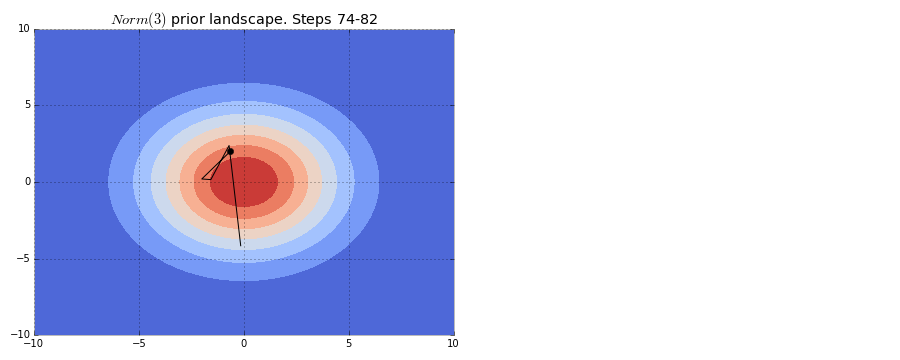
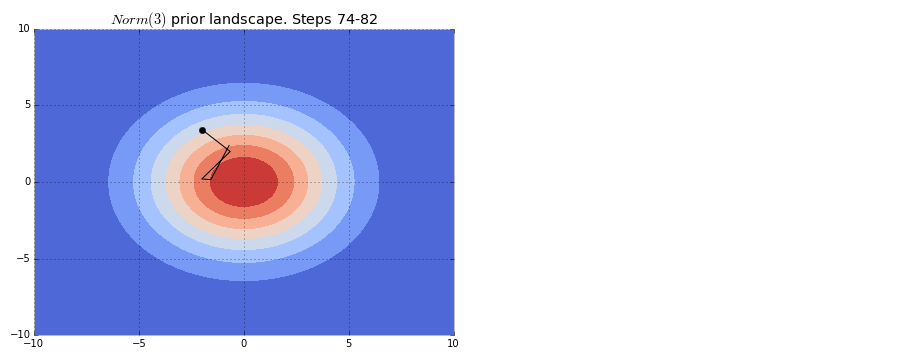
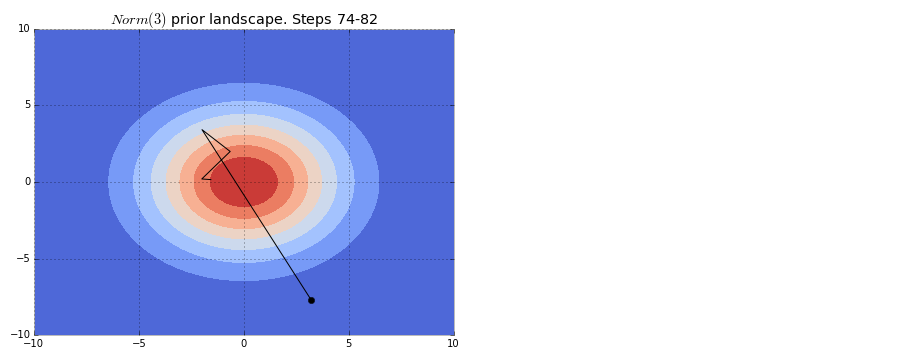
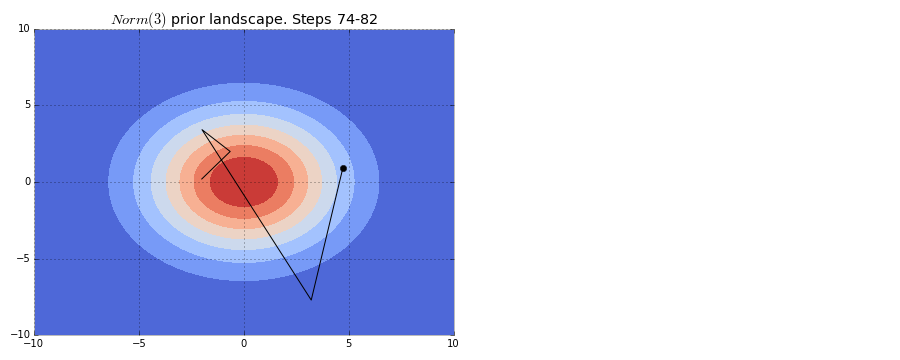
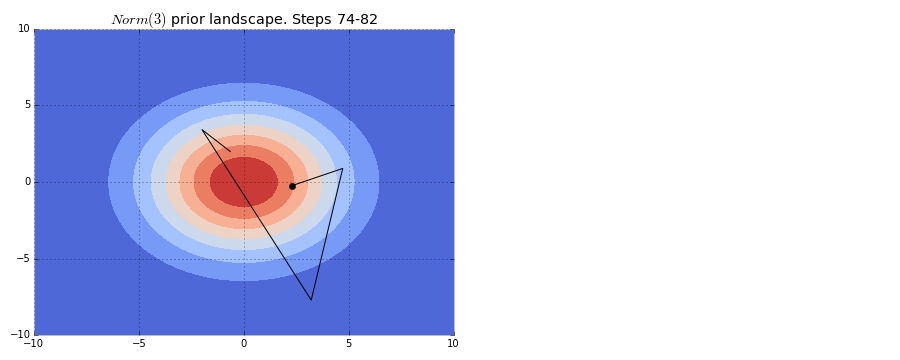
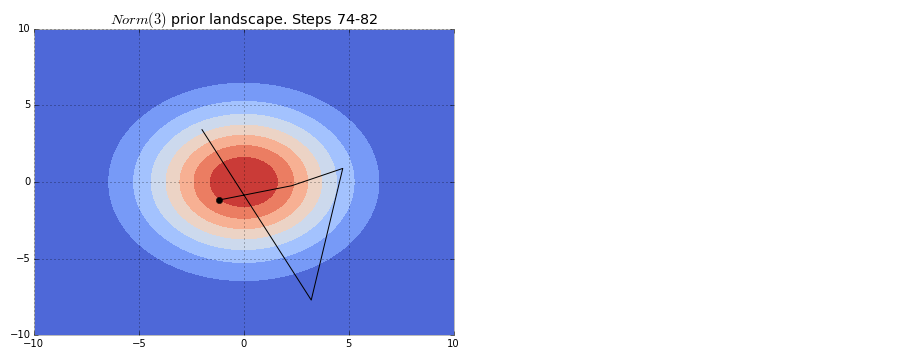
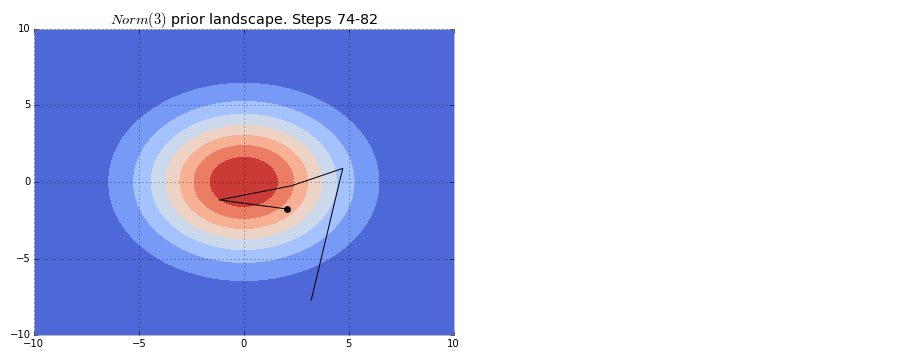
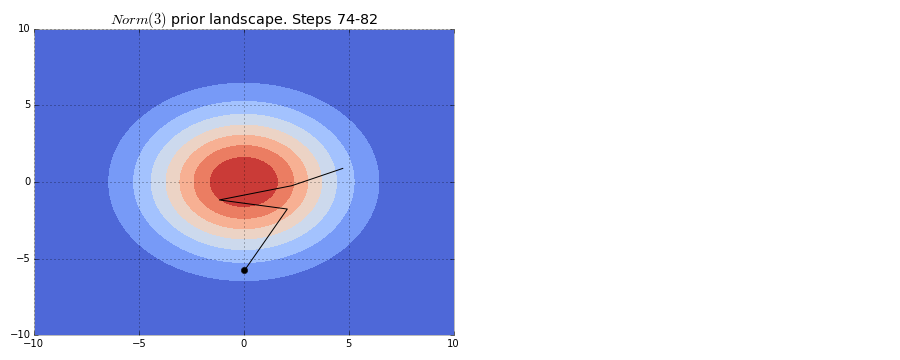
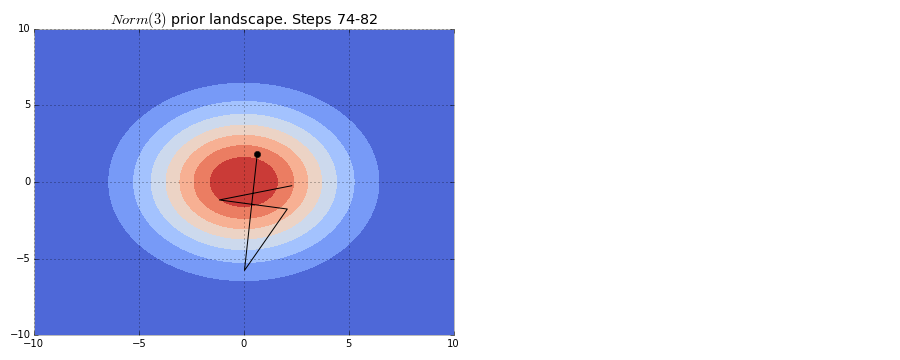
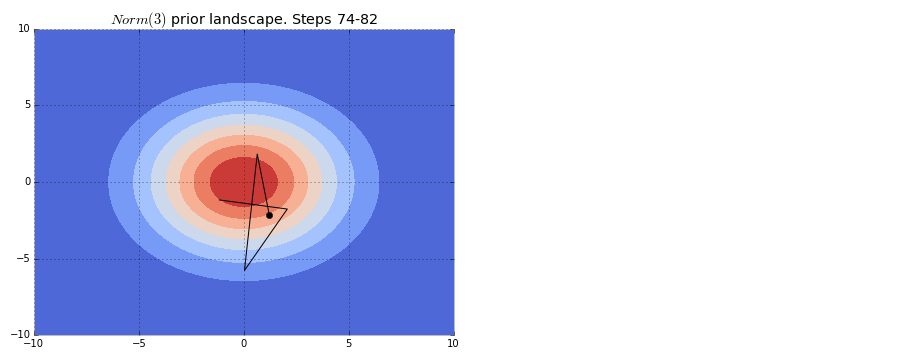
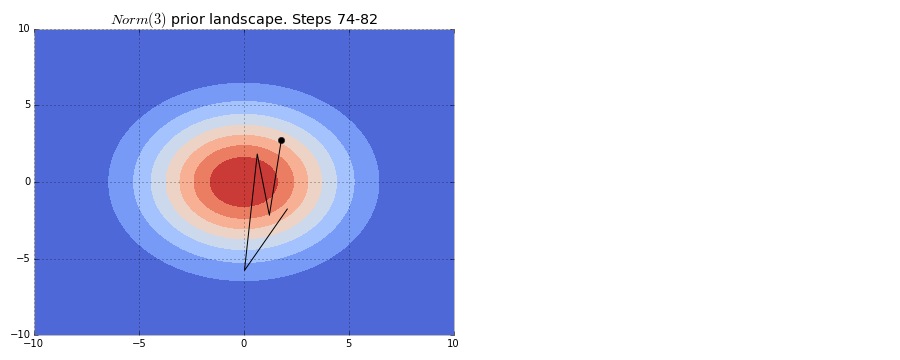
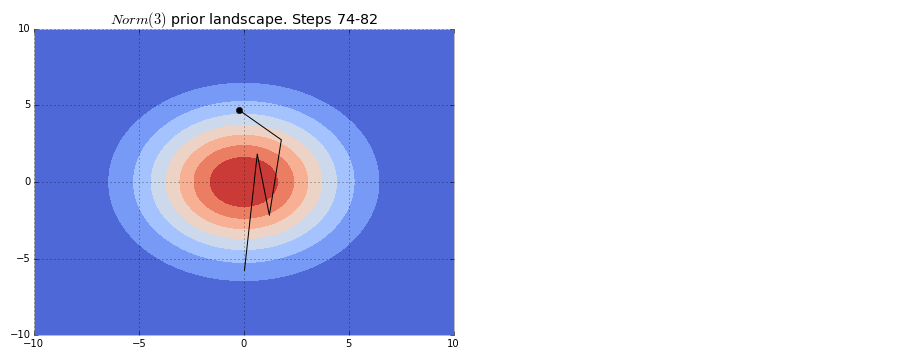
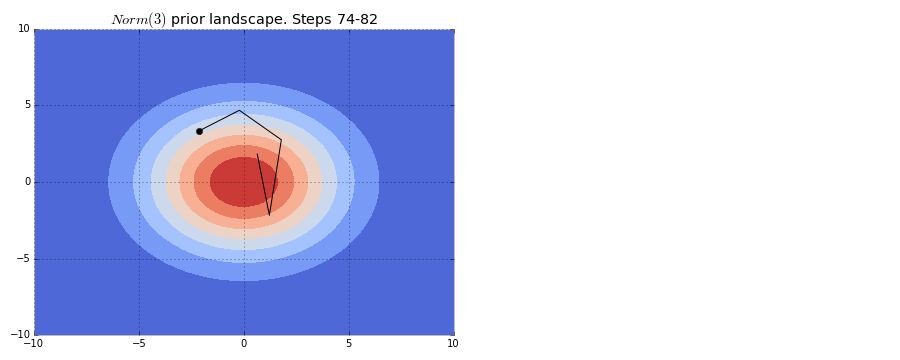
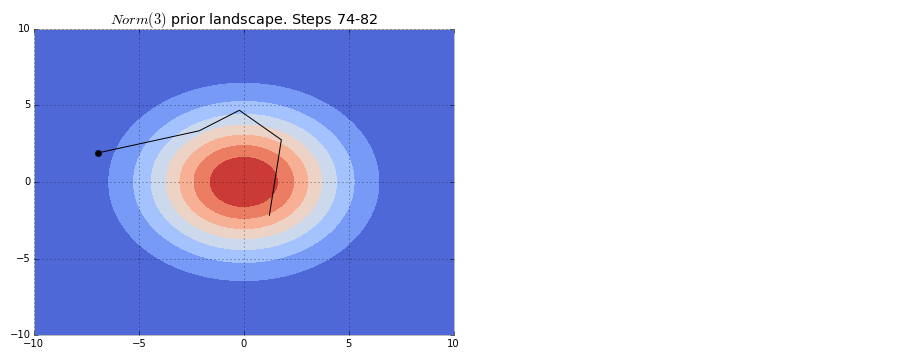
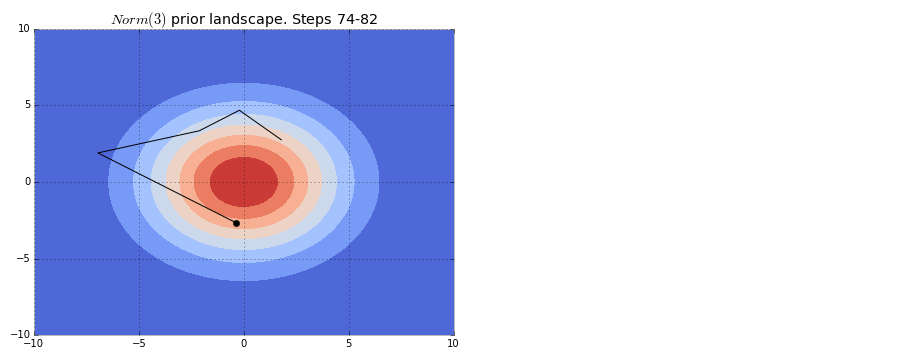
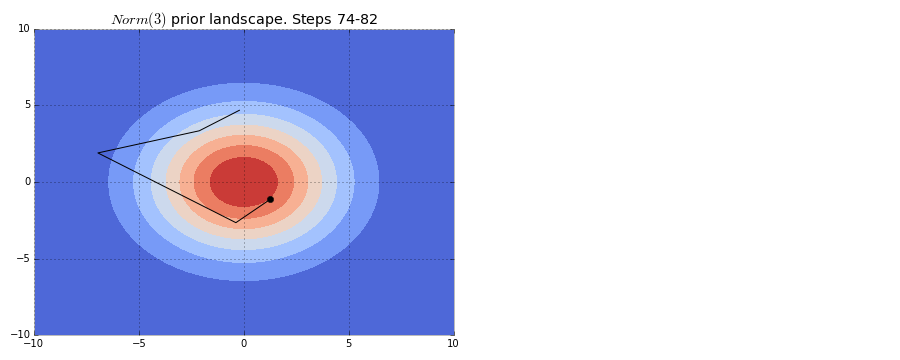
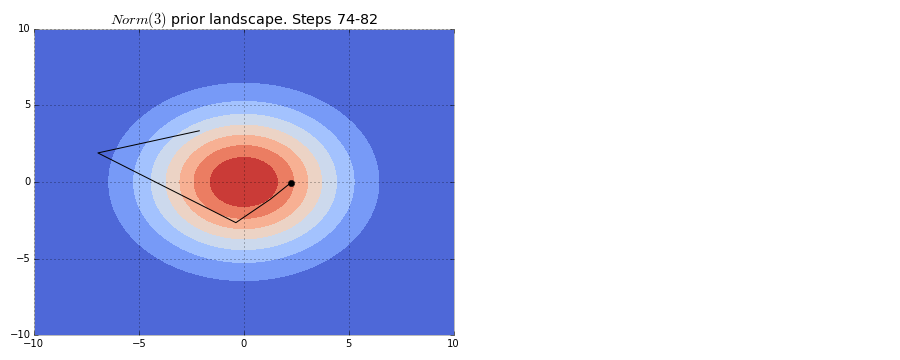
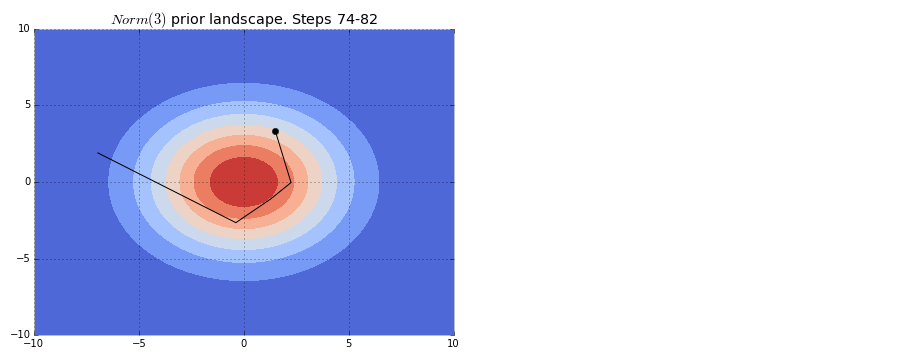
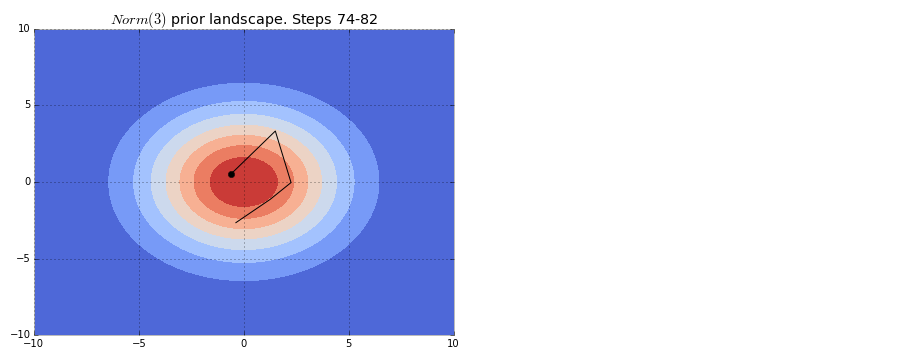
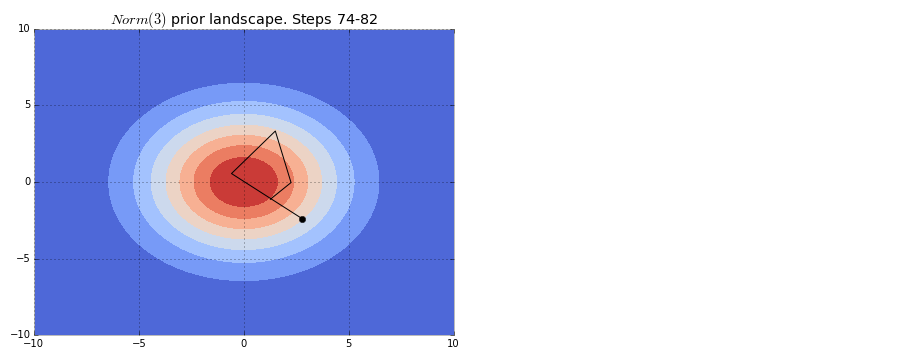
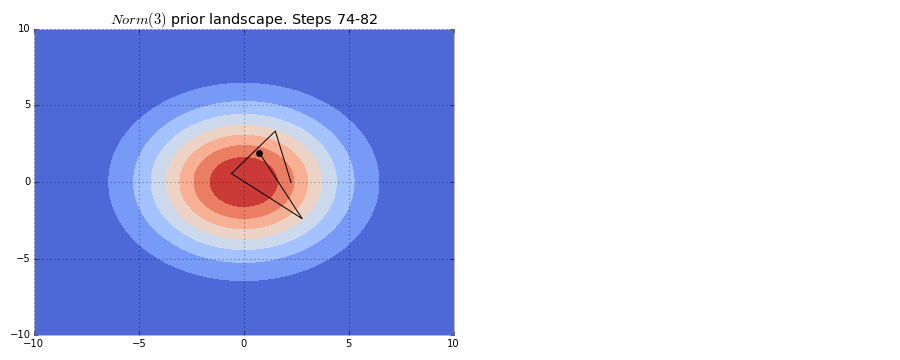
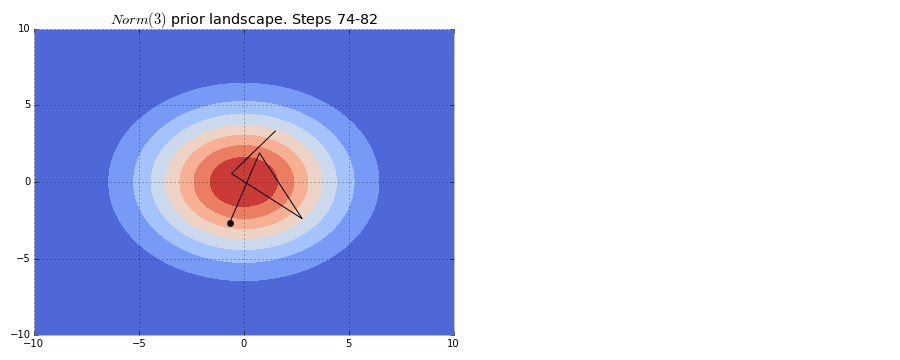
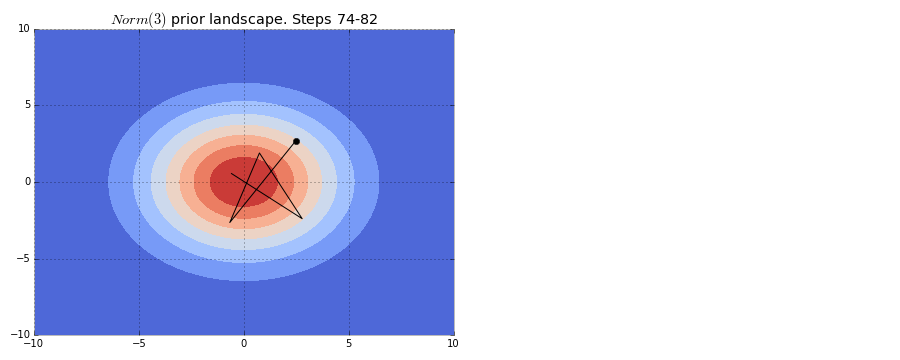
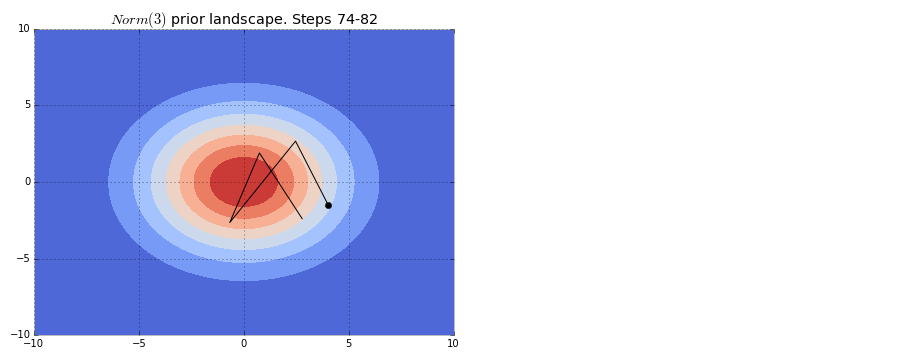
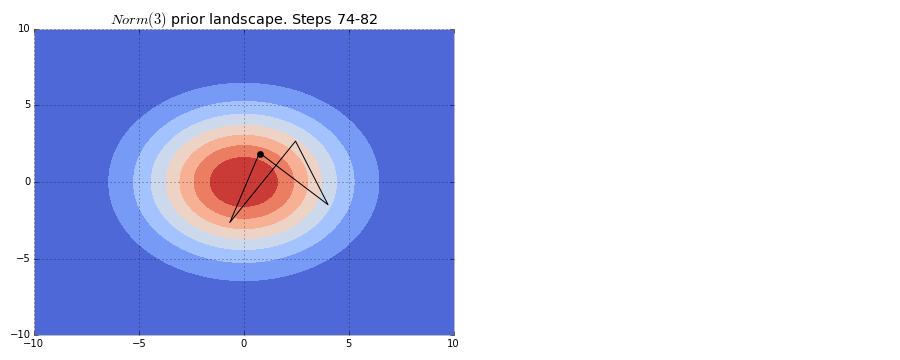
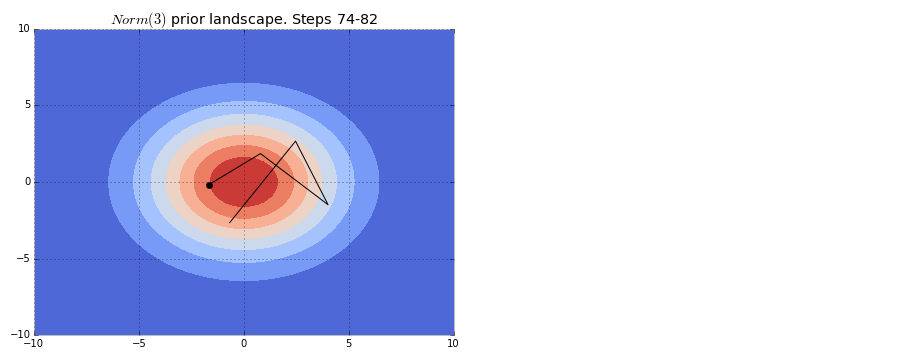
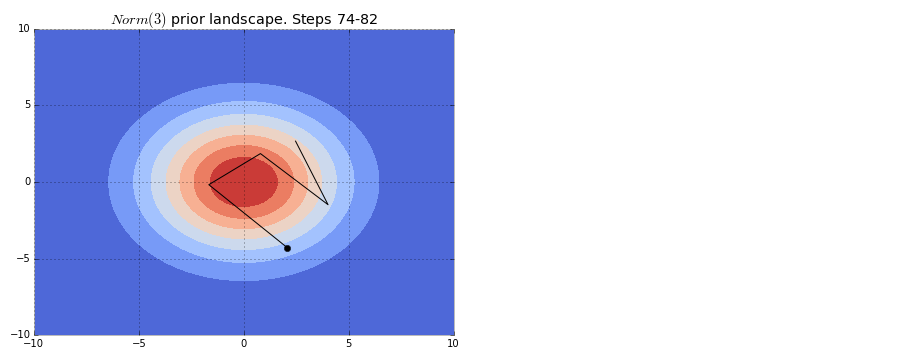
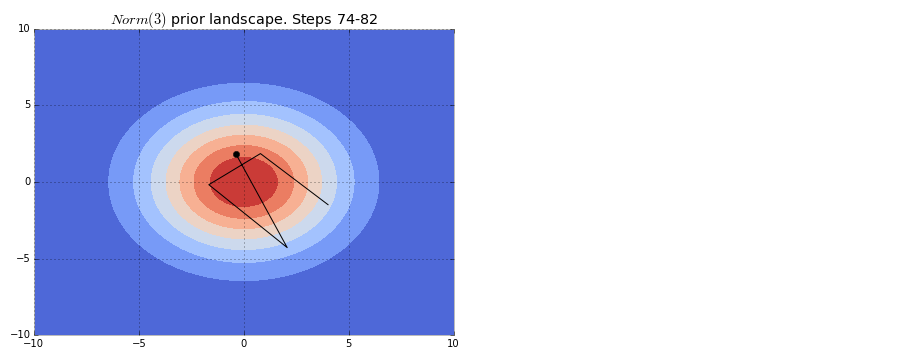
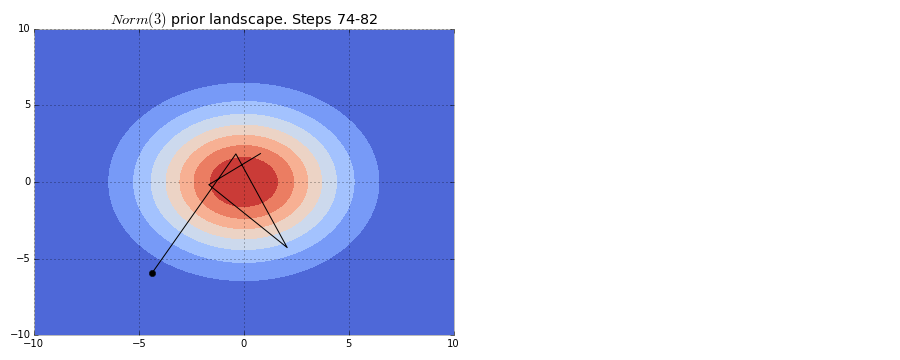
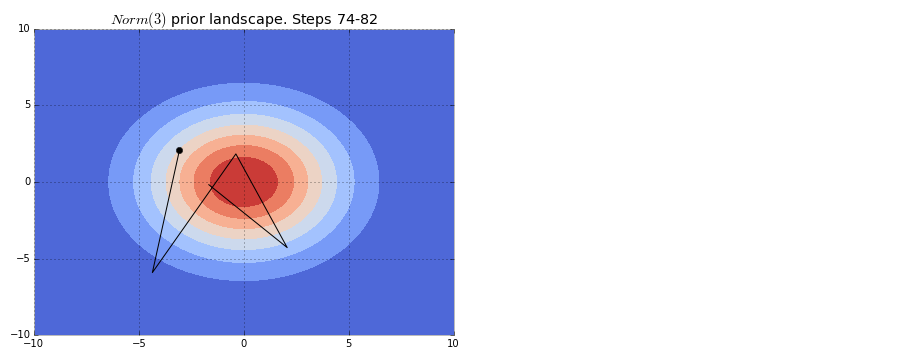
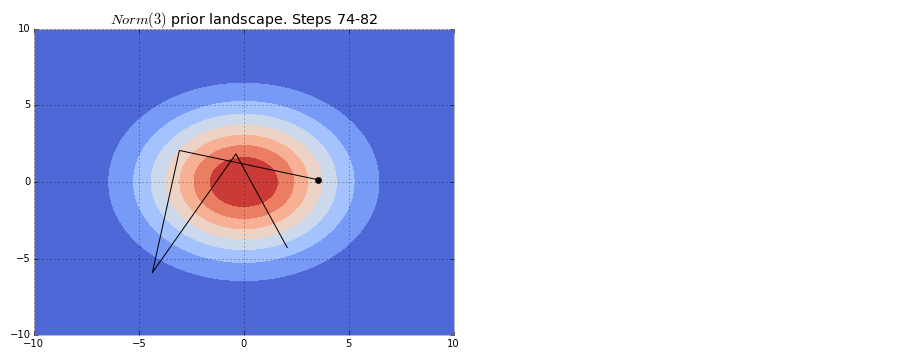
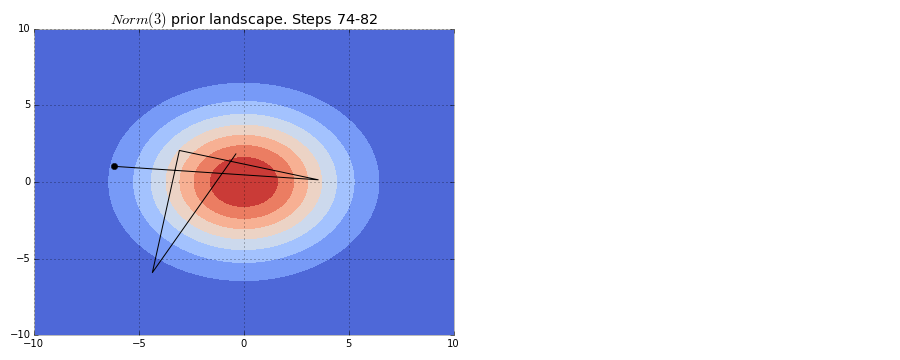
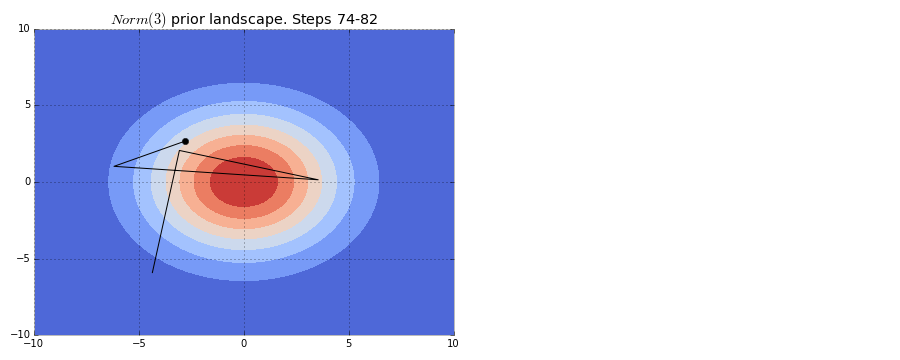
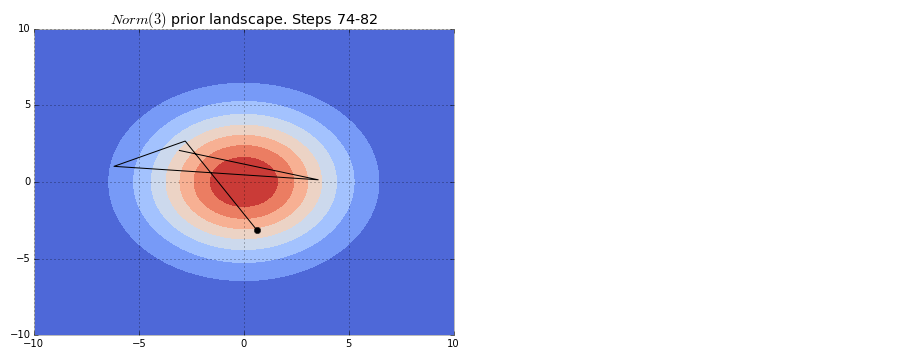
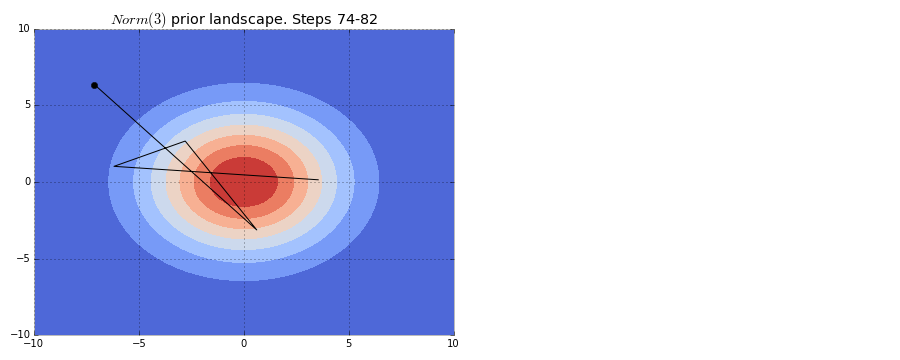
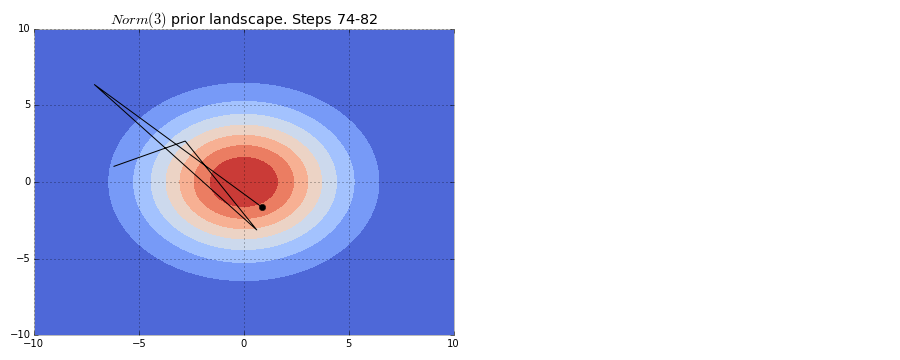
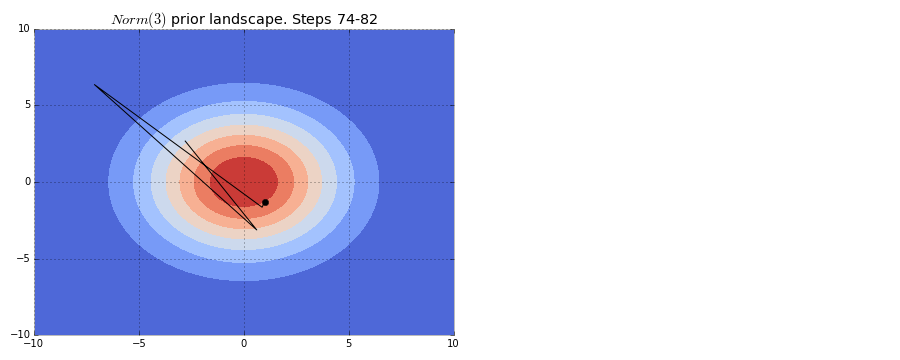
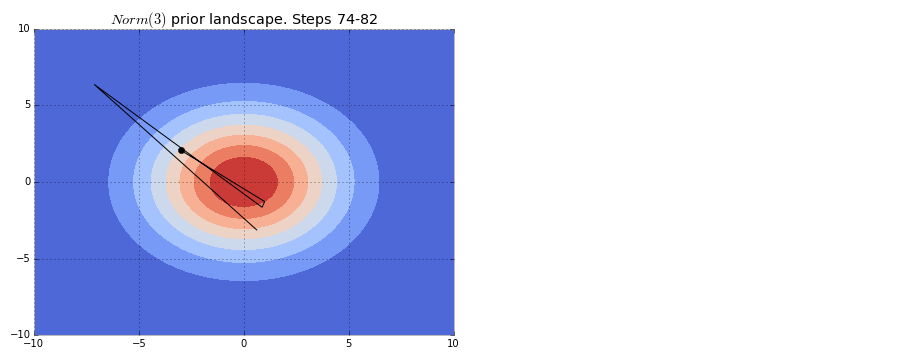
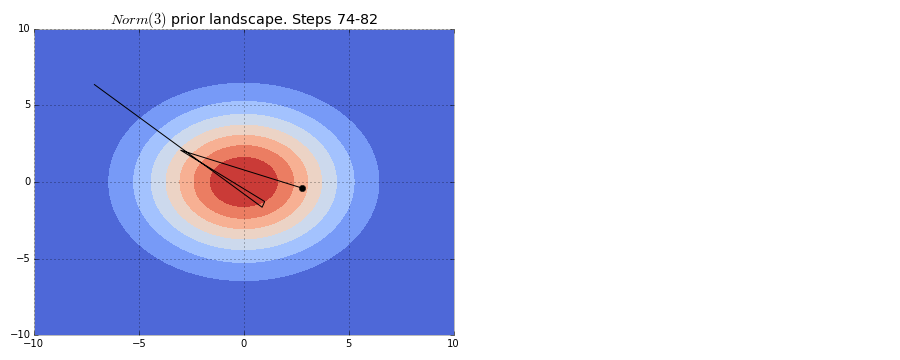
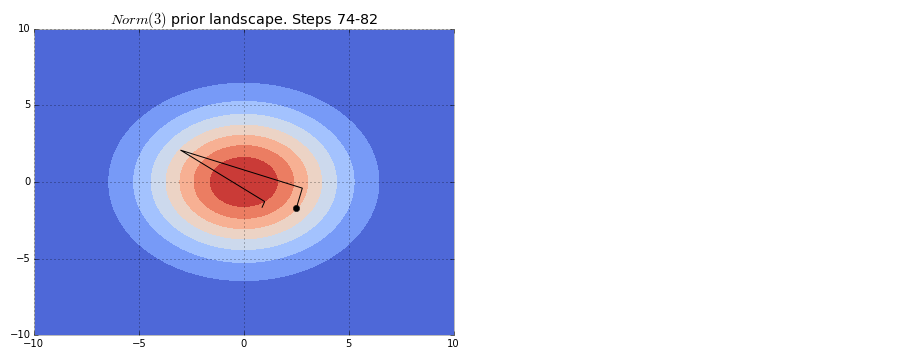
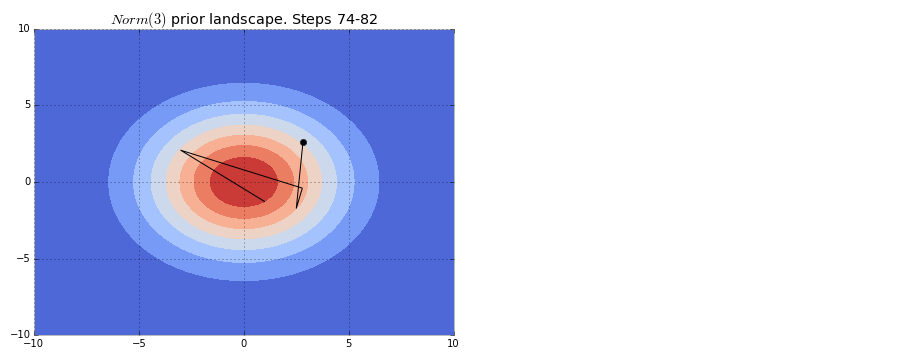
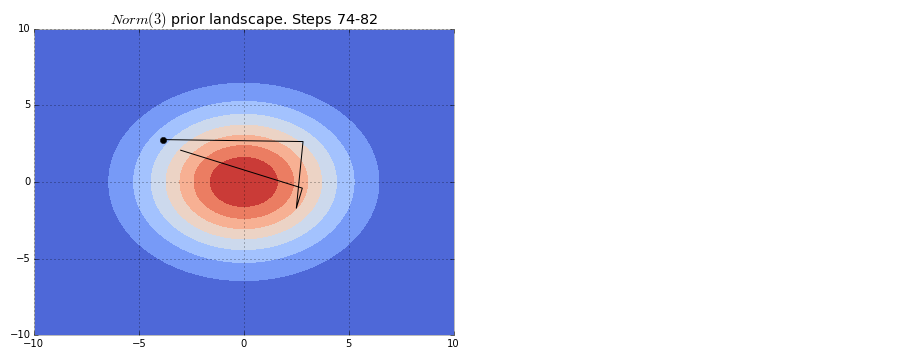
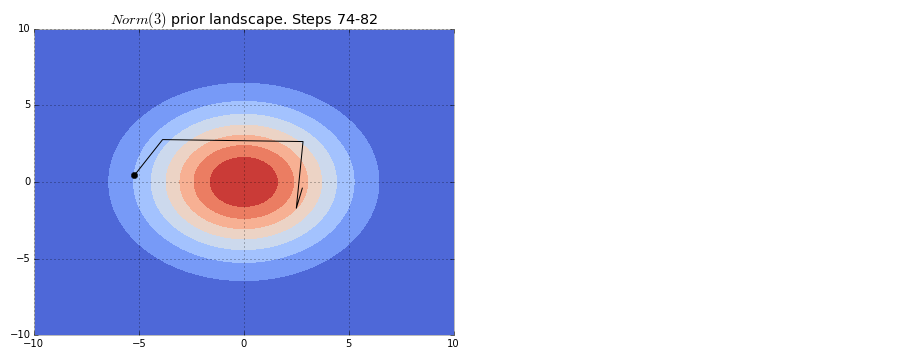
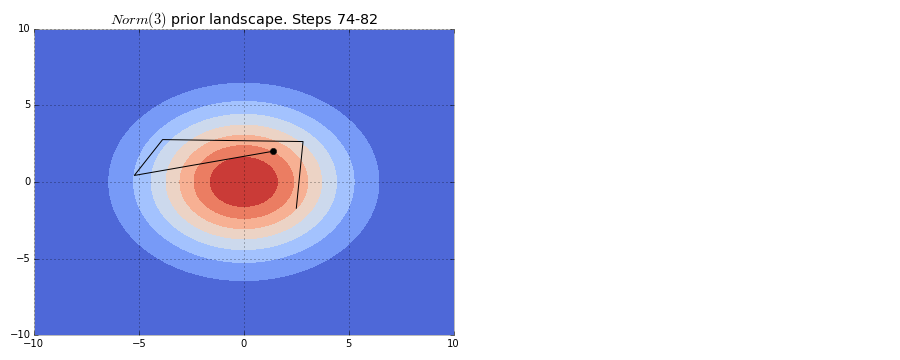
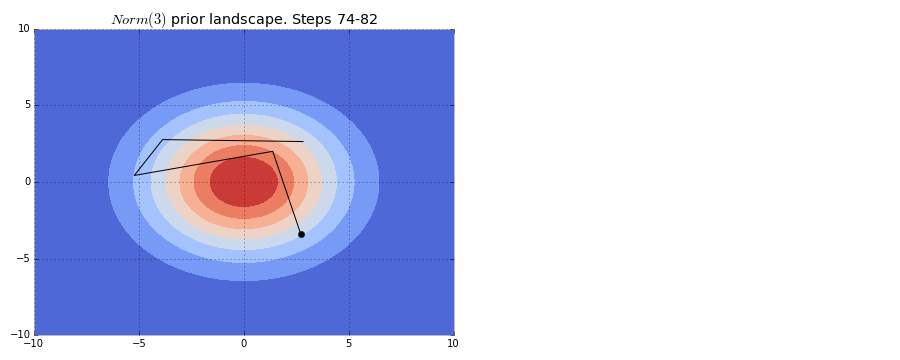
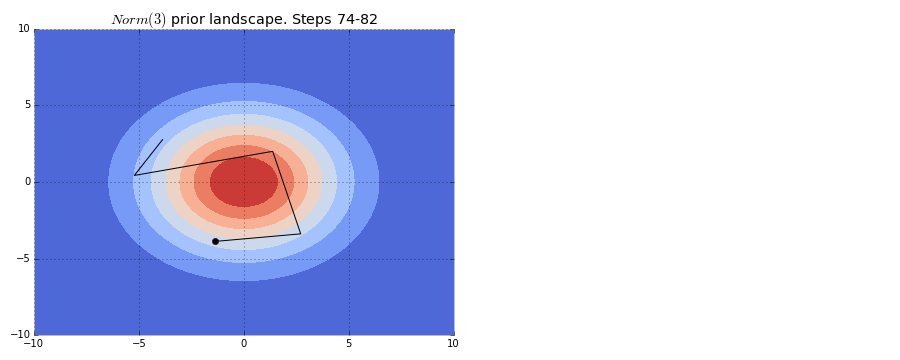
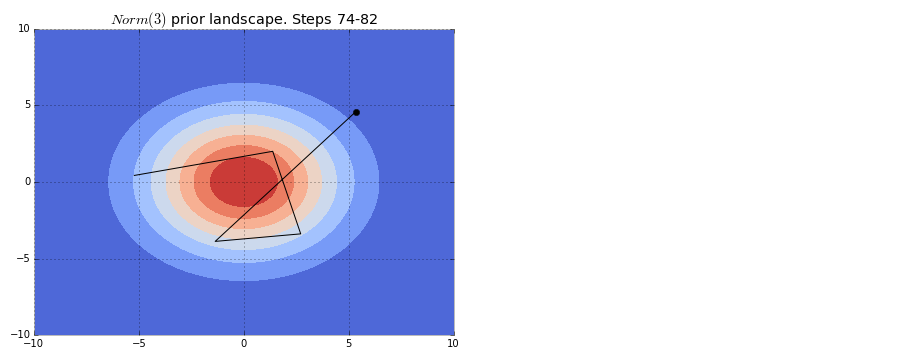
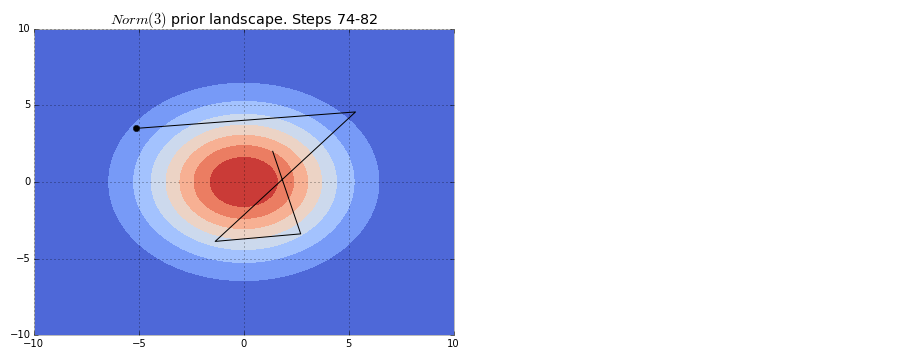
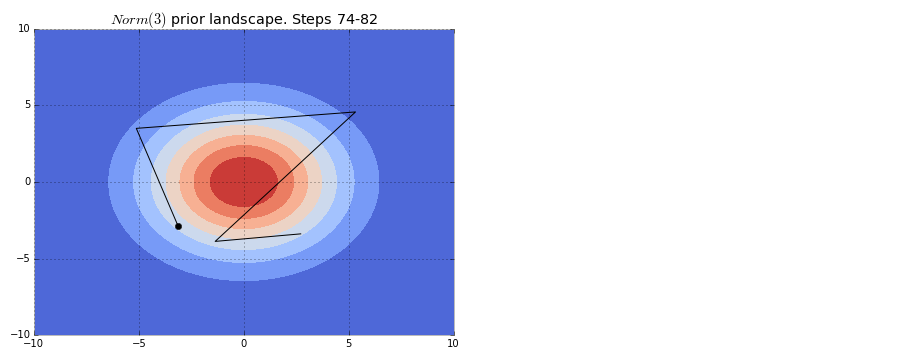
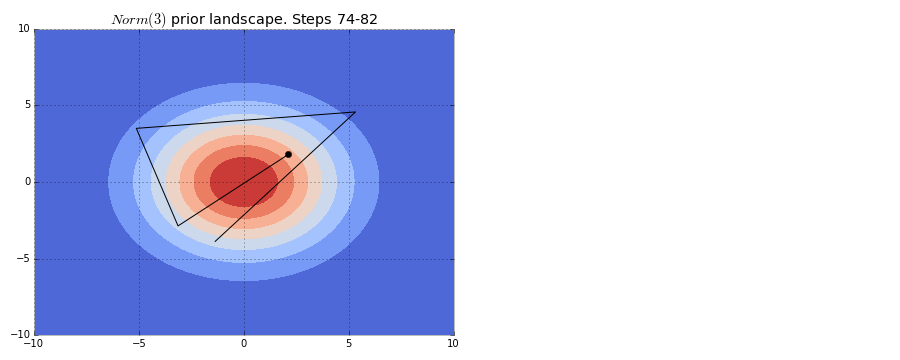
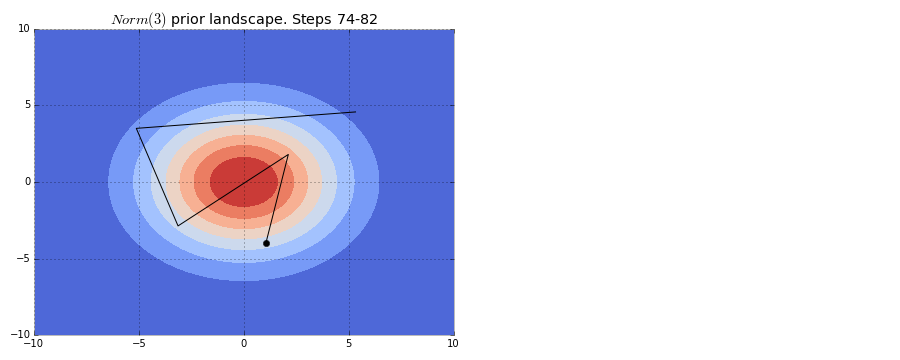
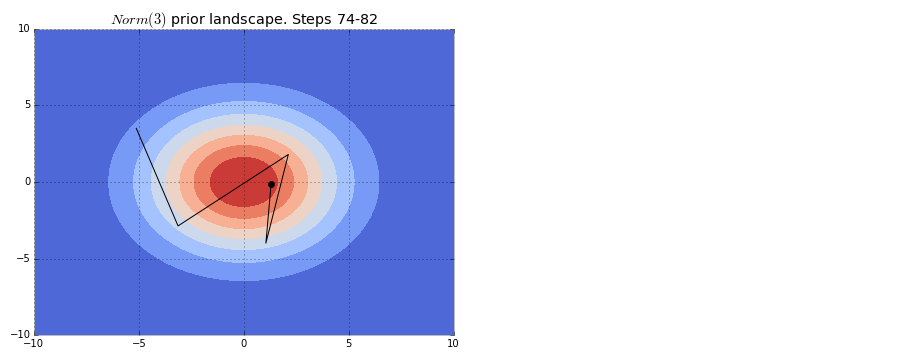
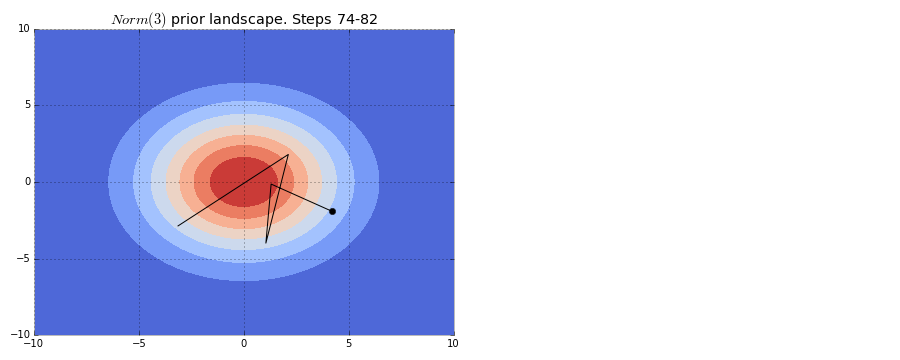

In [8]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from JSAnimation import IPython_display
from matplotlib import animation

figsize(12.5, 5)
fig = plt.figure()
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)
exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])


ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")


plt.tight_layout()



points, = ax.plot([], [], 'bo', ms=6, color = "k")
line, = ax.plot([], [], lw=1, color = "k")

def init():

    points.set_data([], [])
    line.set_data([], [])

    return points

def animate(i):

    points.set_data(trace["alpha"][i],trace["beta"][i])
    x = np.array([trace["alpha"][i], trace["alpha"][i-1], trace["alpha"][i-2], trace["alpha"][i-3],trace["alpha"][i-4]])
    y = np.array([trace["beta"][i], trace["beta"][i-1],trace["beta"][i-2], trace["beta"][i-3],trace["beta"][i-4]])
    
    line.set_data(x,y)

    return points, line


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=180, blit=True)



##NUTS

In [2]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.NUTS() # instantiate sampler
    trace = pm.sample(200, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 200 of 200 complete in 0.1 sec

C:\Users\Miguel\Anaconda\lib\site-packages\theano\scan_module\scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [9]:
len(trace[0])

2

In [3]:
pm.Deterministic?

In [5]:
pm.summary(trace)


alpha:
 
  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.160            3.379            0.249            [-7.798, 5.564]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -6.729         -1.945         0.114          2.731          7.149


beta:
 
  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.007           3.001            0.201            [-5.203, 5.040]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -5.149         -2.105         -0.184         2.237          5.631



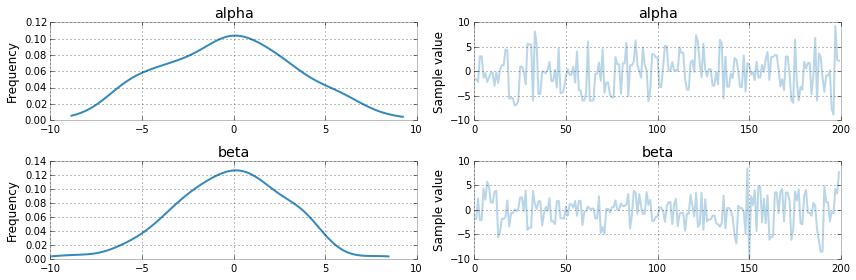

In [10]:
%matplotlib inline


pm.traceplot(trace);


###Points distribution

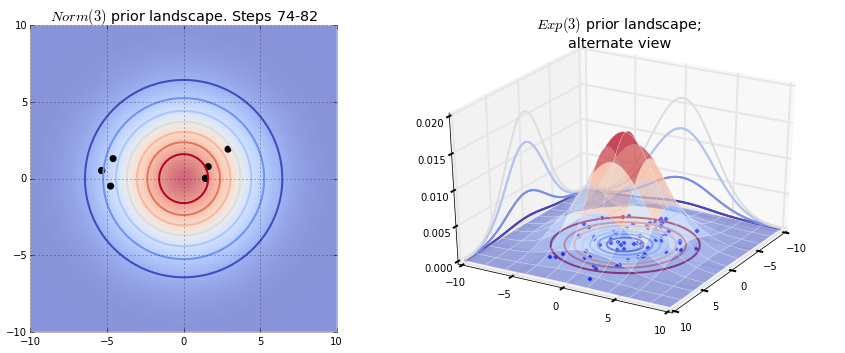

In [14]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)


### Searching algorithm


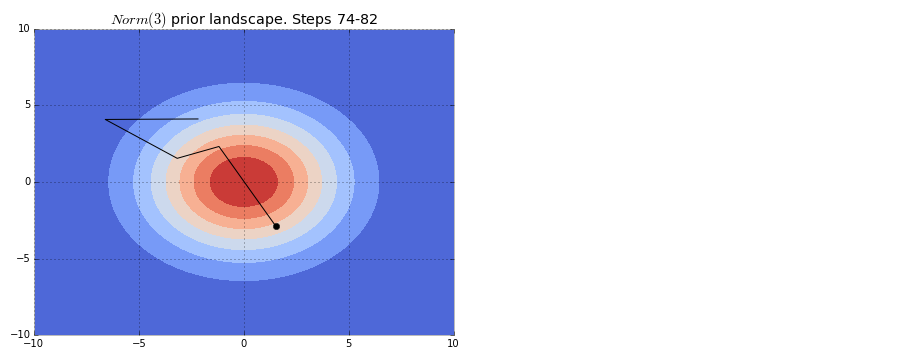
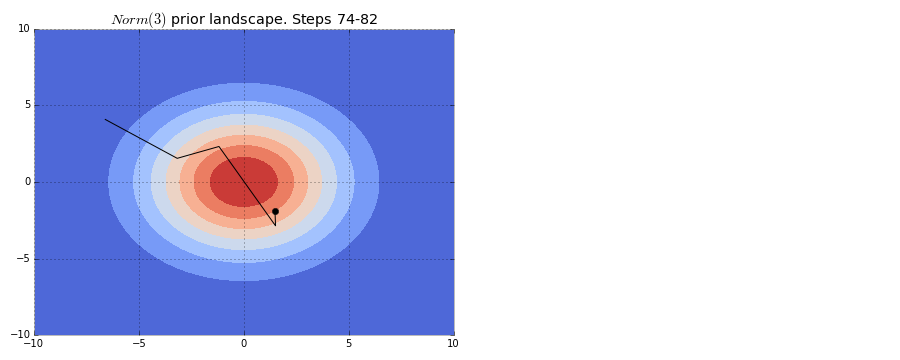
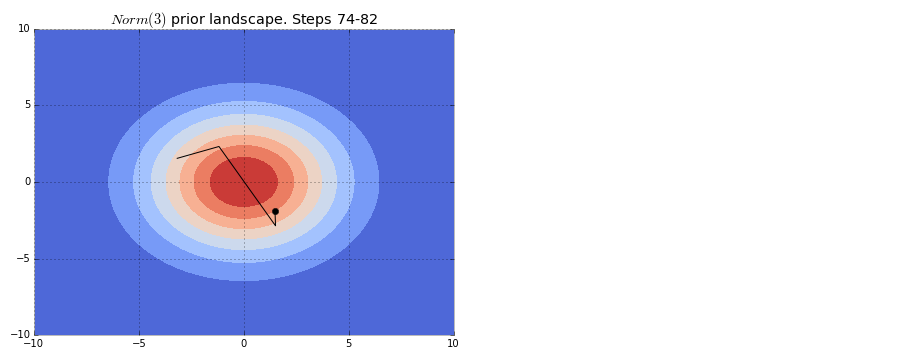
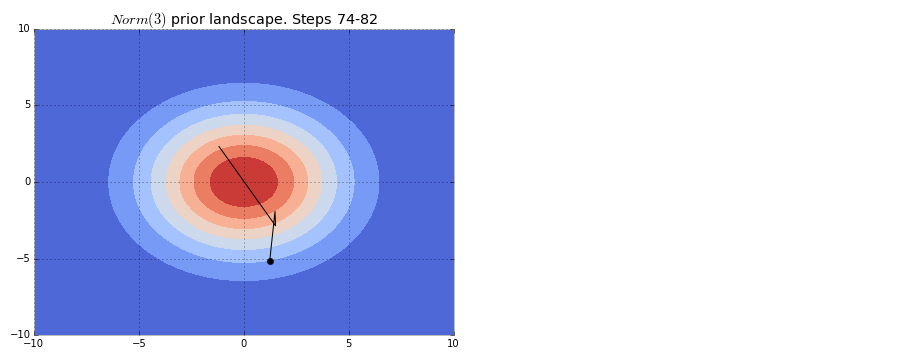
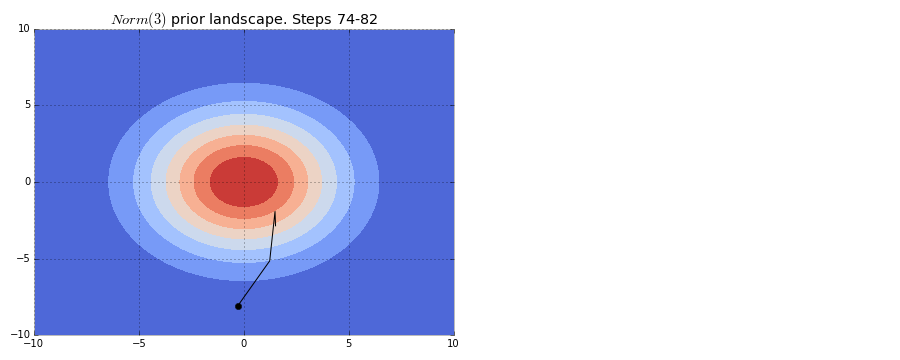
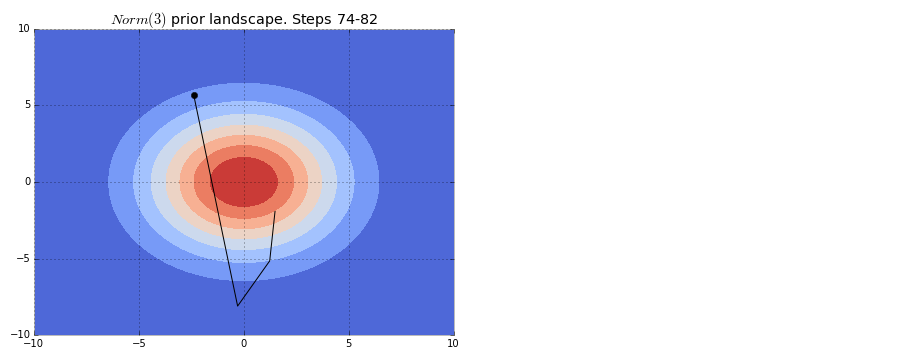
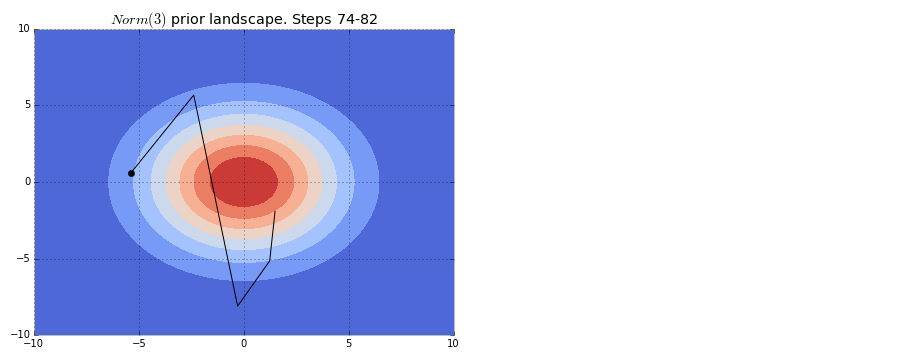
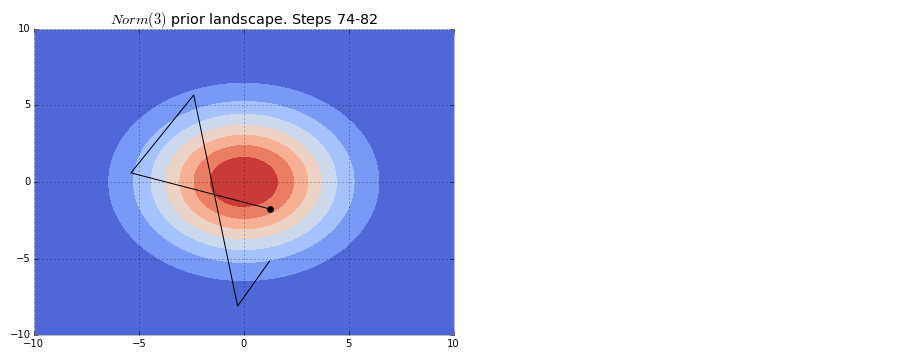
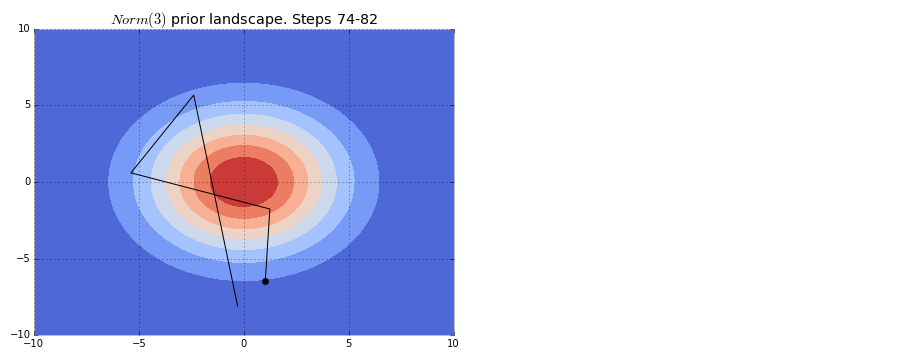
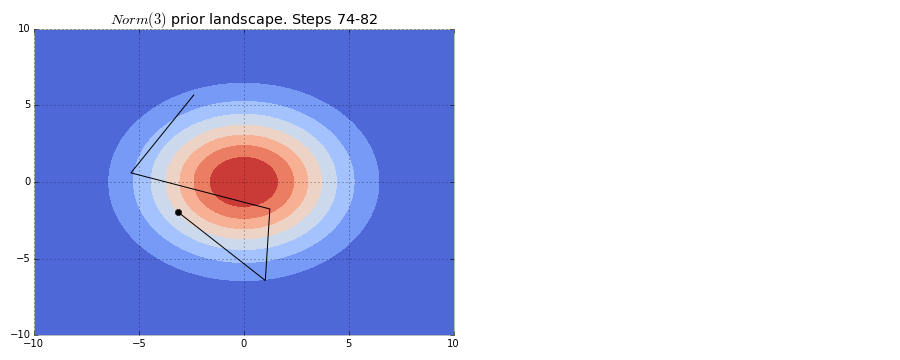
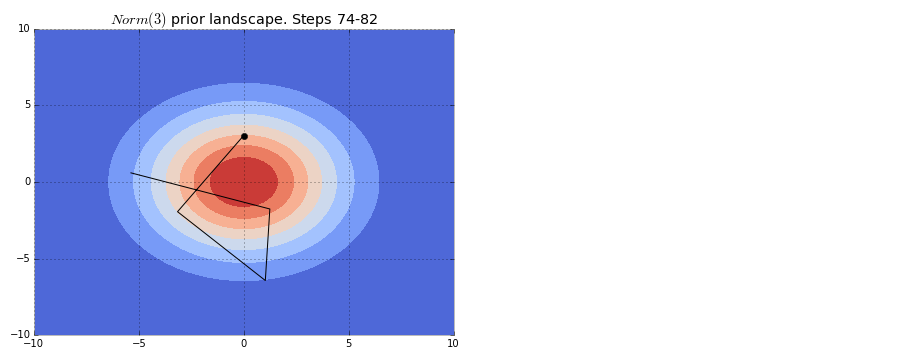
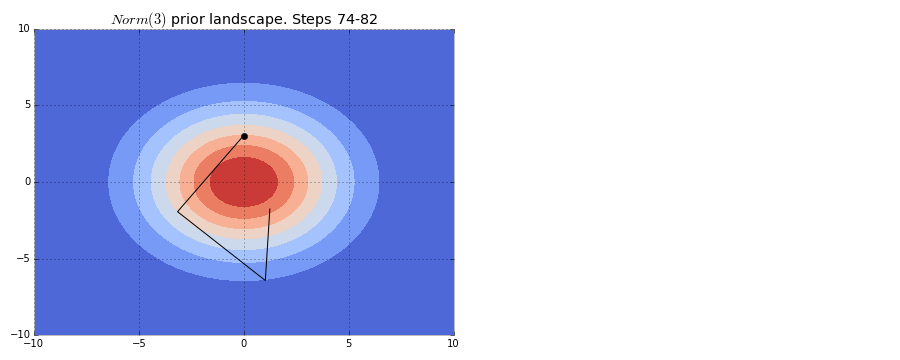
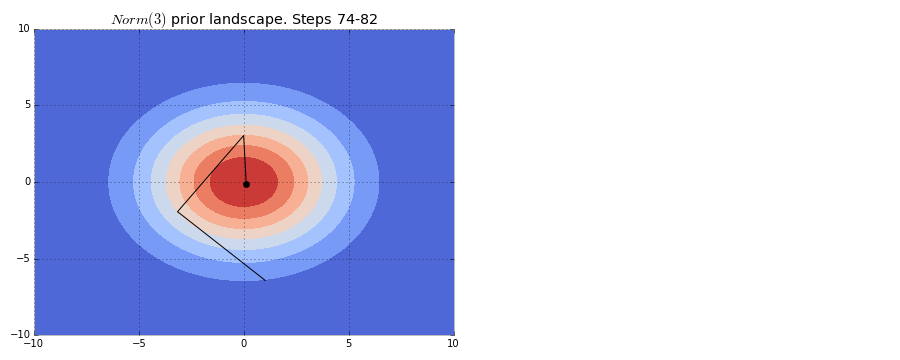
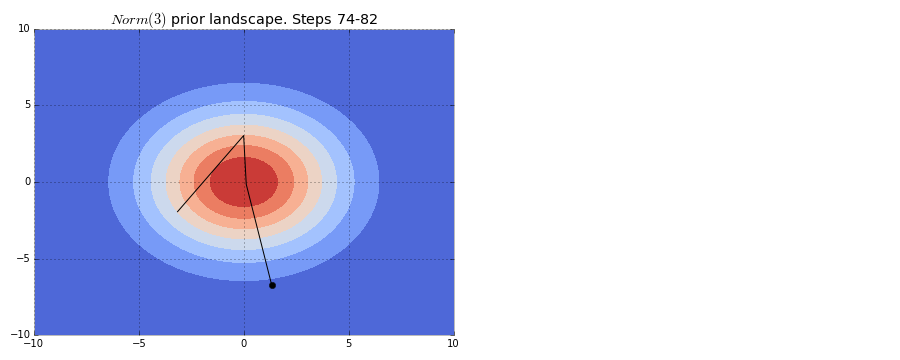
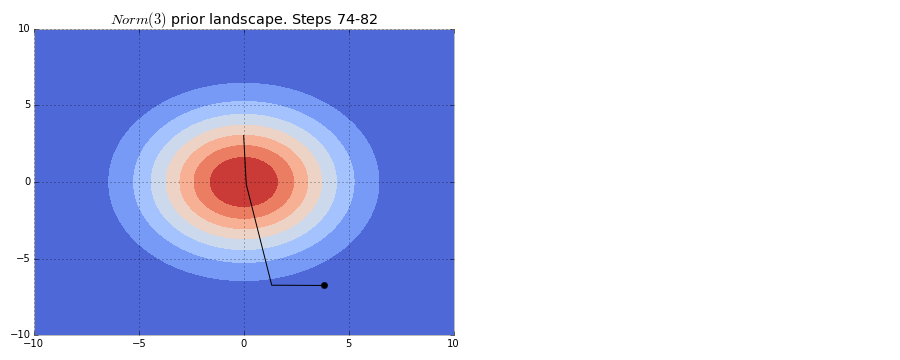
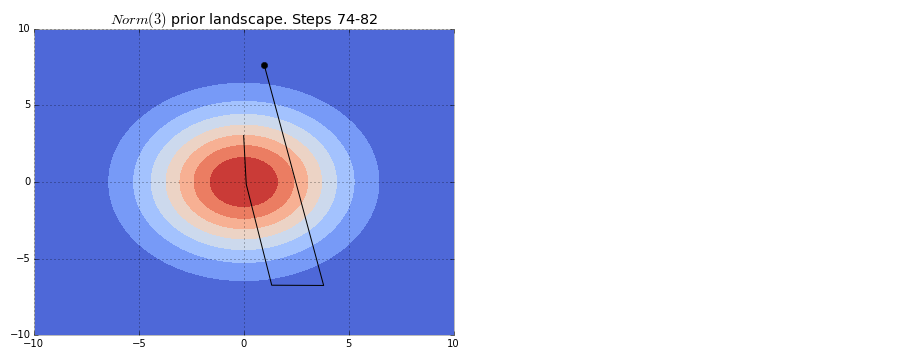
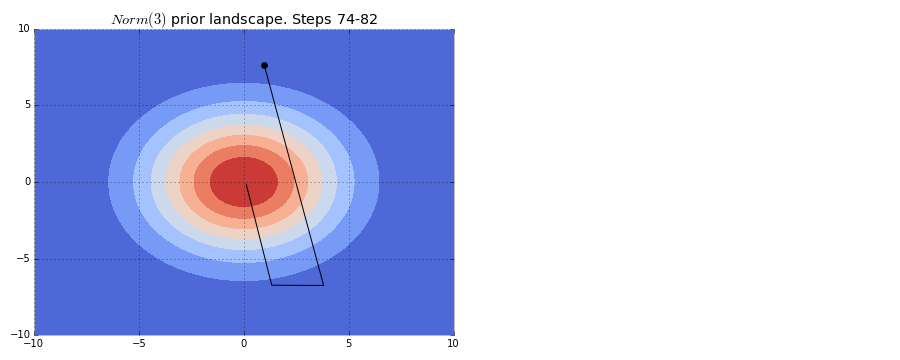
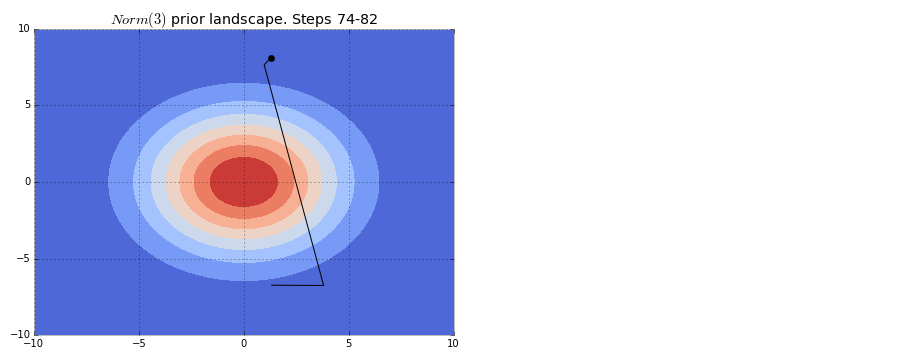
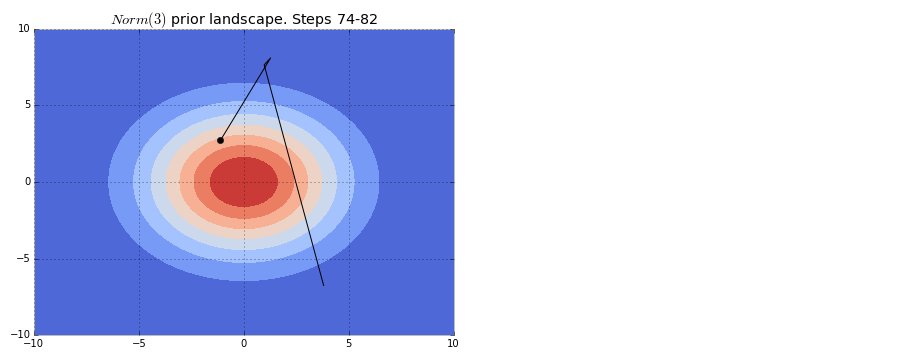
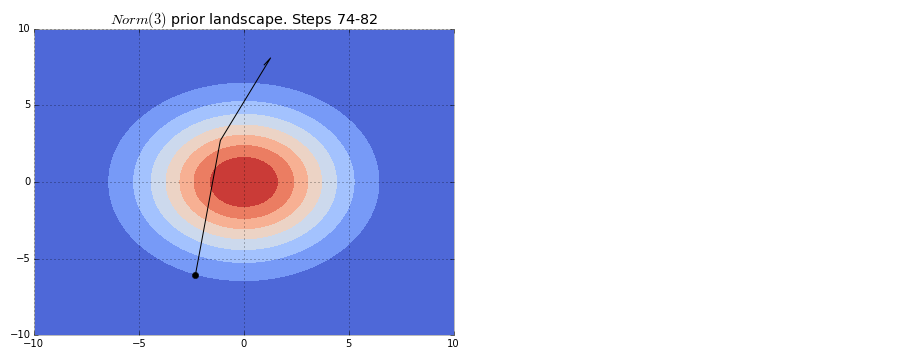
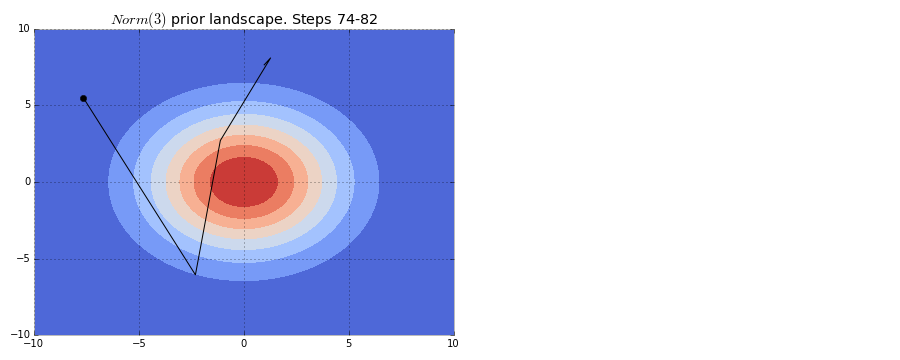
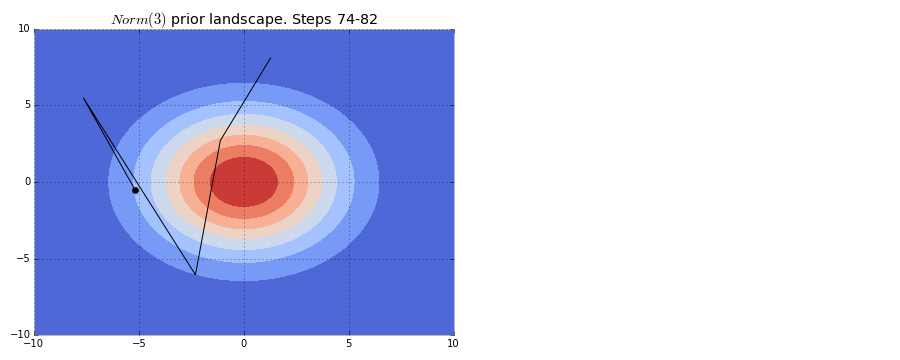
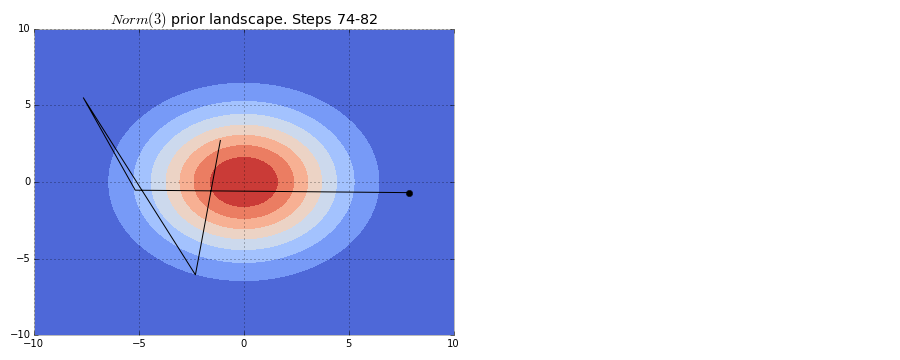
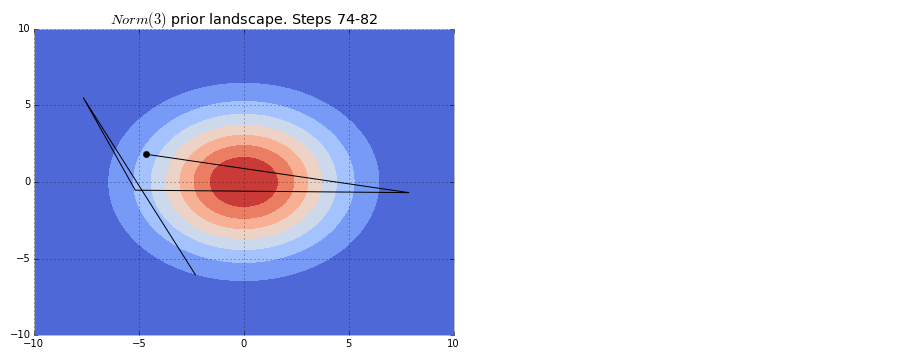
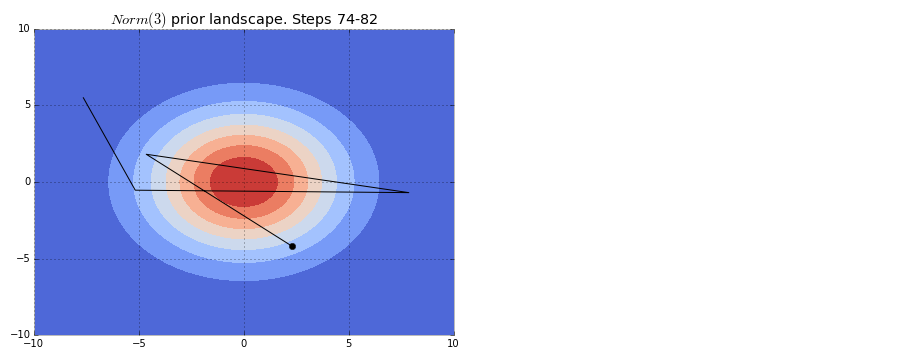
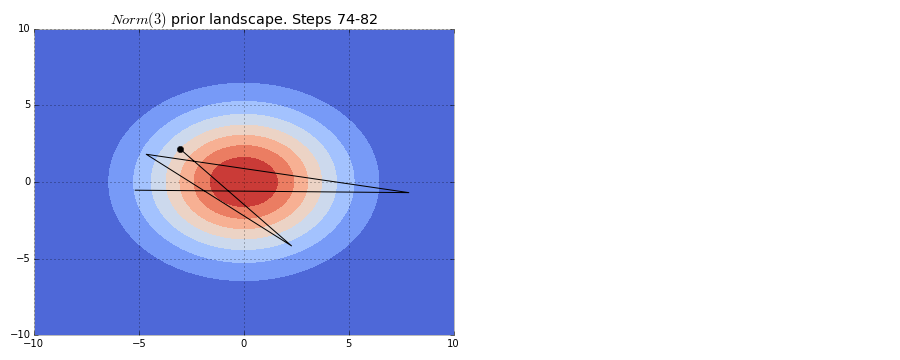
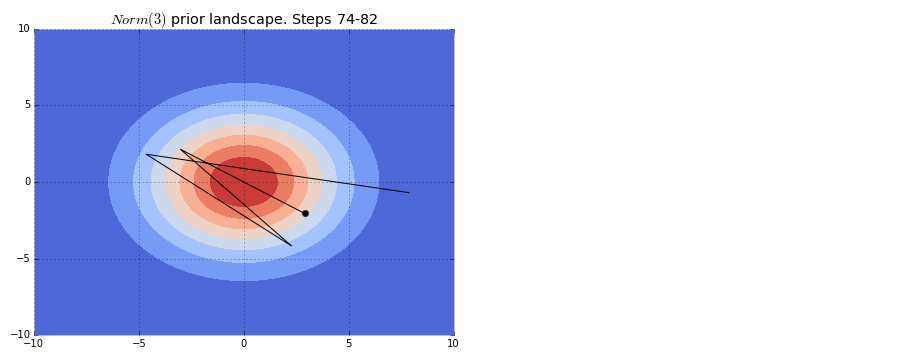
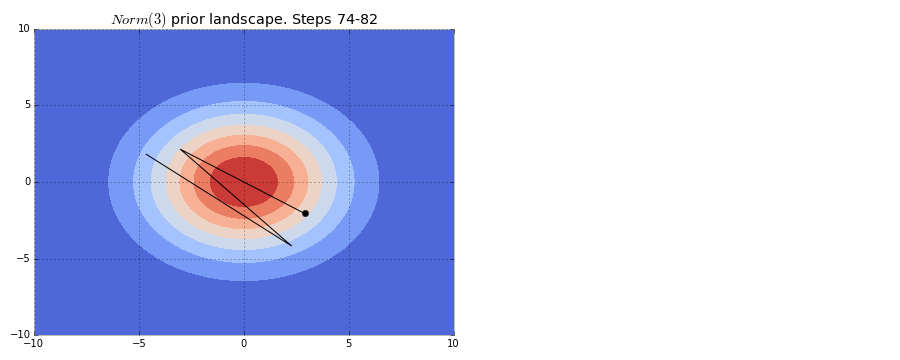
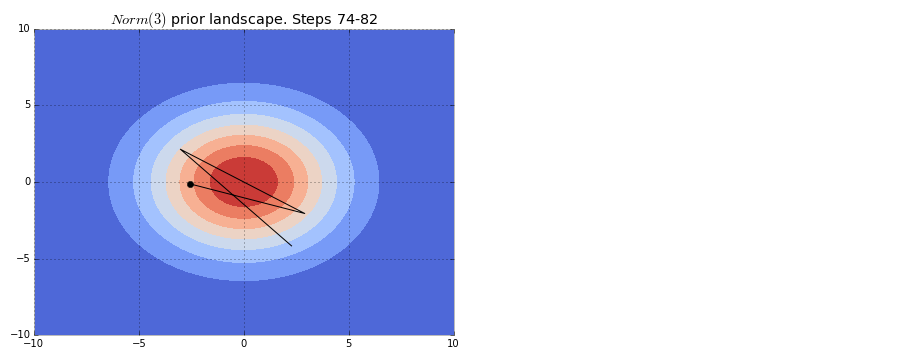
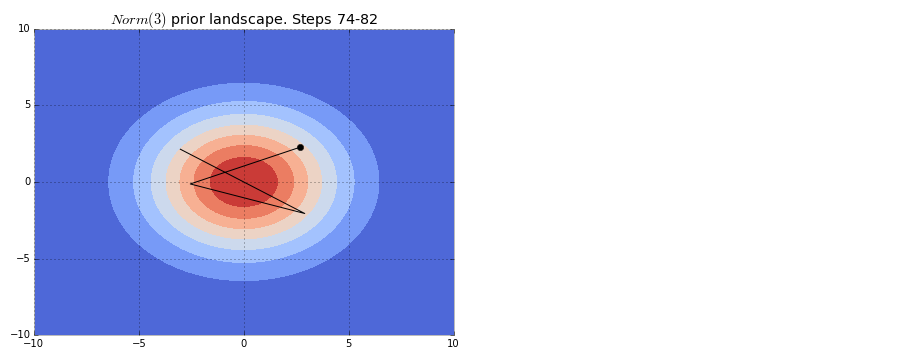
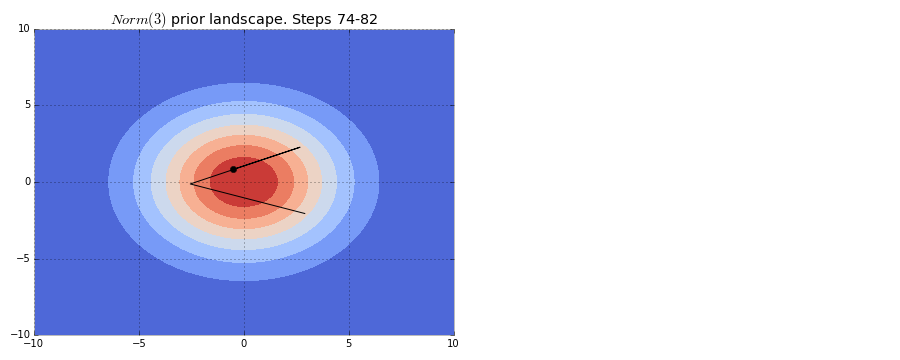
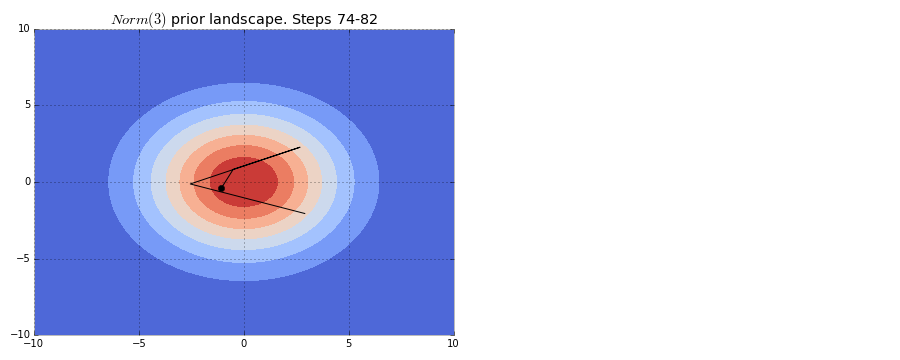
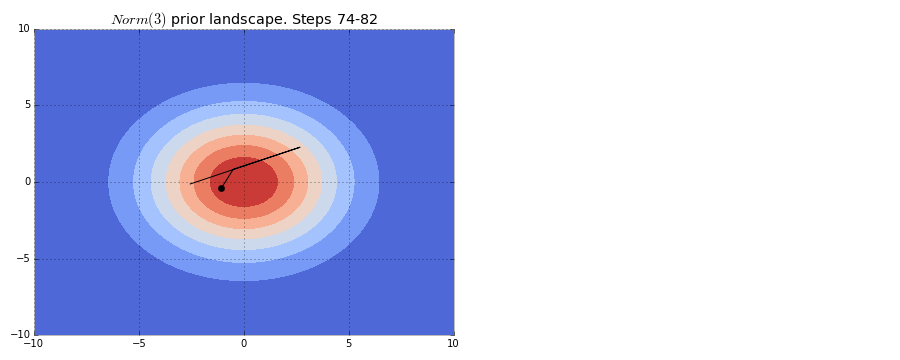
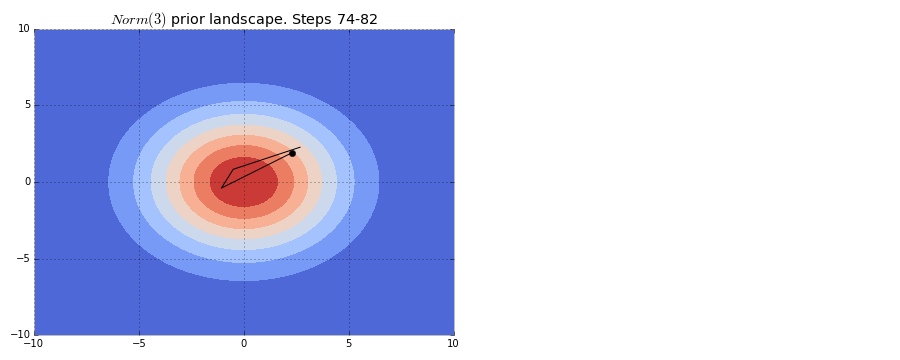
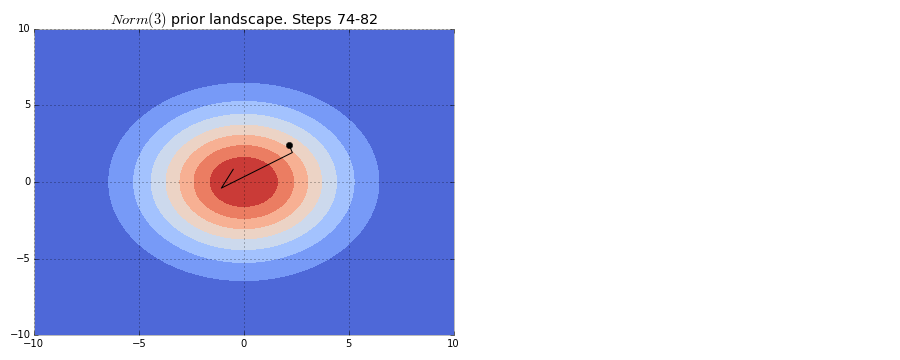
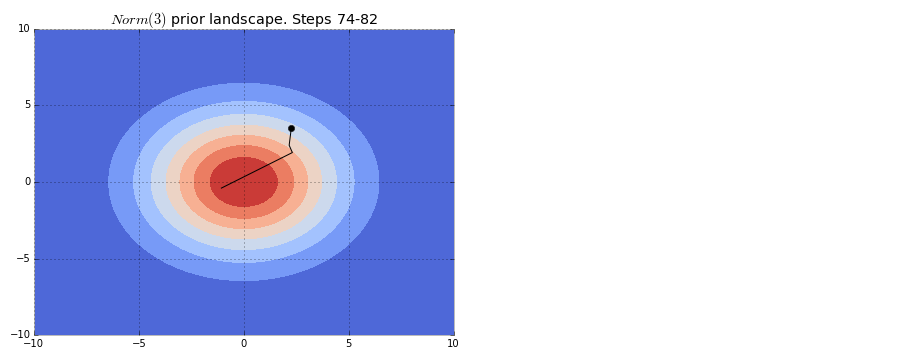
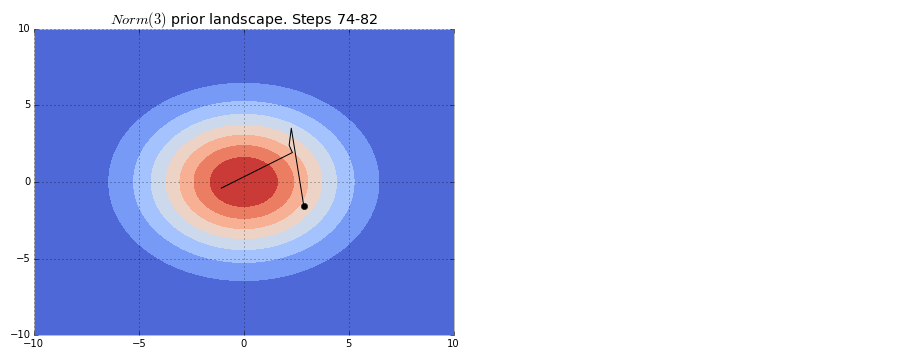
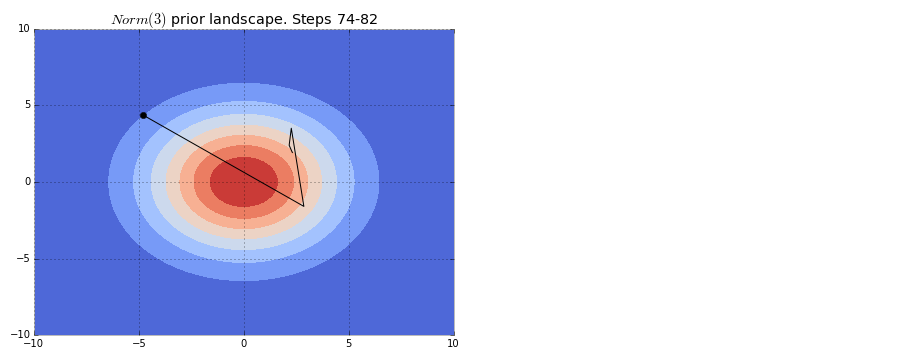
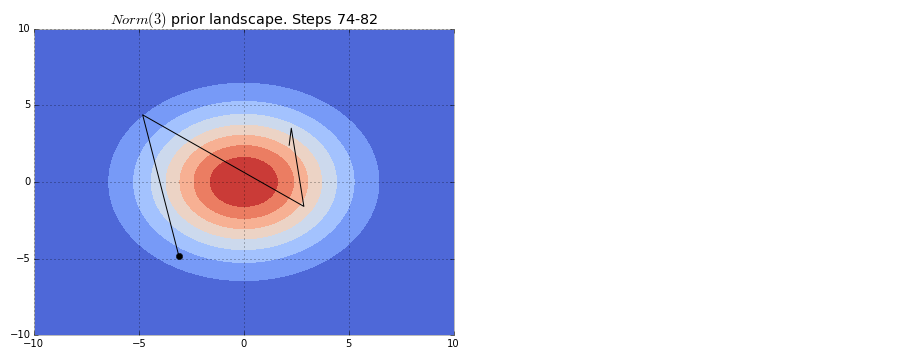
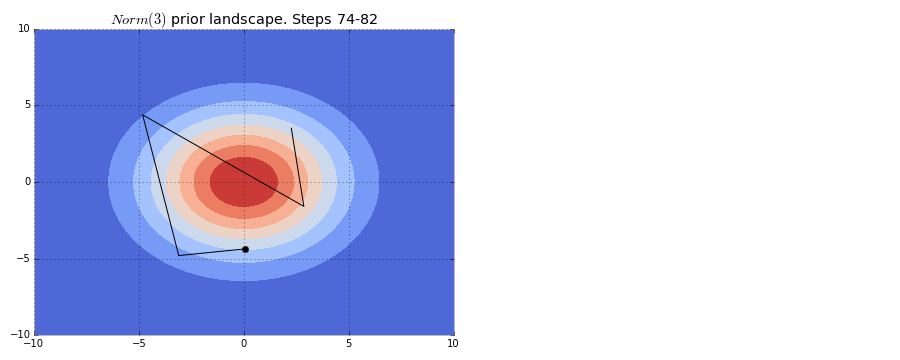
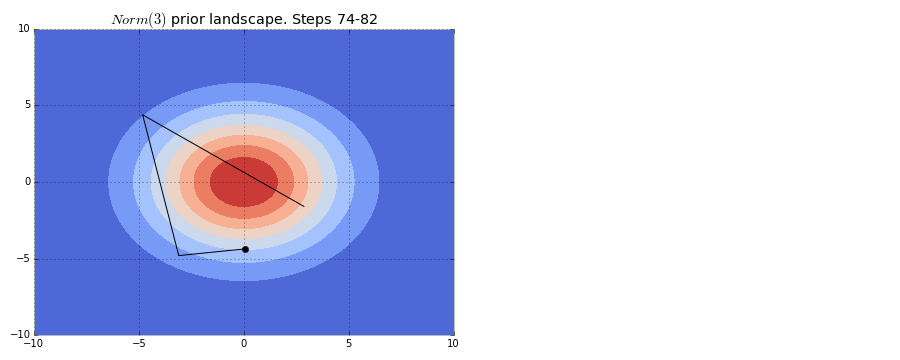
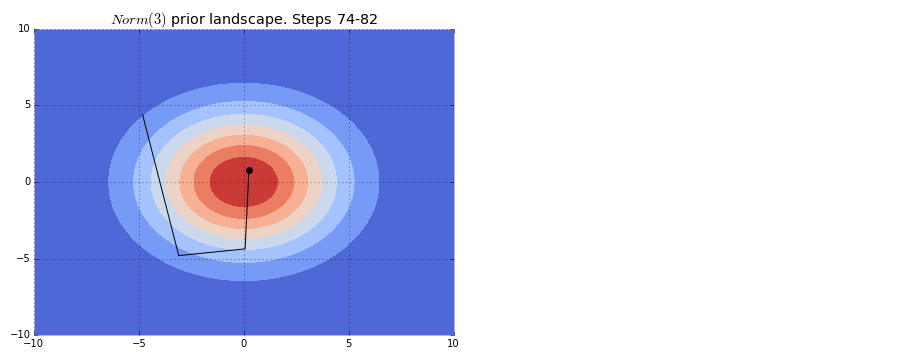
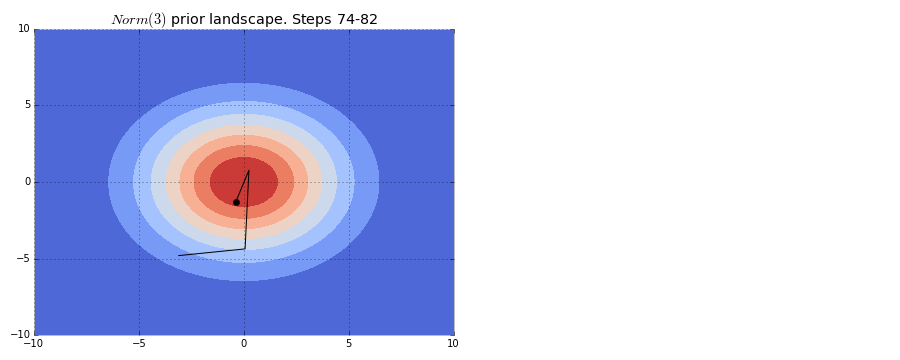
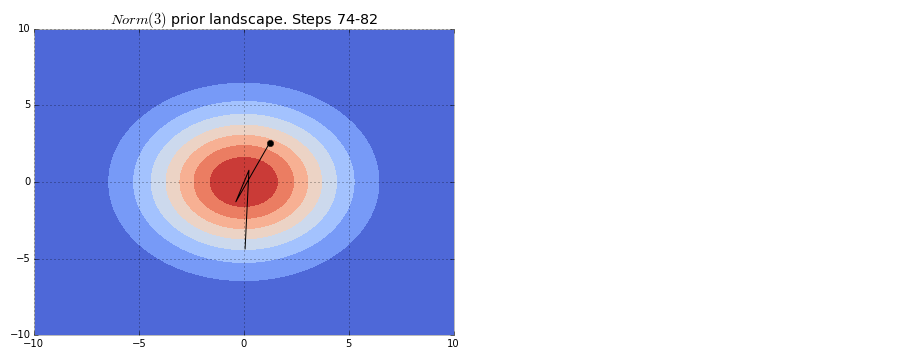
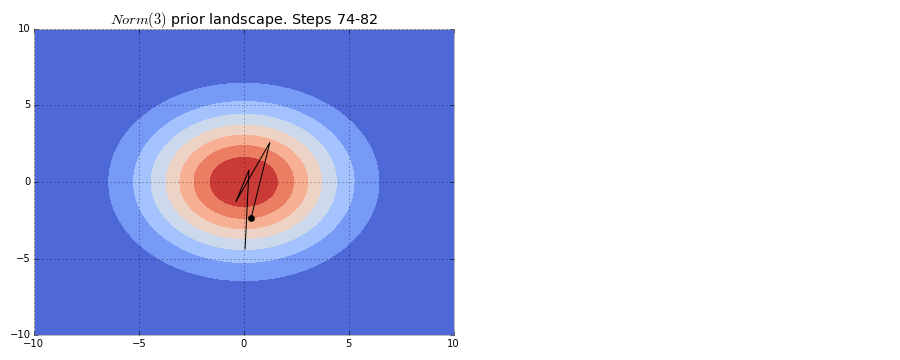
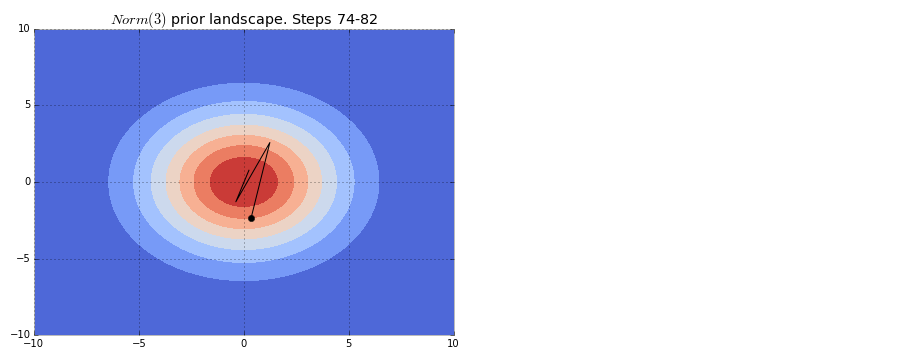
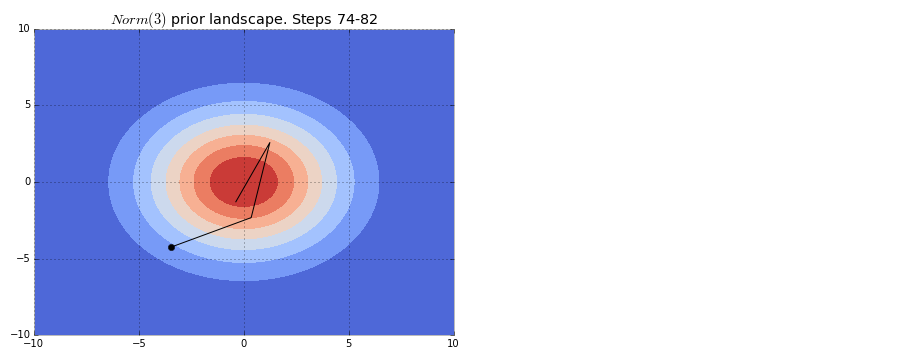
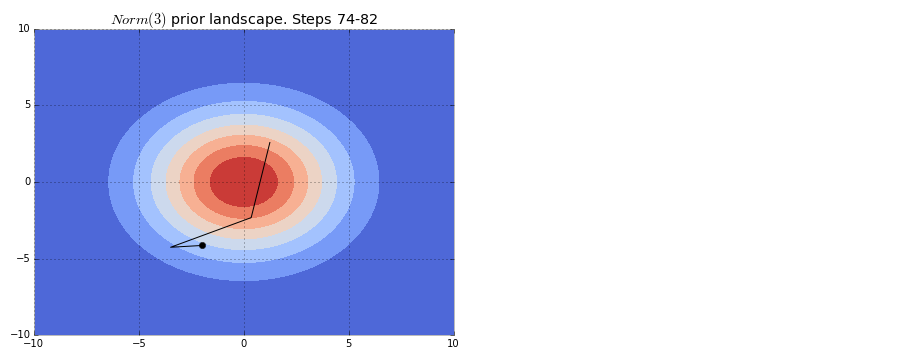
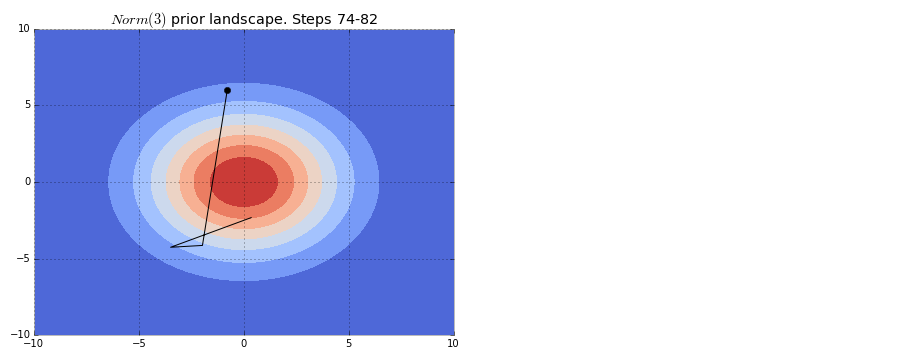
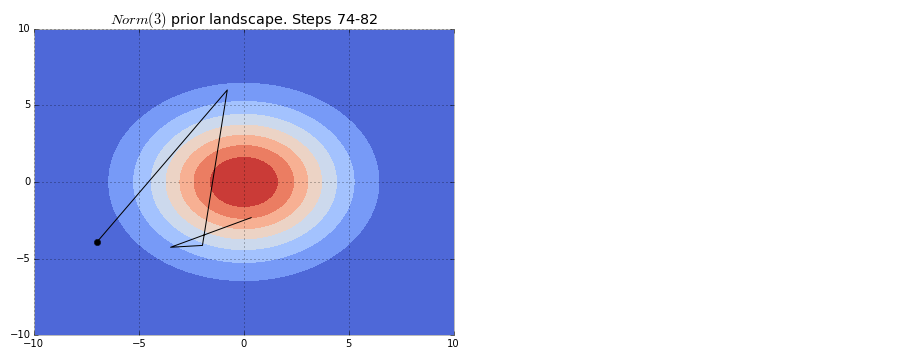
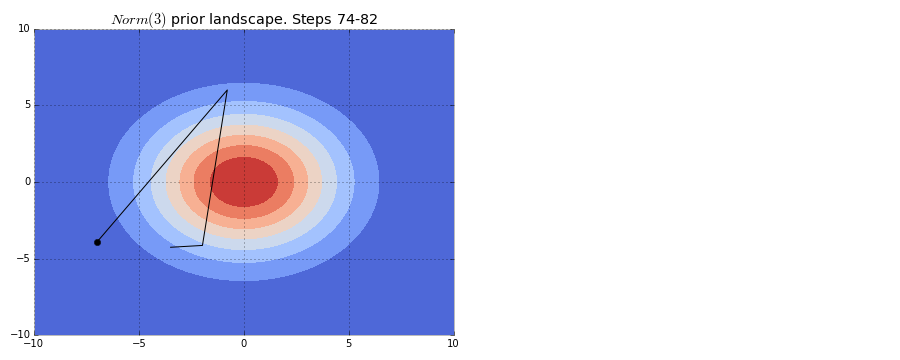
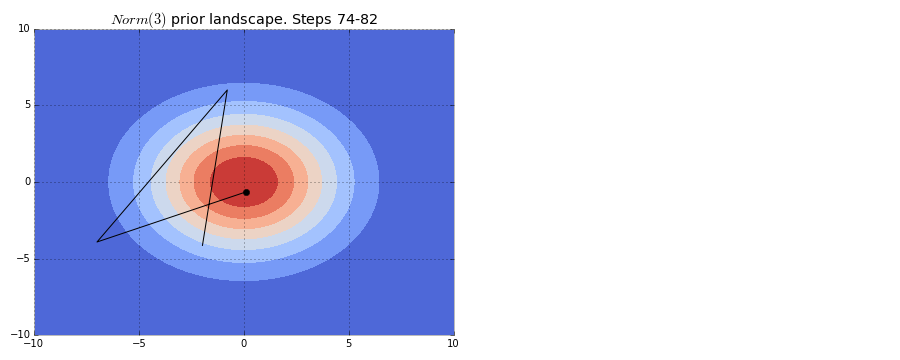
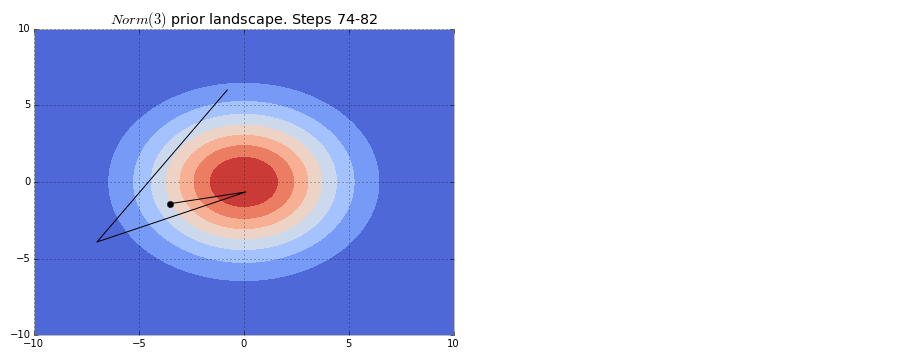
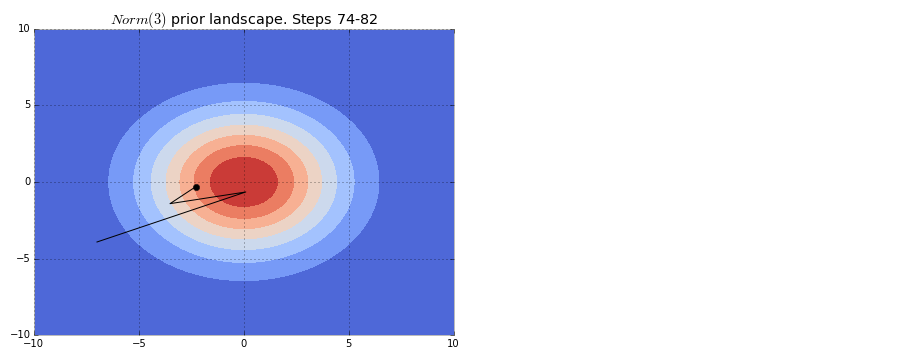
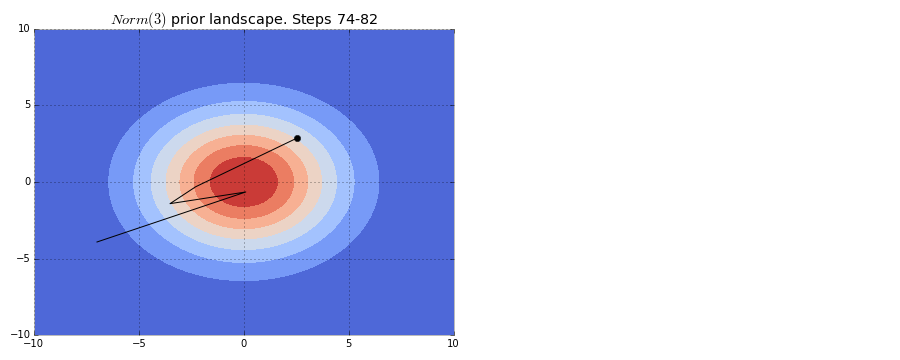
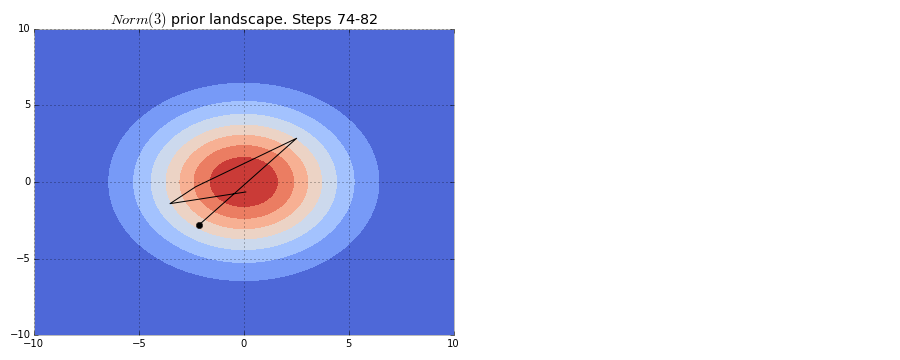
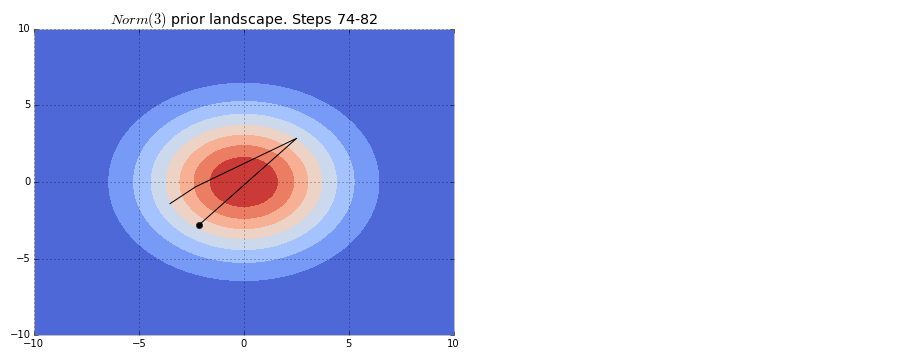
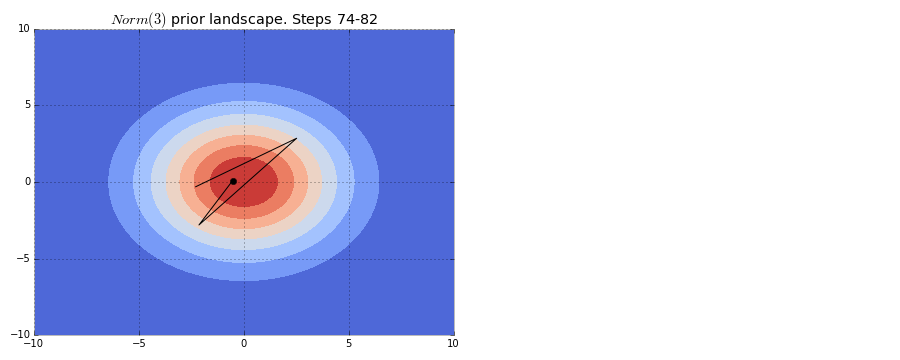
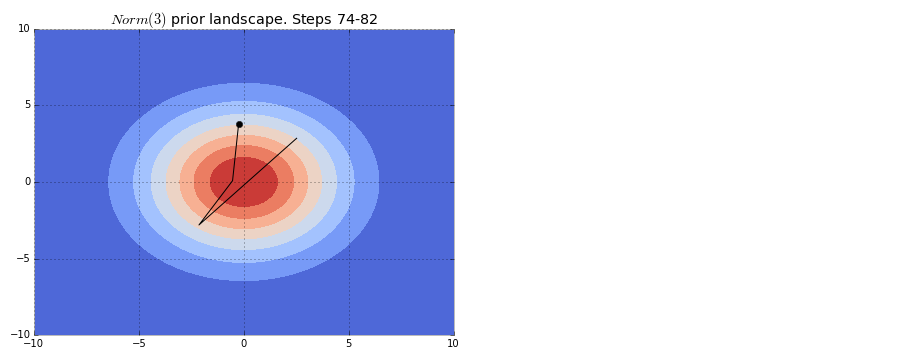
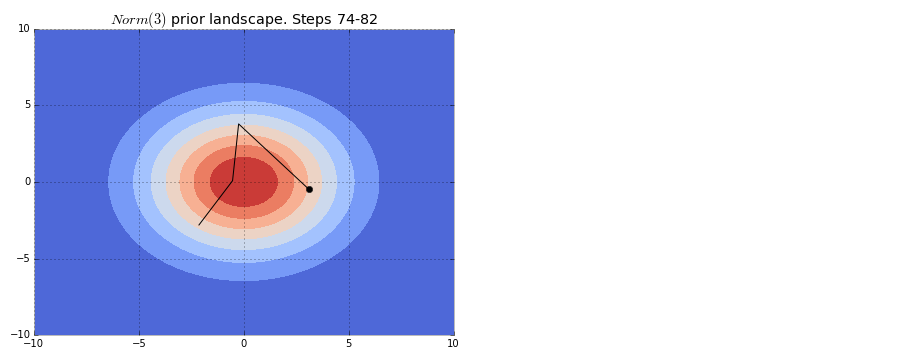
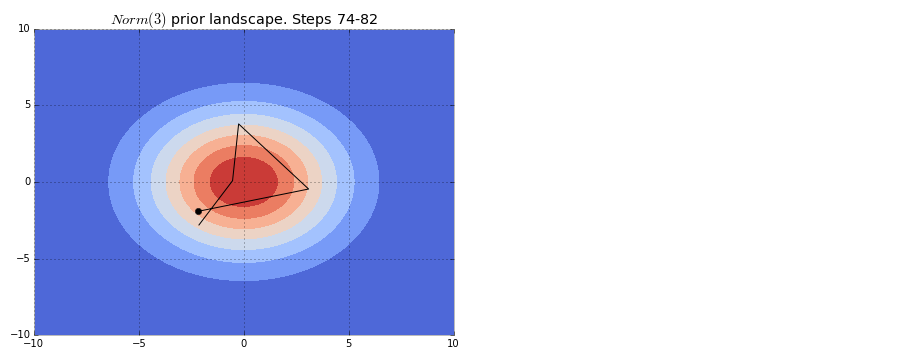
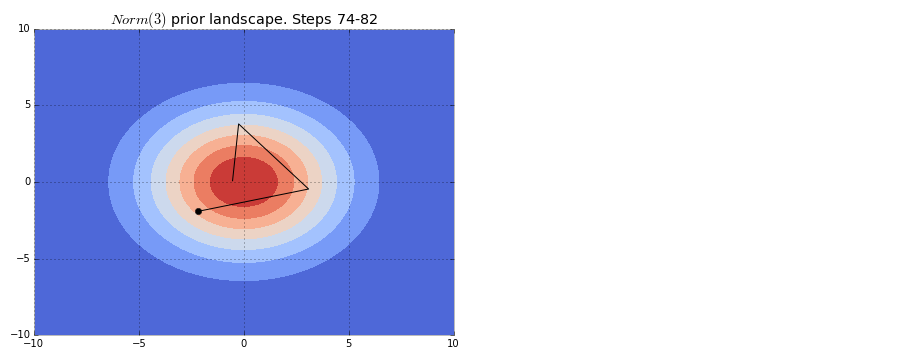
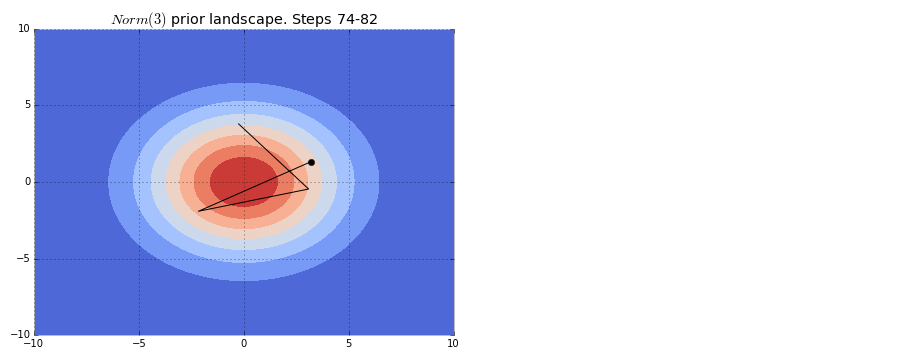
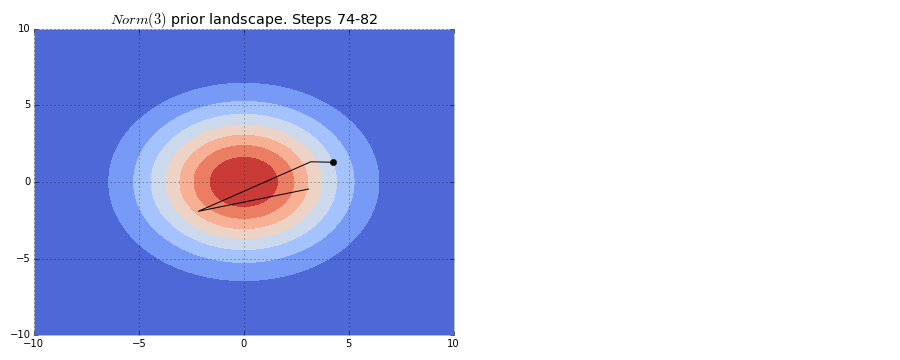
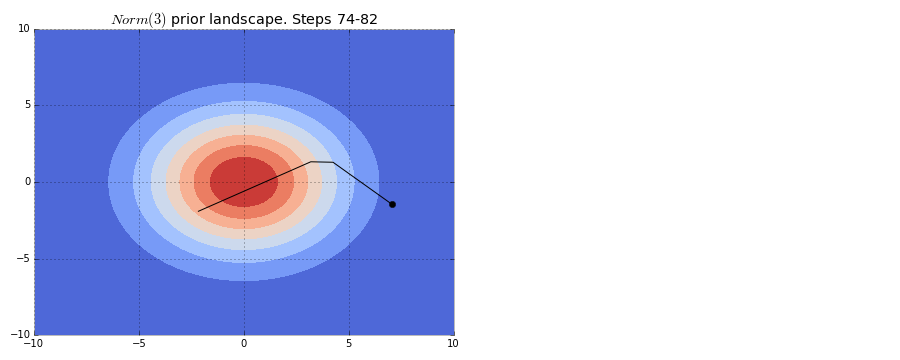
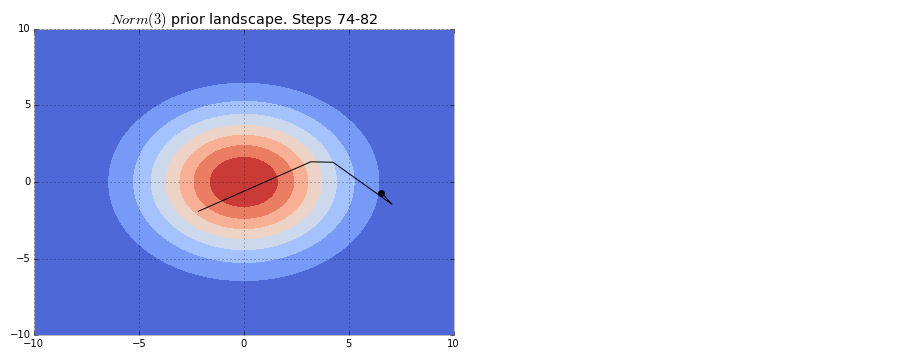
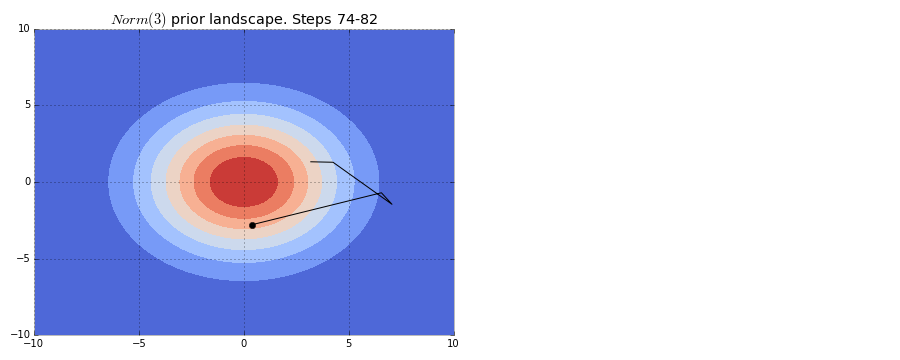
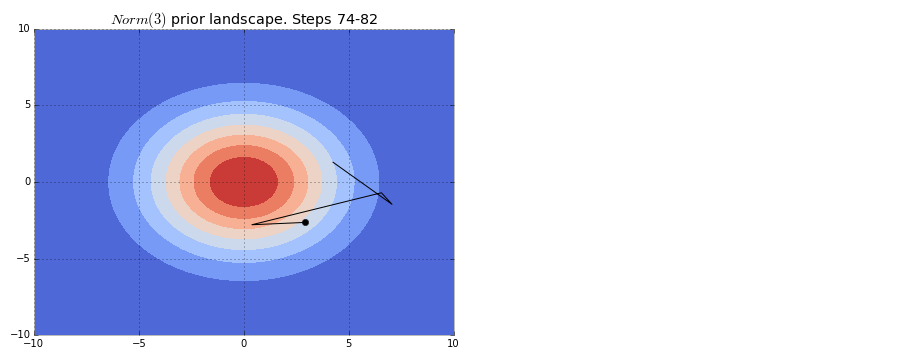
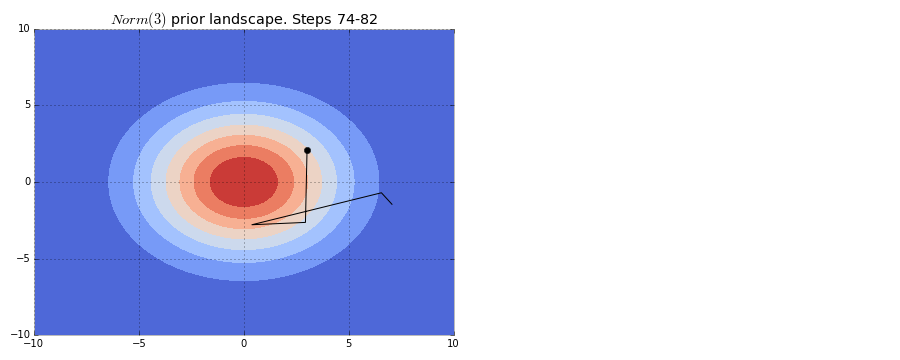
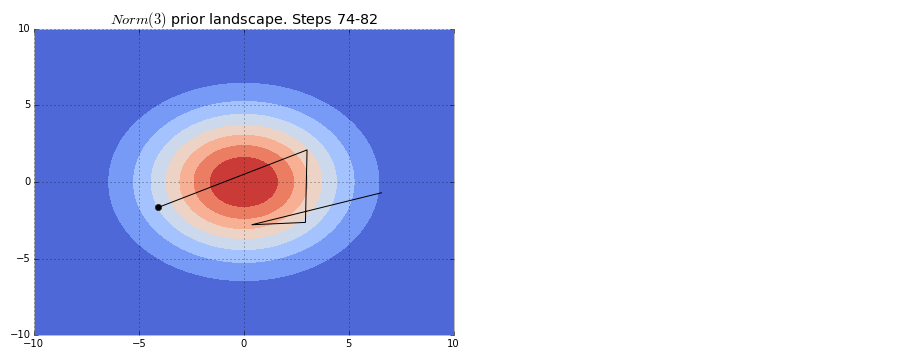
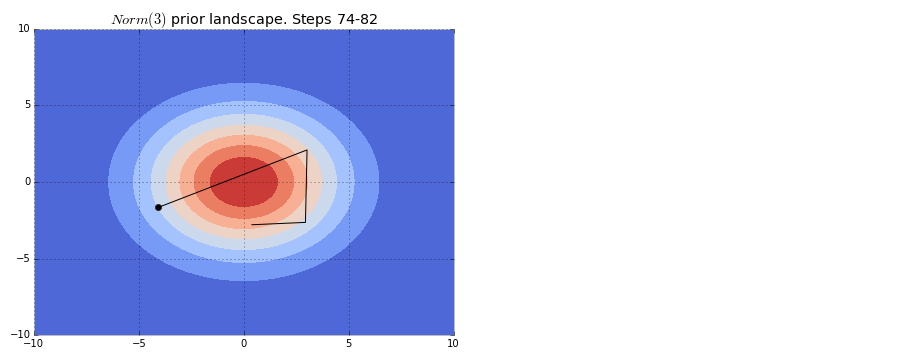
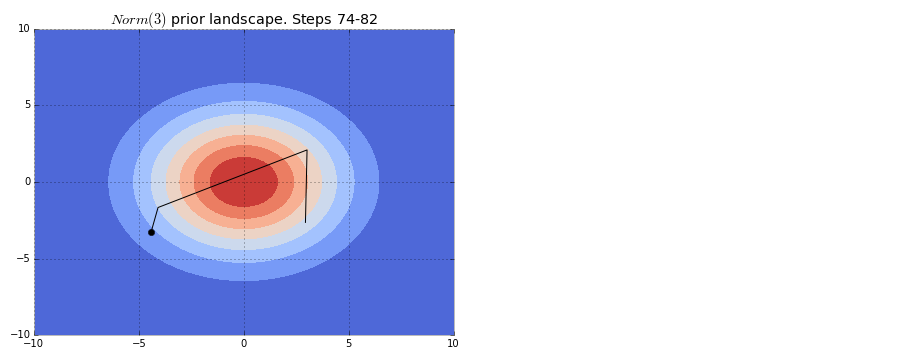
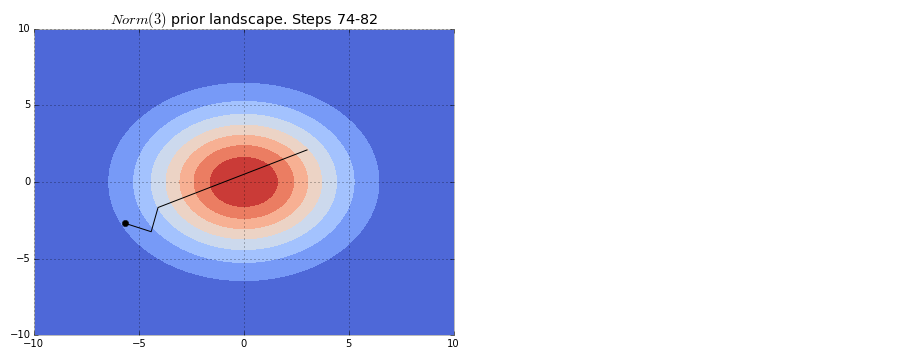
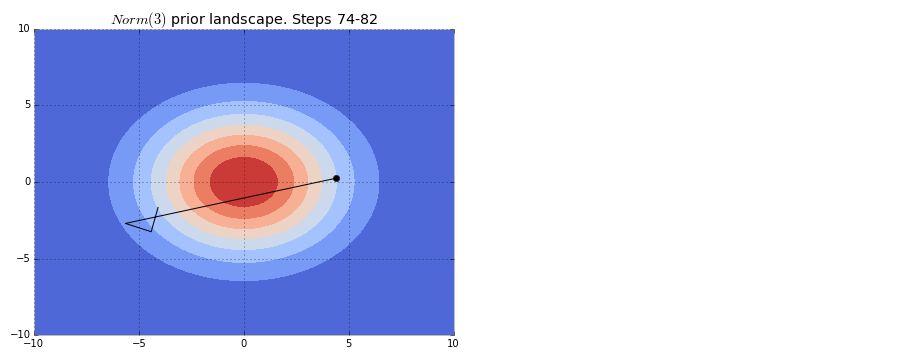
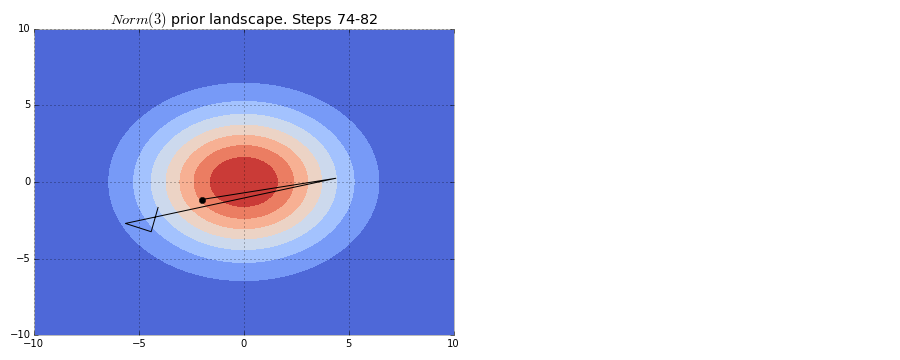
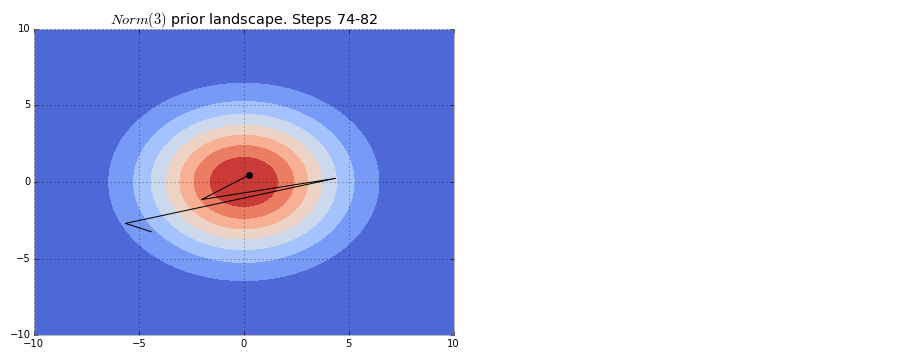
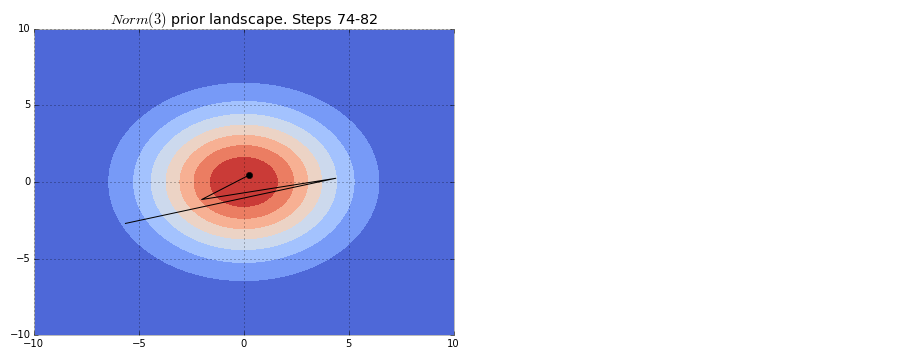
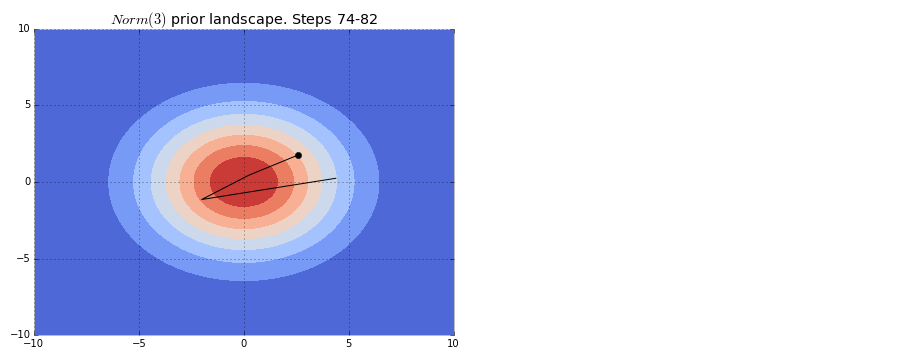
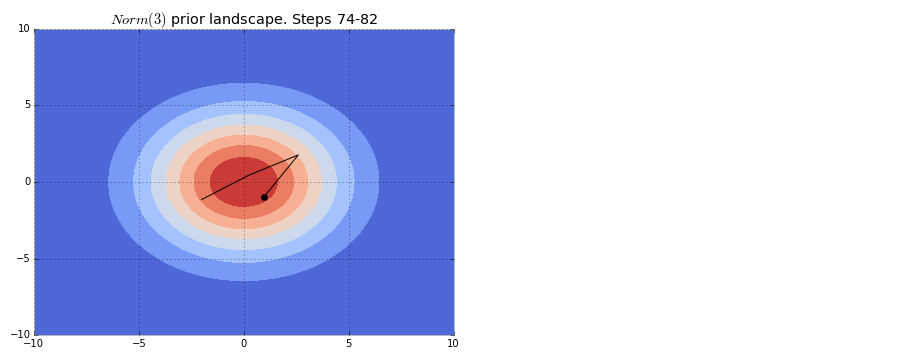
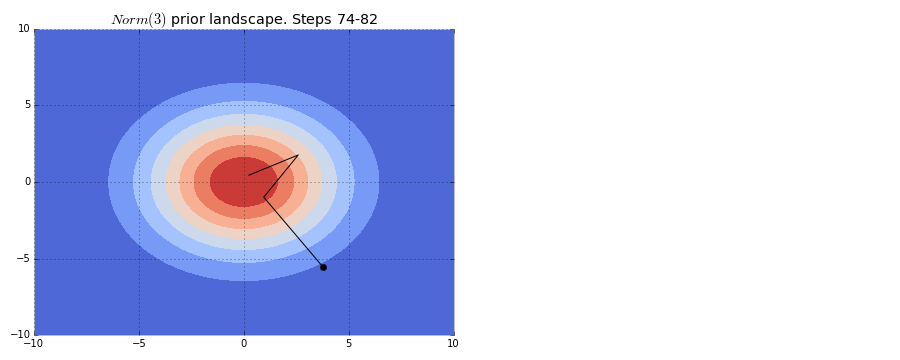
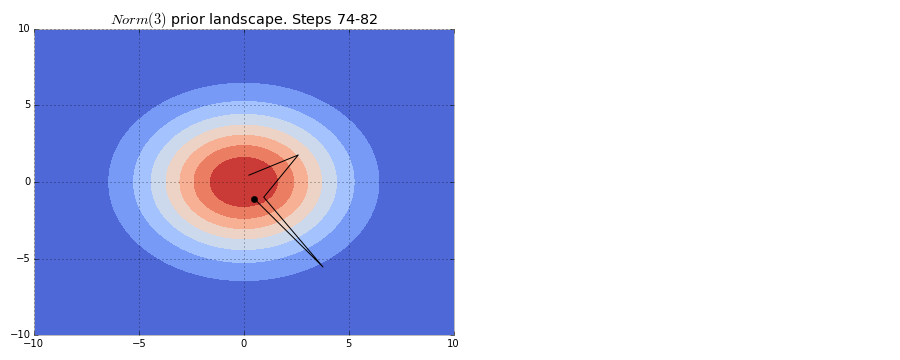
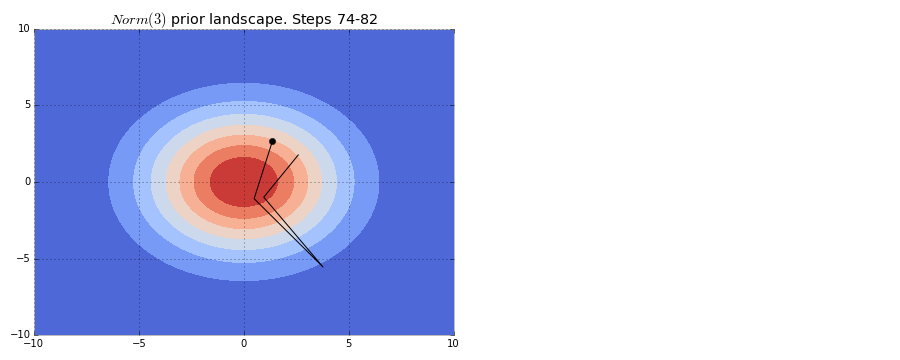
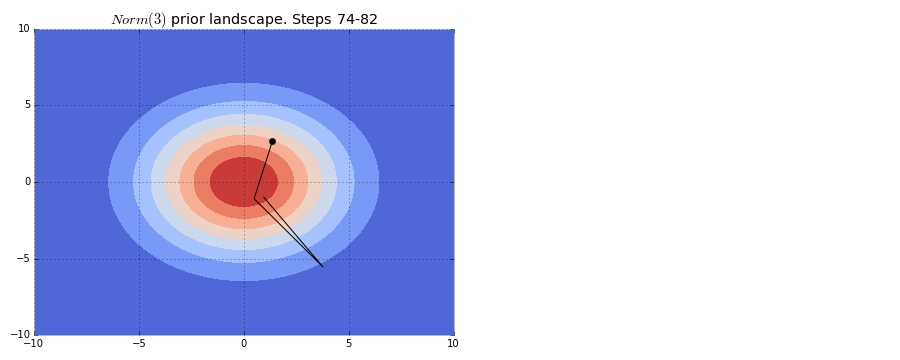
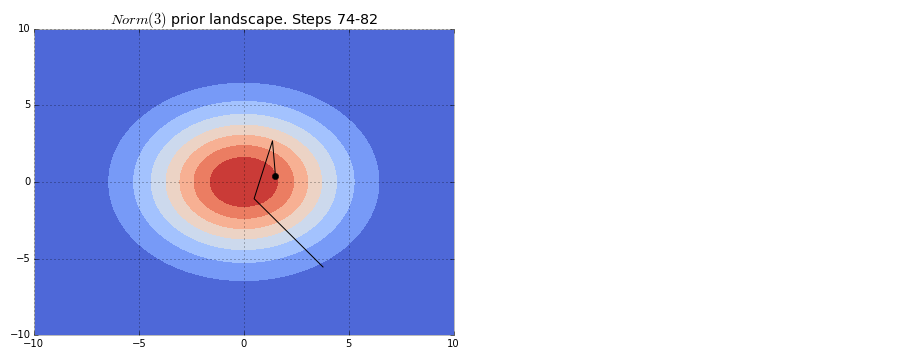
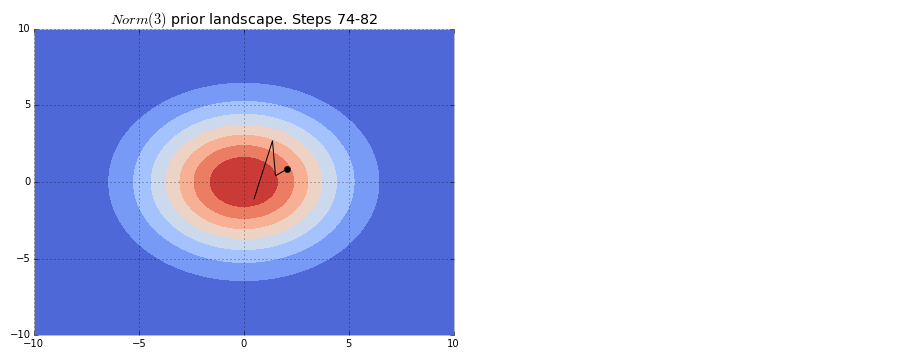
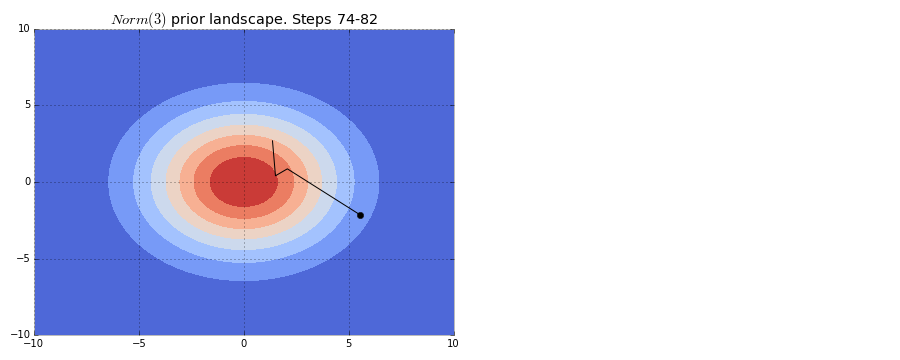
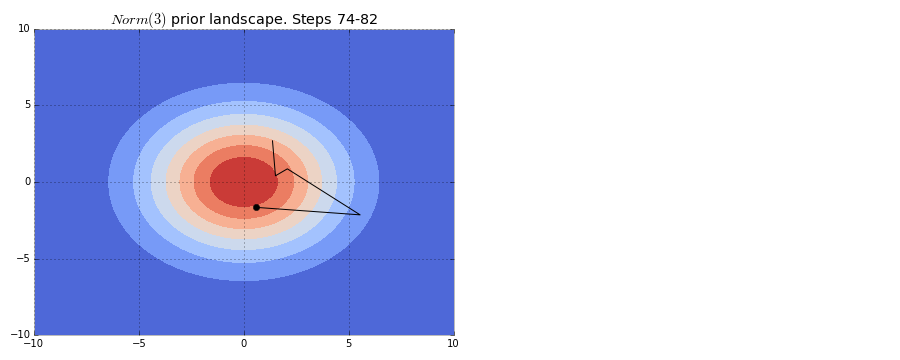
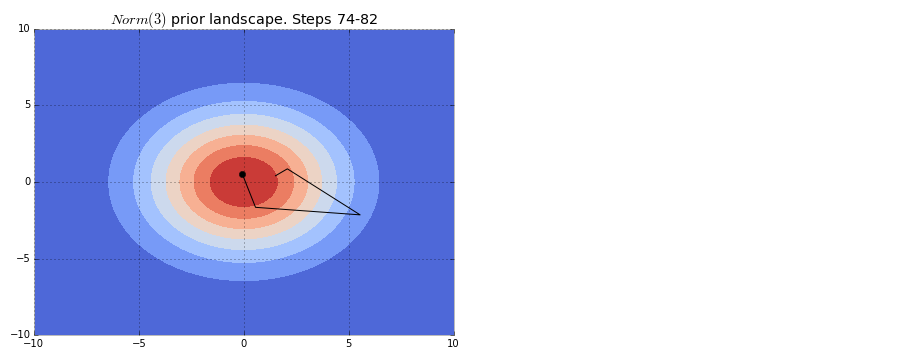
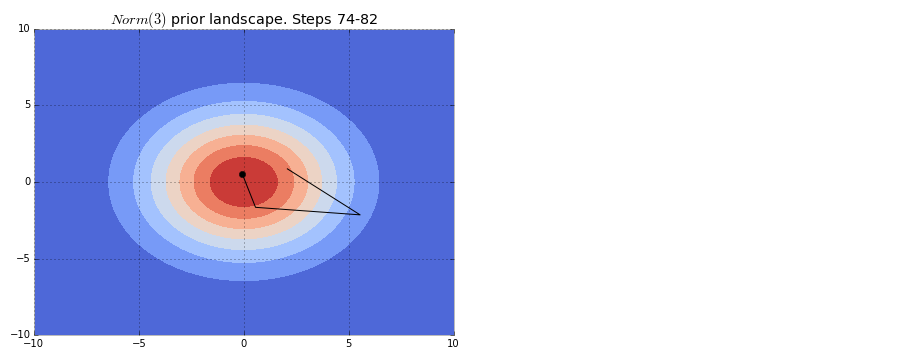
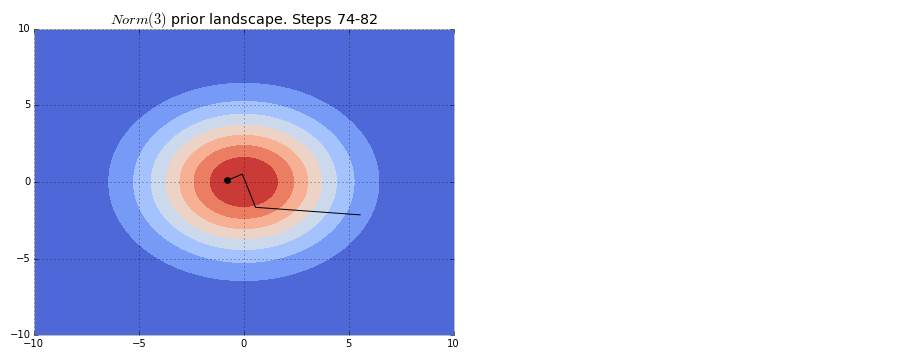
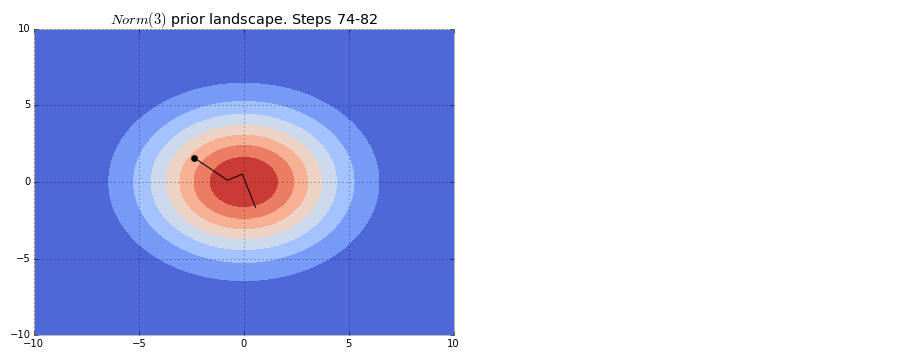
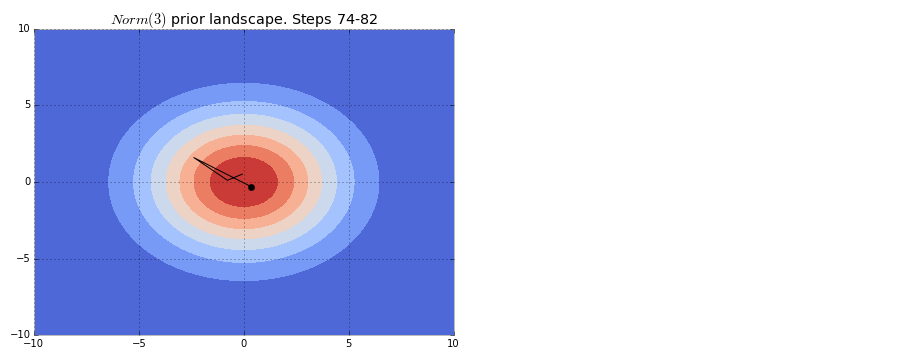
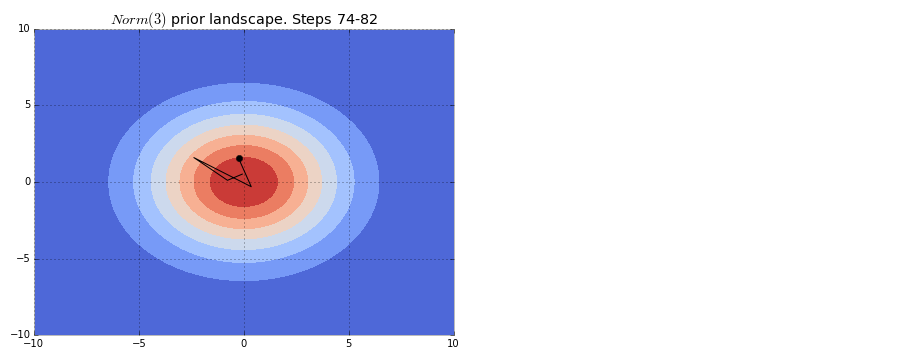
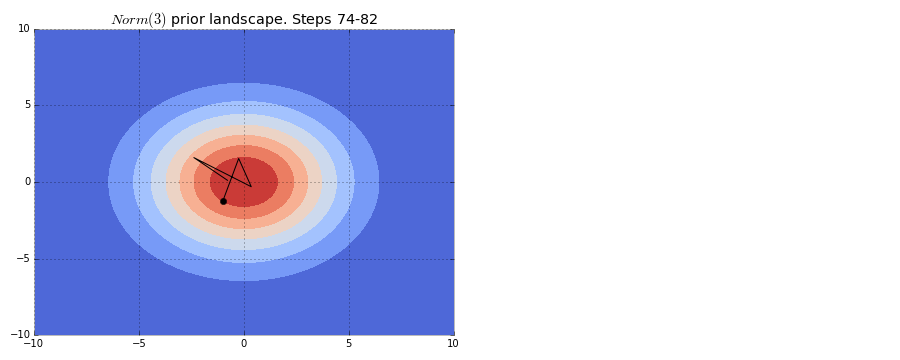
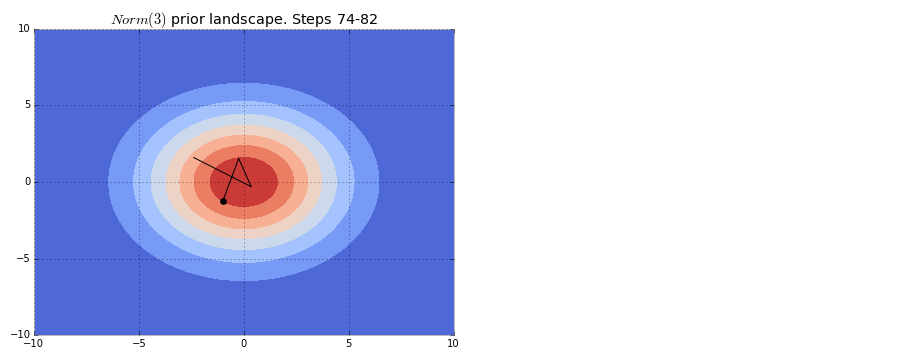
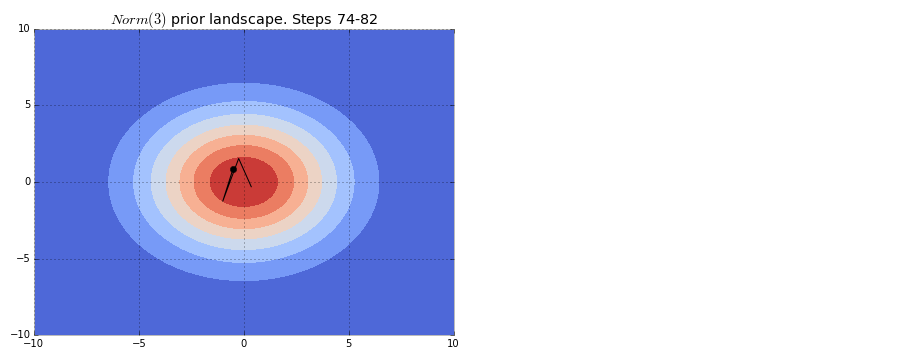
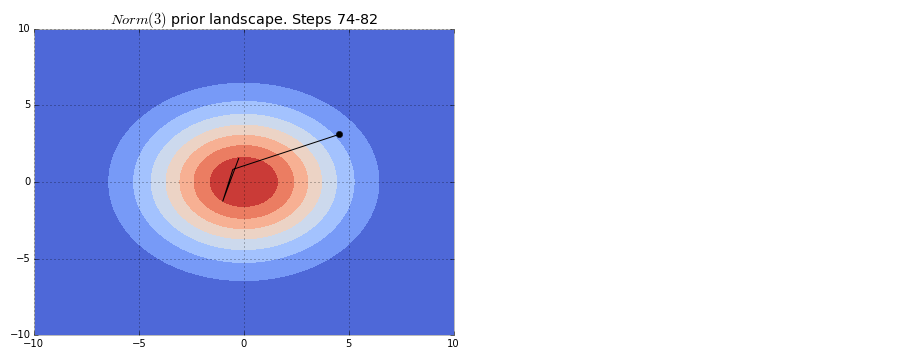
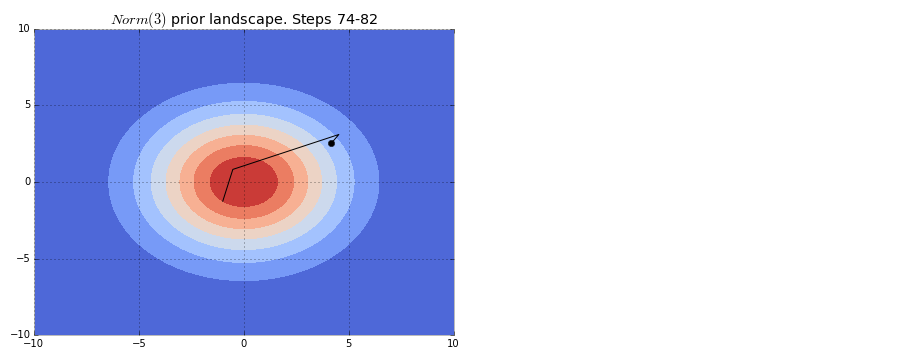
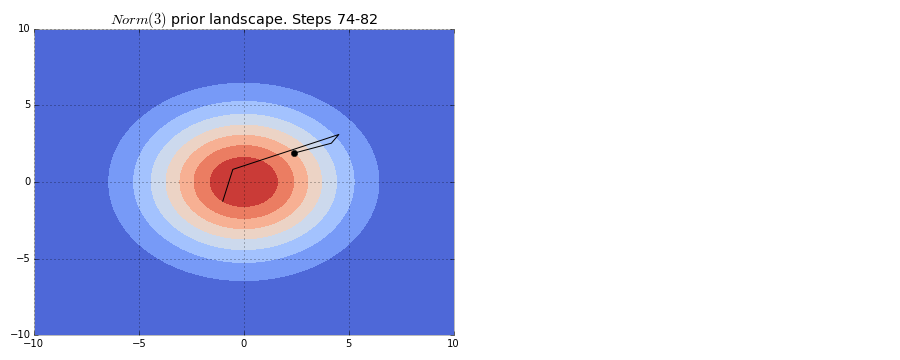
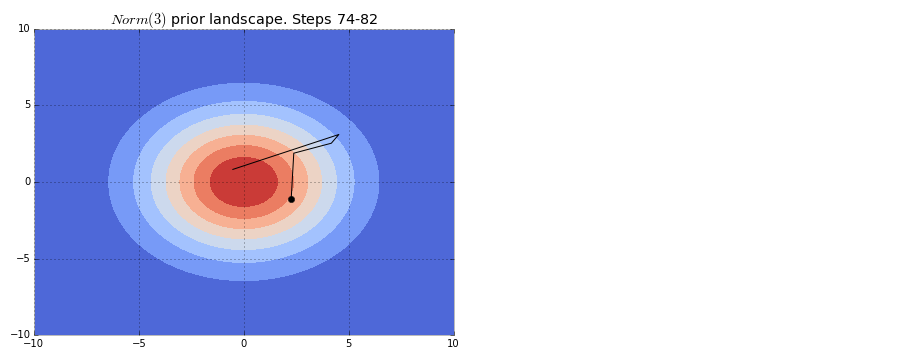

In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from JSAnimation import IPython_display
from matplotlib import animation

figsize(12.5, 5)
fig = plt.figure()
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)
exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])


ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")


plt.tight_layout()



points, = ax.plot([], [], 'bo', ms=6, color = "k")
line, = ax.plot([], [], lw=1, color = "k")

def init():

    points.set_data([], [])
    line.set_data([], [])

    return points

def animate(i):

    points.set_data(trace["alpha"][i],trace["beta"][i])
    x = np.array([trace["alpha"][i], trace["alpha"][i-1], trace["alpha"][i-2], trace["alpha"][i-3],trace["alpha"][i-4]])
    y = np.array([trace["beta"][i], trace["beta"][i-1],trace["beta"][i-2], trace["beta"][i-3],trace["beta"][i-4]])
    
    line.set_data(x,y)

    return points, line


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=180, blit=True)


## Metropolis

In [7]:
pm.Normal?

In [23]:
with pm.Model() as model:




    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.Metropolis() # instantiate sampler
    trace = pm.sample(200, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 200 of 200 complete in 0.3 sec

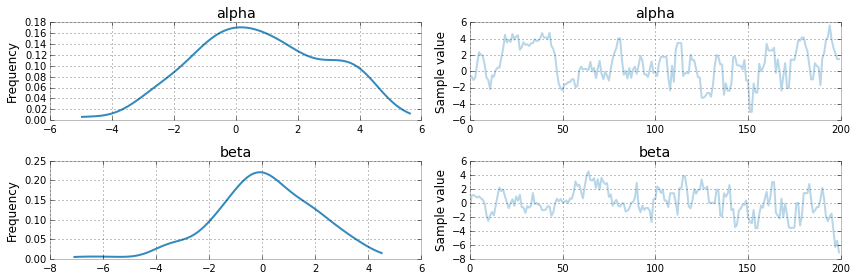

In [21]:
# This is wrong
%matplotlib inline


pm.traceplot(trace);


###Points distribution

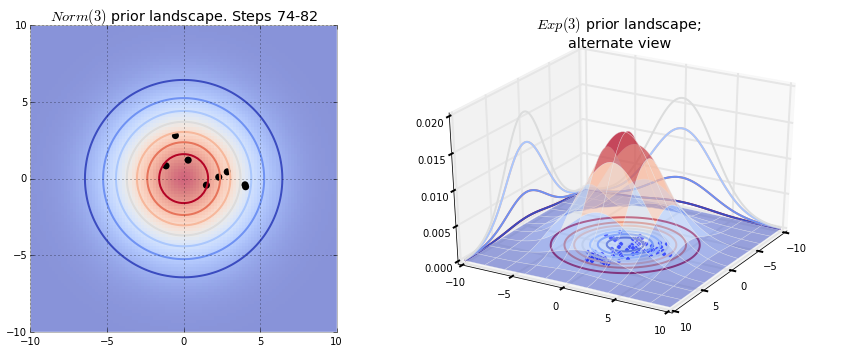

In [22]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)

### Searching algorithm


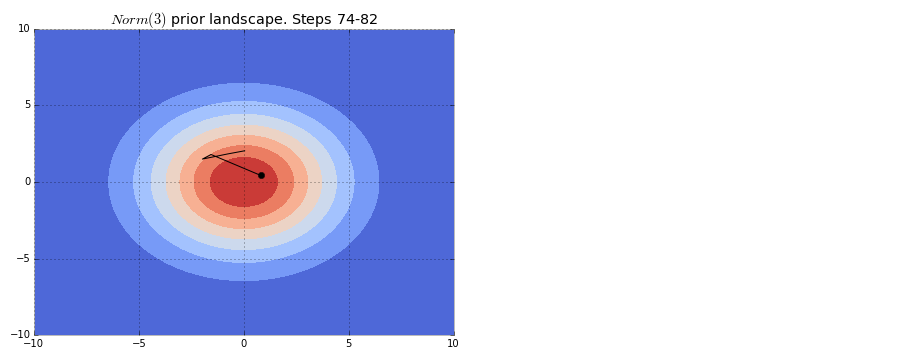
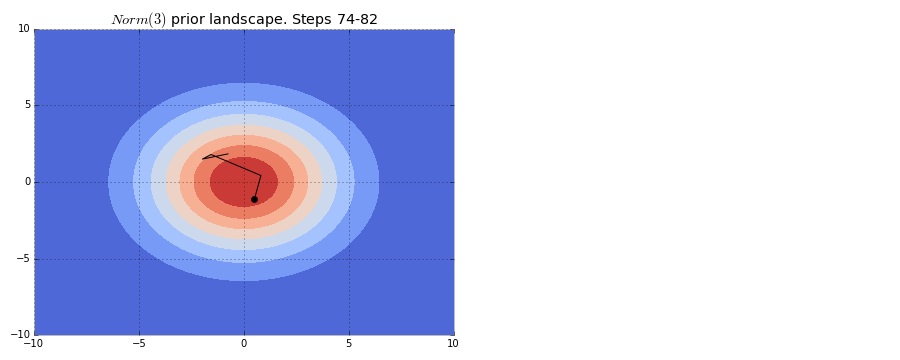
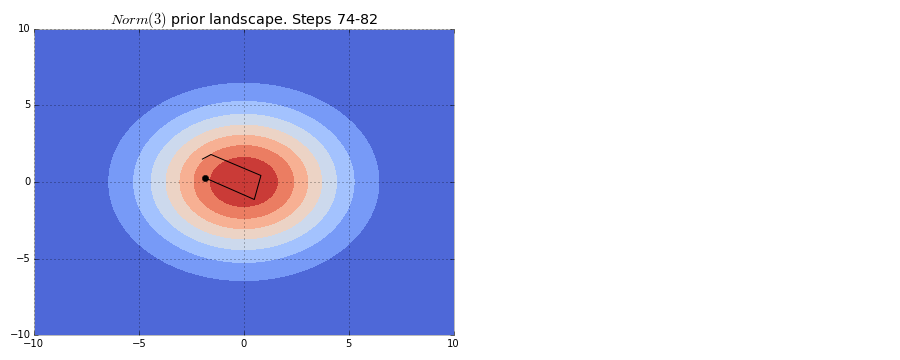
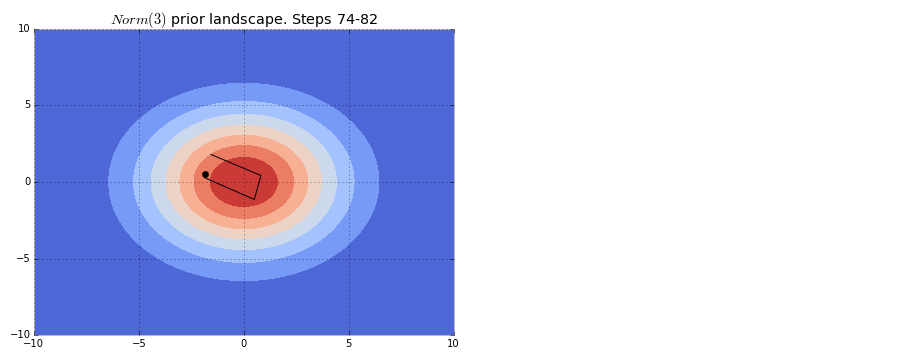
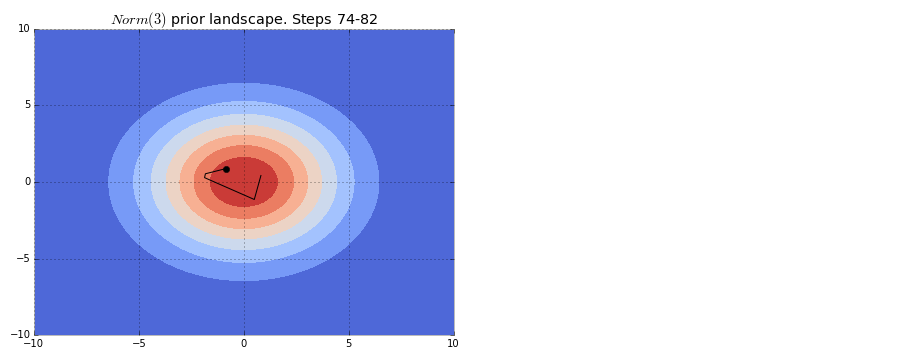
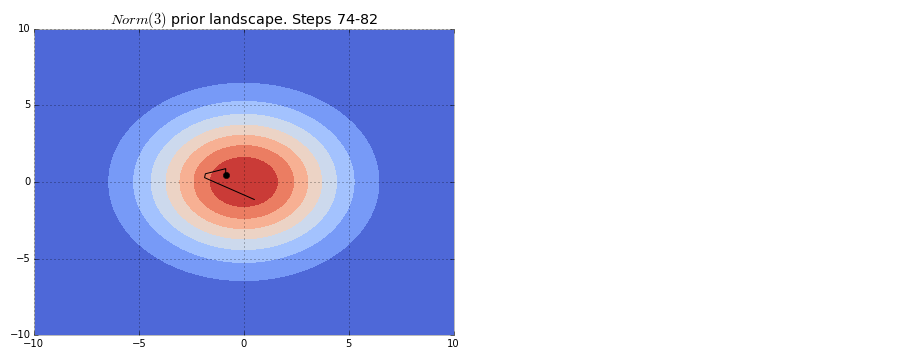
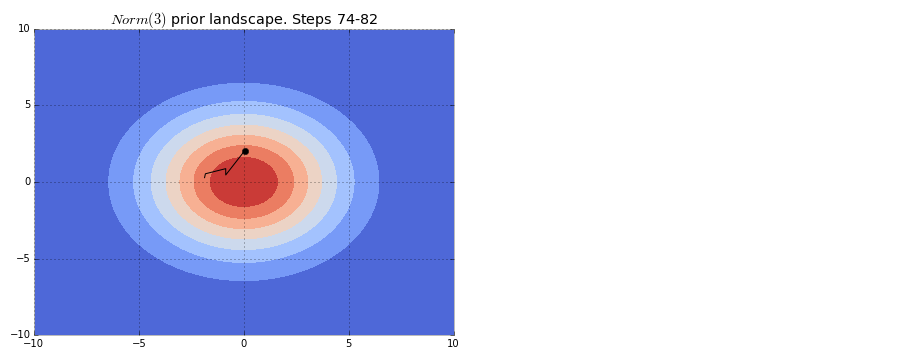
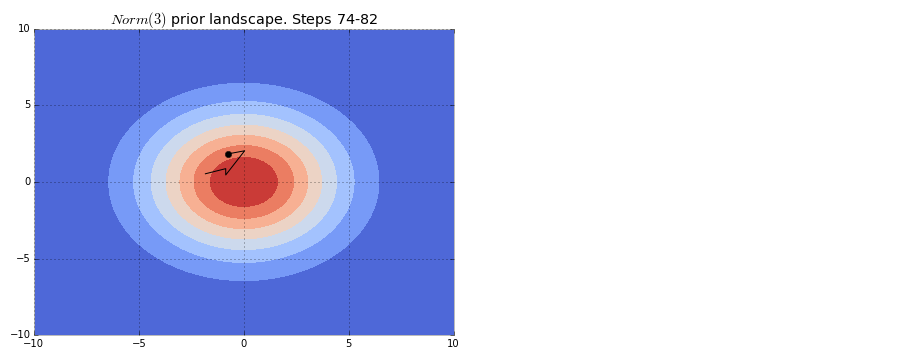
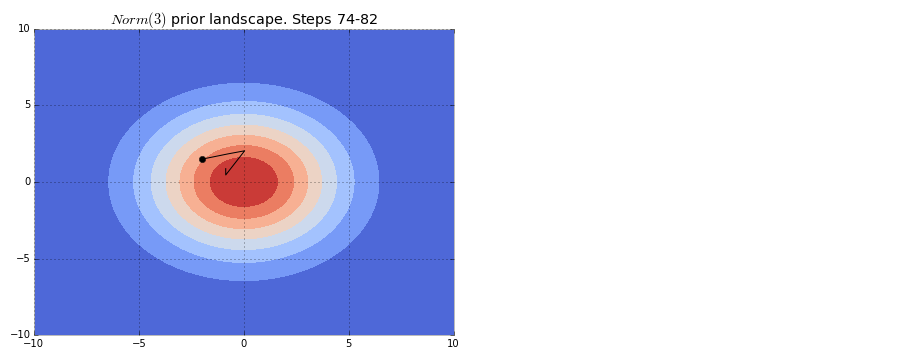

In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from JSAnimation import IPython_display
from matplotlib import animation

figsize(12.5, 5)
fig = plt.figure()
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)
exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])


ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")


plt.tight_layout()



points, = ax.plot([], [], 'bo', ms=6, color = "k")
line, = ax.plot([], [], lw=1, color = "k")

def init():

    points.set_data([], [])
    line.set_data([], [])

    return points

def animate(i):

    points.set_data(trace["alpha"][i],trace["beta"][i])
    x = np.array([trace["alpha"][i], trace["alpha"][i-1], trace["alpha"][i-2], trace["alpha"][i-3],trace["alpha"][i-4]])
    y = np.array([trace["beta"][i], trace["beta"][i-1],trace["beta"][i-2], trace["beta"][i-3],trace["beta"][i-4]])
    
    line.set_data(x,y)

    return points, line


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=9, interval=180, blit=True)
